In [1]:
import pandas as pd
import ast
import csv
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import json
import statistics

In [2]:
clean_data_folder ="/Users/adamtsuchiyama/Documents/nss_capstone/cleaned_data/"
clean_data_songs = clean_data_folder + "cleaned_songs/"

In [3]:
def df_means(df):
    "prints the mean values for the loudness, max loudness, pitch, and timbre columns"
    loud = "loudness mean: " + str(df.loud_start_diff.mean()) + "\n"
    loud_max = "loudness max mean: " + str(df.loud_max_diff.mean()) + "\n"
    pitch = "pitch eucl dist mean: " + str(df.pitch_eucl_dist.mean()) + "\n"
    timbre = "timbre eucl dist mean: " + str(df.timbre_eucl_dist.mean())
    return print(loud, loud_max, pitch, timbre);

In [4]:
def df_graphs(df, song_title):
    "creates graphs for loudness, max loudness, pitch, and timbre over time"
    plt.plot(df['start_rnd'], df['loud_start_diff'])
    plt.xlabel('Time (sec)')
    plt.ylabel('Loudness Diff (dB)')
    plt.title('Loudness Difference Over Time, Original vs Remaster (' + song_title + ')')
    plt.show()
    plt.plot(df['start_rnd'], df['loudness_start'], color='Red', label='Original')
    plt.plot(df['start_rnd'], df['rem_loudness_start'], color='Blue', label='Remaster')
    plt.xlabel('Time (sec)')
    plt.ylabel('Loudness (dB)')
    plt.title('Loudness Over Time, Original vs Remaster (' + song_title + ')')
    plt.legend()
    plt.show()
    plt.plot(df['start_rnd'], df['loud_max_diff'])
    plt.xlabel('Time (sec)')
    plt.ylabel('Max Loudness Diff (dB)')
    plt.title('Max Loudness Difference Over Time, Original vs Remaster (' + song_title + ')')
    plt.show()
    plt.plot(df['start_rnd'], df['loudness_max'], color='Red', label='Original')
    plt.plot(df['start_rnd'], df['rem_loudness_max'], color='Blue', label='Remaster')
    plt.xlabel('Time (sec)')
    plt.ylabel('Max Loudness (dB)')
    plt.title('Max Loudness Over Time, Original vs Remaster (' + song_title + ')')
    plt.legend()
    plt.show()
    plt.plot(df['start_rnd'], df['pitch_eucl_dist'])
    plt.xlabel('Time (sec)')
    plt.ylabel('Pitch Euclidean Distance')
    plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (' + song_title + ')')
    plt.show()
    plt.plot(df['start_rnd'], df['timbre_eucl_dist'])
    plt.xlabel('Time (sec)')
    plt.ylabel('Timbre Euclidean Distance')
    plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (' + song_title + ')')
    plt.show()
    return;

In [5]:
aretha_df = pd.read_csv(clean_data_songs + 'aretha_analysis_clean.csv')
aretha_df = aretha_df.drop(columns=['Unnamed: 0'])
aretha_df['song_title'] = 'Respect'
aretha_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        1.1           0.2         -10.277             -10.980   
1       11.8           0.3         -30.230             -19.958   
2       16.9           0.2          -8.496             -11.252   
3       26.5           0.4         -23.003             -16.909   
4       35.3           0.2         -22.807             -10.488   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -0.703        -3.296            -7.765         -4.469   
1           10.272        -3.787            -4.466         -0.679   
2           -2.756        -3.743            -5.642         -1.899   
3            6.094        -2.039            -3.838         -1.799   
4           12.319       -19.153            -5.100         14.053   

                                             pitches  \
0  [1.0, 0.372, 0.21, 0.083, 0.179, 0.099, 0.15, ...   
1  [0.18, 0.073, 0.055, 0.038, 0.182, 0.093, 0.10...   
2  [0.651, 0.602, 1.0, 0.326, 0.095, 0.166, 0.204...   
3  [1.0, 0.159, 0.058, 0.024, 0.063, 0.059, 0.055...   
4  [0.589, 0.572, 0.501, 0.667, 1.0, 0.483, 0.123...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.592, 0.168, 0.202, 0.329, 1.0, 0.24, 0.119,...         1.043580   
1  [1.0, 0.47, 0.22, 0.159, 0.122, 0.109, 0.075, ...         1.485826   
2  [0.357, 0.48, 0.377, 0.19, 0.355, 1.0, 0.446, ...         1.184731   
3  [0.228, 0.442, 0.69, 0.345, 0.315, 0.319, 0.44...         1.572021   
4  [0.115, 0.175, 0.227, 0.177, 0.048, 0.059, 0.2...         1.557303   

                                              timbre  \
0  [54.154, 81.213, 36.362, 4.029, -7.159, -13.59...   
1  [48.054, 43.87, -59.926, 107.773, -19.904, -12...   
2  [51.667, 56.651, 52.495, 78.093, 13.981, 13.52...   
3  [46.197, 57.776, 2.359, -14.944, 31.355, 61.60...   
4  [39.551, -5.897, -15.692, -36.998, -0.268, -25...   

                                          rem_timbre  timbre_eucl_dist  \
0  [51.401, 118.269, 31.017, -33.129, 14.272, -35...         72.449235   
1  [52.771, 80.377, 46.676, 2.36, -33.527, 13.814...        176.769274   
2  [50.298, 63.888, -8.144, 50.348, -28.977, 1.07...        105.260583   
3  [51.455, 70.437, 31.236, -12.336, 11.77, 17.15...         98.092696   
4  [52.733, 67.814, 38.196, 21.107, -10.057, -11....        121.127687   

  song_title  
0    Respect  
1    Respect  
2    Respect  
3    Respect  
4    Respect

In [6]:
df_means(aretha_df)

loudness mean: 2.5900888888888898
 loudness max mean: 0.26802222222222255
 pitch eucl dist mean: 1.2925069826583242
 timbre eucl dist mean: 116.00396567238457


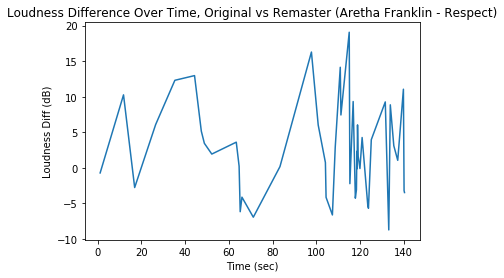

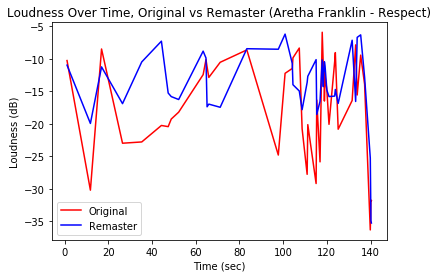

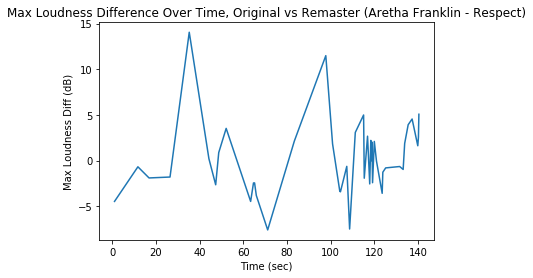

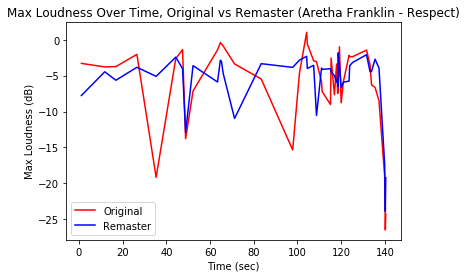

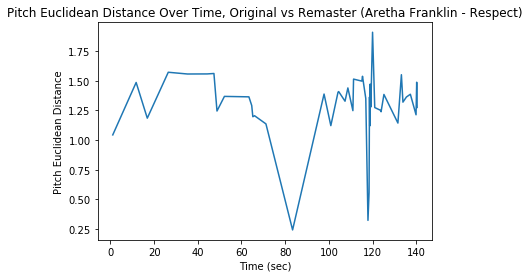

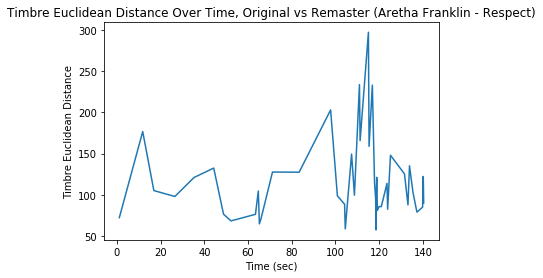

In [7]:
df_graphs(aretha_df, "Aretha Franklin - Respect")

In [8]:
beastie_df = pd.read_csv(clean_data_songs + 'beastie_analysis_clean.csv')
beastie_df = beastie_df.drop(columns=['Unnamed: 0'])
beastie_df['song_title'] = 'Ch-Check It Out'
beastie_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        4.7           0.2          -9.603             -18.684   
1        5.1           0.2         -23.893             -17.830   
2        5.3           0.1         -21.045             -22.730   
3        5.7           0.2         -23.544             -28.111   
4        5.9           0.2         -13.887             -14.354   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -9.081        -5.213            -5.927         -0.714   
1            6.063       -12.952            -7.345          5.607   
2           -1.685        -9.557            -8.117          1.440   
3           -4.567        -9.927            -8.646          1.281   
4           -0.467        -9.587           -10.141         -0.554   

                                             pitches  \
0  [0.269, 0.338, 0.164, 0.323, 1.0, 0.649, 0.146...   
1  [0.015, 0.045, 0.106, 1.0, 0.338, 0.036, 0.018...   
2  [0.156, 0.191, 0.274, 0.672, 1.0, 0.035, 0.019...   
3  [0.007, 0.017, 0.325, 1.0, 0.176, 0.033, 0.016...   
4  [0.186, 0.123, 0.302, 0.904, 0.963, 1.0, 0.785...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.44, 0.368, 0.262, 0.475, 1.0, 0.135, 0.085,...         0.729661   
1  [0.04, 0.191, 0.063, 1.0, 0.576, 0.104, 0.037,...         0.296091   
2  [0.131, 0.409, 0.428, 0.457, 1.0, 0.859, 0.795...         1.461958   
3  [0.075, 0.084, 0.155, 0.121, 0.259, 1.0, 0.265...         1.359755   
4  [0.106, 0.172, 0.425, 1.0, 0.293, 0.167, 0.131...         1.438668   

                                              timbre  \
0  [50.868, 46.806, -25.45, 19.293, 41.465, -29.5...   
1  [44.159, 85.999, -41.947, -28.275, 53.3, 0.998...   
2  [43.828, 38.592, -64.342, 75.954, 61.532, 8.05...   
3  [47.378, 64.974, -25.624, -45.043, 20.096, -4....   
4  [48.16, 64.106, 106.102, 18.253, 78.969, -35.1...   

                                          rem_timbre  timbre_eucl_dist  \
0  [49.78, 82.986, -19.983, 49.143, -5.82, -6.391...         94.075843   
1  [48.501, 81.809, -19.556, 17.344, 4.522, 17.23...         95.850761   
2  [43.617, -9.593, -17.441, 117.632, 39.718, -74...        130.563637   
3  [47.648, 46.791, 78.805, 12.794, 102.239, 21.7...        174.589921   
4  [48.23, 50.646, 125.789, 13.433, 93.926, -26.1...         48.964991   

        song_title  
0  Ch-Check It Out  
1  Ch-Check It Out  
2  Ch-Check It Out  
3  Ch-Check It Out  
4  Ch-Check It Out

In [9]:
df_means(beastie_df)

loudness mean: -0.21826548672566404
 loudness max mean: 1.2485132743362837
 pitch eucl dist mean: 1.2183163358446718
 timbre eucl dist mean: 128.9364212504071


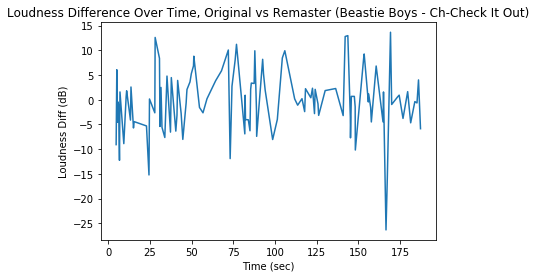

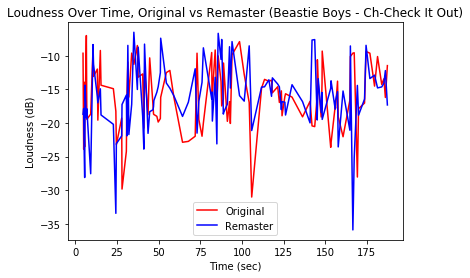

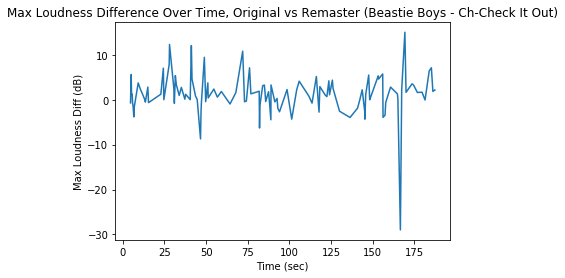

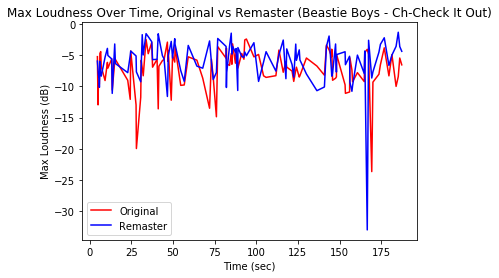

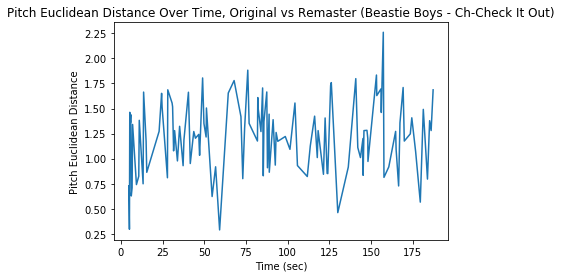

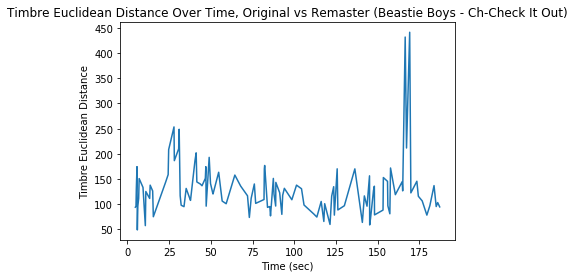

In [10]:
df_graphs(beastie_df, "Beastie Boys - Ch-Check It Out")

In [11]:
clash_df = pd.read_csv(clean_data_songs + 'clash_analysis_clean.csv')
clash_df = clash_df.drop(columns=['Unnamed: 0'])
clash_df['song_title'] = 'London Calling'
clash_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        3.6           0.4         -27.075             -26.513   
1        5.0           0.4         -25.580             -22.179   
2        6.3           0.4         -27.547             -25.619   
3        6.7           0.4         -28.043             -25.250   
4        7.6           0.5         -16.346             -28.085   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0            0.562        -7.424            -7.023          0.401   
1            3.401        -4.135            -4.266         -0.131   
2            1.928        -6.914            -6.408          0.506   
3            2.793        -4.682            -4.937         -0.255   
4          -11.739        -5.047            -4.917          0.130   

                                             pitches  \
0  [0.476, 0.426, 0.372, 0.358, 0.49, 0.286, 0.58...   
1  [0.707, 0.55, 0.357, 0.25, 0.46, 0.367, 0.486,...   
2  [0.493, 0.312, 0.406, 0.267, 0.476, 0.256, 0.4...   
3  [0.232, 0.069, 0.029, 0.06, 0.078, 0.091, 0.30...   
4  [0.077, 0.056, 0.101, 0.186, 1.0, 0.084, 0.068...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.72, 0.45, 0.407, 0.327, 0.447, 0.513, 0.512...         0.416953   
1  [0.621, 0.537, 0.307, 0.279, 0.466, 0.362, 0.4...         0.196698   
2  [0.579, 0.413, 0.382, 0.306, 0.549, 0.344, 0.4...         0.251845   
3  [0.991, 0.771, 0.406, 0.359, 0.558, 0.573, 0.5...         1.658997   
4  [0.178, 0.057, 0.027, 0.059, 0.097, 0.103, 0.3...         1.310033   

                                              timbre  \
0  [45.649, 44.663, 34.028, 63.98, -2.478, 20.167...   
1  [47.181, 52.363, 10.145, 92.612, -0.286, 27.43...   
2  [44.584, 30.559, 8.038, 107.153, 4.011, 16.738...   
3  [47.996, -31.355, -11.277, 16.425, 16.839, 23....   
4  [46.005, 37.472, -30.177, -42.219, -13.614, -9...   

                                          rem_timbre  timbre_eucl_dist  \
0  [43.793, 13.427, 23.038, 69.46, 18.75, 48.437,...         60.466296   
1  [46.966, 29.673, 17.364, 77.558, 15.157, 30.92...         36.495311   
2  [42.612, 28.966, 43.831, 47.652, 9.612, 66.341...         90.240405   
3  [44.258, 26.709, 10.965, 72.509, 28.301, 61.33...        101.698639   
4  [47.293, -49.815, -16.94, 20.601, 21.138, 24.0...        139.248027   

       song_title  
0  London Calling  
1  London Calling  
2  London Calling  
3  London Calling  
4  London Calling

In [12]:
df_means(clash_df)

loudness mean: -0.031173333333333143
 loudness max mean: -0.3161133333333333
 pitch eucl dist mean: 1.2441022741052008
 timbre eucl dist mean: 88.15279965155695


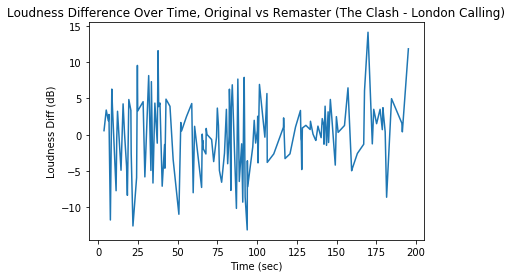

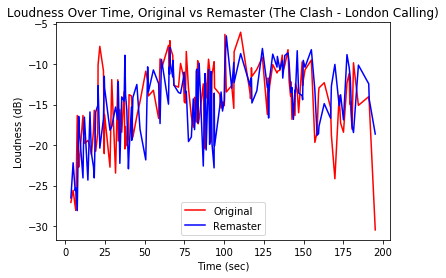

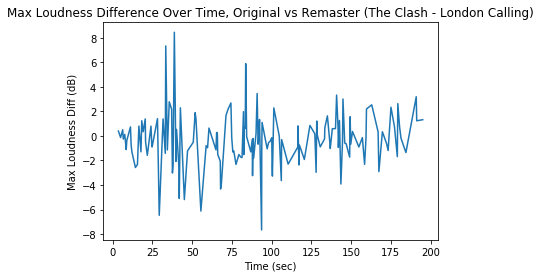

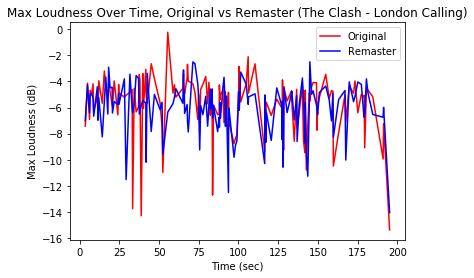

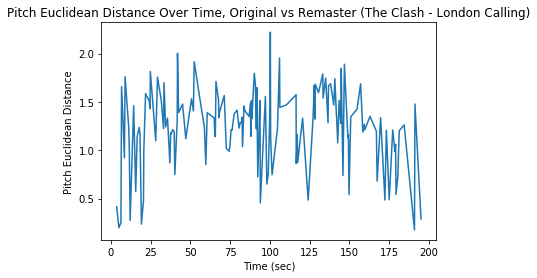

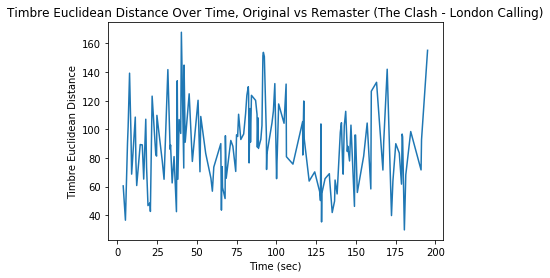

In [13]:
df_graphs(clash_df, "The Clash - London Calling")

In [14]:
euryth_df = pd.read_csv(clean_data_songs + 'euryth_analysis_clean.csv')
euryth_df = euryth_df.drop(columns=['Unnamed: 0'])
euryth_df['song_title'] = 'Sweet Dreams (Are Made of This)'
euryth_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        1.5           0.2         -28.478             -35.243   
1        2.7           0.2         -35.534             -37.348   
2        3.9           0.3         -31.681             -34.443   
3        5.1           0.2         -30.228             -37.892   
4        6.3           0.3         -27.833             -41.938   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -6.765       -11.869           -16.315         -4.446   
1           -1.814       -25.571           -23.133          2.438   
2           -2.762       -10.893           -13.393         -2.500   
3           -7.664       -17.706           -19.310         -1.604   
4          -14.105       -10.107           -16.493         -6.386   

                                             pitches  \
0  [0.638, 0.566, 0.605, 1.0, 0.352, 0.164, 0.173...   
1  [0.07, 0.031, 0.016, 0.139, 0.023, 0.023, 0.04...   
2  [1.0, 0.962, 0.622, 0.225, 0.115, 0.551, 0.29,...   
3  [1.0, 0.225, 0.113, 0.072, 0.127, 0.088, 0.032...   
4  [1.0, 0.895, 0.521, 0.327, 0.104, 0.223, 0.331...   

                                         rem_pitches  pitch_eucl_dist  \
0  [1.0, 0.474, 0.256, 0.089, 0.064, 0.124, 0.134...         1.090041   
1  [0.364, 0.024, 0.014, 0.027, 0.02, 0.016, 0.05...         0.400694   
2  [0.953, 1.0, 0.341, 0.211, 0.08, 0.053, 0.04, ...         1.118918   
3  [1.0, 0.069, 0.041, 0.394, 0.081, 0.018, 0.018...         0.424747   
4  [0.337, 0.257, 0.152, 0.113, 0.027, 0.071, 0.0...         1.284019   

                                              timbre  \
0  [39.56, -13.427, -51.499, 74.977, -56.132, -71...   
1  [29.779, -28.256, -3.057, -14.552, 11.725, 4.5...   
2  [40.438, -14.804, -47.057, 102.343, -35.077, -...   
3  [39.121, 13.814, 27.534, -0.827, -0.215, 3.37,...   
4  [39.997, -13.995, -42.724, 104.636, -42.076, -...   

                                          rem_timbre  timbre_eucl_dist  \
0  [34.953, 9.958, -55.607, 103.132, -52.441, -42...         54.401413   
1  [33.19, 1.516, -17.888, -1.11, -7.291, 19.538,...         52.874227   
2  [37.44, -40.775, -95.063, 64.828, -44.277, -87...         82.437887   
3  [35.488, 20.4, 15.672, -28.682, 30.298, 60.238...         84.609525   
4  [36.836, 6.878, -51.859, 57.19, -37.193, -50.7...         61.014970   

                        song_title  
0  Sweet Dreams (Are Made of This)  
1  Sweet Dreams (Are Made of This)  
2  Sweet Dreams (Are Made of This)  
3  Sweet Dreams (Are Made of This)  
4  Sweet Dreams (Are Made of This)

In [15]:
df_means(euryth_df)

loudness mean: -6.3660634920634935
 loudness max mean: -5.688825396825398
 pitch eucl dist mean: 1.0871960646811385
 timbre eucl dist mean: 103.11412565583949


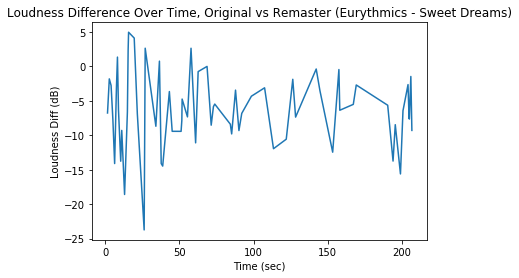

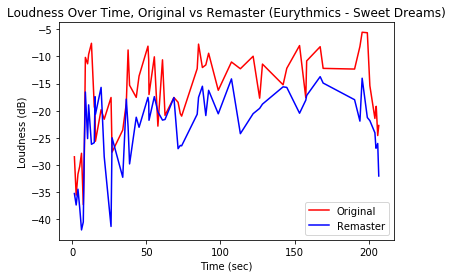

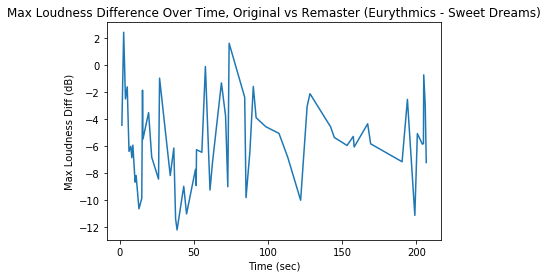

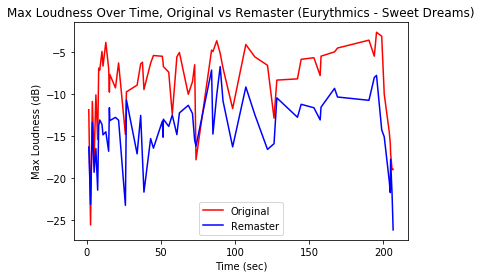

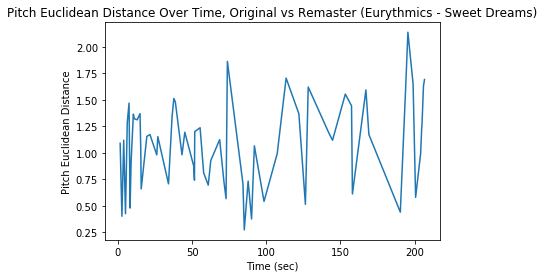

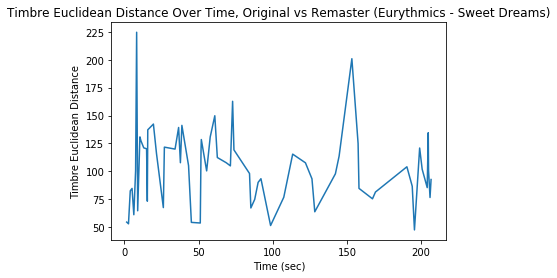

In [16]:
df_graphs(euryth_df, "Eurythmics - Sweet Dreams")

In [17]:
ice_cube_df = pd.read_csv(clean_data_songs + 'ice_cube_analysis_clean.csv')
ice_cube_df = ice_cube_df.drop(columns=['Unnamed: 0'])
ice_cube_df['song_title'] = 'It Was A Good Day'
ice_cube_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.0           0.2         -55.752             -59.821   
1        0.2           0.3         -57.703             -58.635   
2        0.5           0.1         -18.227             -39.637   
3        3.1           0.4         -24.000             -19.538   
4        4.2           0.2         -24.557             -18.833   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -4.069       -53.645           -58.045         -4.400   
1           -0.932        -8.941           -24.822        -15.881   
2          -21.410       -15.995           -25.678         -9.683   
3            4.462       -11.396           -10.085          1.311   
4            5.724       -12.465             0.013         12.478   

                                             pitches  \
0  [0.213, 0.218, 0.432, 0.439, 0.459, 0.779, 1.0...   
1  [0.465, 1.0, 0.169, 0.087, 0.234, 0.399, 0.071...   
2  [1.0, 0.614, 0.636, 0.628, 0.508, 0.508, 0.101...   
3  [0.035, 0.075, 0.146, 0.114, 0.212, 0.726, 1.0...   
4  [0.184, 0.338, 0.359, 0.186, 0.593, 0.244, 0.2...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.753, 0.674, 0.395, 0.189, 0.183, 0.325, 0.2...         1.556804   
1  [0.205, 0.029, 0.028, 0.02, 0.02, 0.024, 0.041...         1.581338   
2  [0.419, 0.298, 0.172, 0.073, 0.087, 0.073, 0.1...         1.510156   
3  [0.585, 0.581, 0.576, 0.557, 0.492, 0.531, 0.5...         2.000045   
4  [0.196, 0.237, 0.229, 0.124, 0.138, 0.122, 0.2...         1.128498   

                                              timbre  \
0  [5.279, 80.824, -94.435, -61.994, -10.438, -42...   
1  [41.815, -25.103, -45.155, -27.402, 3.281, 173...   
2  [43.448, 2.368, 9.896, -28.191, 10.647, -43.00...   
3  [42.936, -15.887, -24.672, -44.586, 5.403, 20....   
4  [44.41, 76.734, 65.881, 2.592, 39.405, 27.489,...   

                                          rem_timbre  timbre_eucl_dist  \
0  [1.473, 164.012, -1.409, -34.308, 24.225, -39....        134.911660   
1  [19.147, -0.204, -20.276, -262.456, 11.385, 25...        302.368698   
2  [27.852, 25.622, -55.305, 3.881, -8.367, -113....        147.286498   
3  [44.953, 93.378, 33.591, -3.494, 36.92, 22.382...        152.519285   
4  [51.236, 47.3, -9.131, 39.291, 17.331, 58.845,...        111.678349   

          song_title  
0  It Was A Good Day  
1  It Was A Good Day  
2  It Was A Good Day  
3  It Was A Good Day  
4  It Was A Good Day

In [18]:
df_means(ice_cube_df)

loudness mean: 2.4355909090909096
 loudness max mean: 2.2561818181818176
 pitch eucl dist mean: 1.3416252191827895
 timbre eucl dist mean: 142.21086100831005


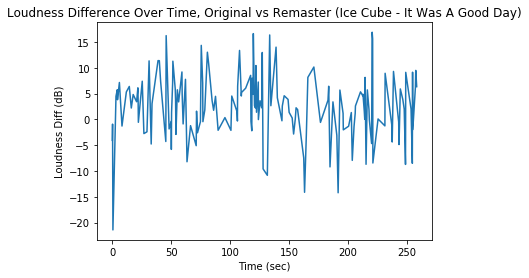

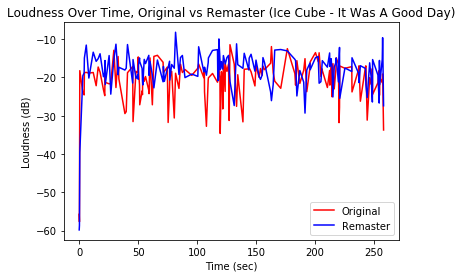

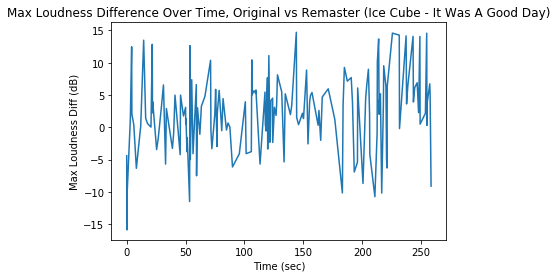

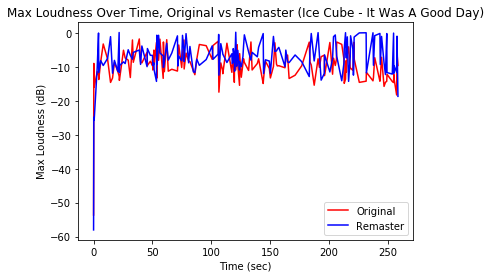

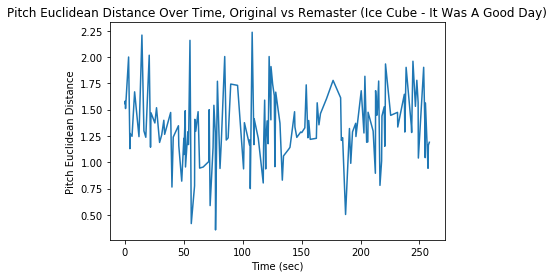

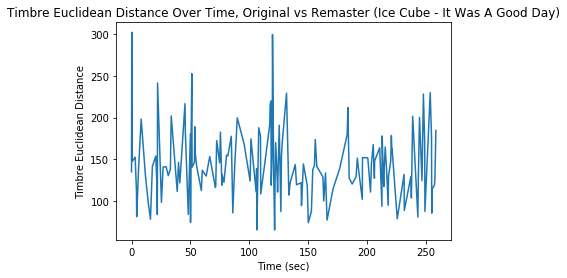

In [19]:
df_graphs(ice_cube_df, "Ice Cube - It Was A Good Day")

In [20]:
interpol_df = pd.read_csv(clean_data_songs + 'interpol_analysis_clean.csv')
interpol_df = interpol_df.drop(columns=['Unnamed: 0'])
interpol_df['song_title'] = 'PDA'
interpol_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.6           0.2         -19.738             -19.841   
1        0.8           0.2         -18.340             -18.281   
2        1.0           0.2         -22.549             -22.438   
3        1.2           0.2         -24.394             -24.397   
4        1.4           0.2         -27.126             -26.922   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -0.103        -6.152            -6.168         -0.016   
1            0.059        -8.772            -8.783         -0.011   
2            0.111        -9.364            -9.208          0.156   
3           -0.003        -8.540            -8.441          0.099   
4            0.204        -7.303            -7.438         -0.135   

                                             pitches  \
0  [0.214, 0.223, 0.203, 0.4, 0.533, 0.748, 1.0, ...   
1  [0.919, 0.707, 0.461, 0.605, 0.703, 0.203, 0.1...   
2  [1.0, 0.477, 0.263, 0.611, 0.637, 0.245, 0.168...   
3  [0.518, 0.385, 0.319, 0.28, 0.116, 0.11, 0.434...   
4  [0.135, 0.25, 0.229, 0.358, 0.55, 0.504, 1.0, ...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.212, 0.219, 0.189, 0.391, 0.529, 0.692, 1.0...         0.062458   
1  [0.904, 0.711, 0.461, 0.604, 0.699, 0.204, 0.1...         0.017889   
2  [1.0, 0.49, 0.28, 0.609, 0.618, 0.26, 0.177, 0...         0.070760   
3  [0.525, 0.444, 0.331, 0.286, 0.147, 0.143, 0.4...         0.081006   
4  [0.139, 0.257, 0.226, 0.348, 0.544, 0.462, 1.0...         0.050359   

                                              timbre  \
0  [47.588, 96.142, -55.139, -6.409, 0.509, 19.23...   
1  [44.045, 54.766, -125.869, -0.505, -24.424, -9...   
2  [43.418, 51.025, -139.872, 11.378, -25.689, -8...   
3  [42.288, 21.013, -140.753, 44.286, -39.24, -96...   
4  [43.905, 63.822, -61.724, -47.976, 2.497, 81.1...   

                                          rem_timbre  timbre_eucl_dist  \
0  [47.465, 102.442, -54.042, -14.891, 1.439, 26....         20.220580   
1  [44.037, 53.837, -126.295, -3.954, -26.794, -9...          7.843762   
2  [43.568, 50.937, -137.322, 10.376, -25.853, -9...          5.615807   
3  [42.35, 21.643, -143.509, 40.482, -31.159, -75...         28.300634   
4  [43.476, 64.919, -57.647, -62.37, 2.298, 81.17...         21.436749   

  song_title  
0        PDA  
1        PDA  
2        PDA  
3        PDA  
4        PDA

In [21]:
df_means(interpol_df)

loudness mean: 0.12178260869565218
 loudness max mean: 0.10351449275362314
 pitch eucl dist mean: 0.07303367117150522
 timbre eucl dist mean: 7.033959763730261


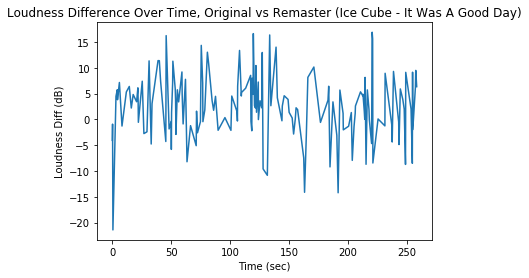

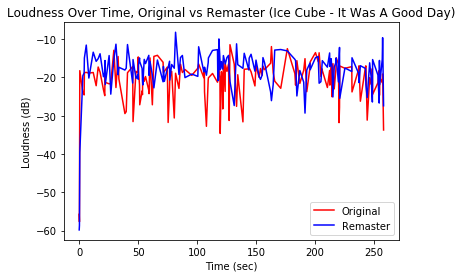

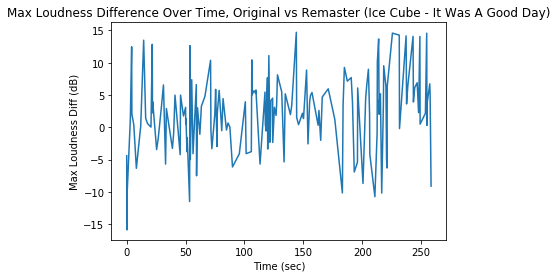

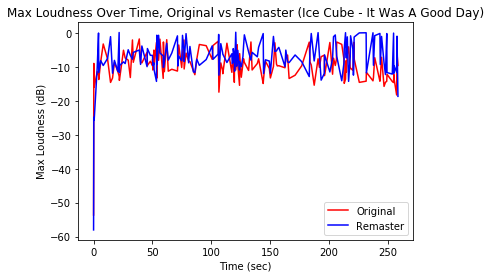

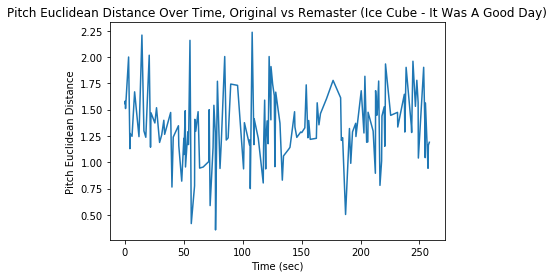

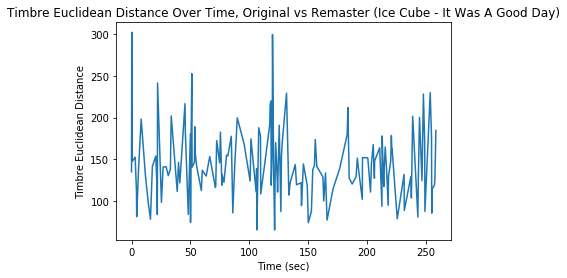

In [22]:
df_graphs(ice_cube_df, "Ice Cube - It Was A Good Day")

In [23]:
mb20_df = pd.read_csv(clean_data_songs + 'mb20_analysis_clean.csv')
mb20_df = mb20_df.drop(columns=['Unnamed: 0'])
mb20_df['song_title'] = 'Unwell'
mb20_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        5.2           0.2         -11.775             -12.984   
1       11.1           0.2         -12.535             -15.100   
2       13.9           0.2          -9.116              -9.607   
3       16.5           0.4          -9.963              -7.681   
4       18.0           0.4          -8.751              -8.484   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -1.209        -9.414           -10.130         -0.716   
1           -2.565        -9.141           -12.753         -3.612   
2           -0.491        -5.921            -3.108          2.813   
3            2.282        -5.226            -5.254         -0.028   
4            0.267        -3.825            -5.957         -2.132   

                                             pitches  \
0  [0.291, 1.0, 0.625, 0.409, 0.278, 0.197, 0.035...   
1  [0.347, 0.758, 0.796, 1.0, 0.563, 0.139, 0.188...   
2  [0.147, 0.202, 0.095, 0.051, 0.756, 0.119, 0.0...   
3  [0.15, 0.321, 1.0, 0.265, 0.31, 0.22, 0.221, 0...   
4  [0.071, 0.322, 0.101, 0.052, 0.172, 0.245, 1.0...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.328, 1.0, 0.49, 0.262, 0.201, 0.033, 0.076,...         0.283618   
1  [0.166, 0.143, 0.055, 0.484, 1.0, 0.582, 0.148...         1.355873   
2  [0.379, 0.359, 0.188, 0.212, 0.662, 0.145, 0.5...         0.864421   
3  [0.3, 0.364, 1.0, 0.475, 0.58, 0.276, 0.38, 0....         0.886970   
4  [0.156, 0.595, 1.0, 0.072, 0.791, 0.089, 0.129...         1.610111   

                                              timbre  \
0  [49.299, 37.289, 22.494, -4.89, 7.75, -27.782,...   
1  [48.483, 33.704, 49.344, 0.144, -9.512, -30.23...   
2  [52.344, 34.517, 62.029, -11.79, 38.627, -20.5...   
3  [52.861, 19.243, 31.592, -3.789, 11.807, -38.0...   
4  [54.678, 56.653, 21.941, -15.337, 7.411, -27.9...   

                                          rem_timbre  timbre_eucl_dist  \
0  [48.691, 10.157, 44.399, -3.43, -2.971, -30.75...         48.669440   
1  [46.803, -26.575, 37.397, -17.814, -7.617, -43...         74.774438   
2  [53.091, 10.832, 32.058, -2.611, 18.779, -61.2...         85.959014   
3  [53.392, 22.88, 56.12, -1.568, 16.57, -28.695,...         57.951998   
4  [52.888, 35.772, 50.925, -3.545, 50.624, -36.5...         64.625717   

  song_title  
0     Unwell  
1     Unwell  
2     Unwell  
3     Unwell  
4     Unwell

In [24]:
df_means(mb20_df)

loudness mean: -0.1638142857142859
 loudness max mean: -0.08261428571428575
 pitch eucl dist mean: 1.0366447157551535
 timbre eucl dist mean: 93.79667884203634


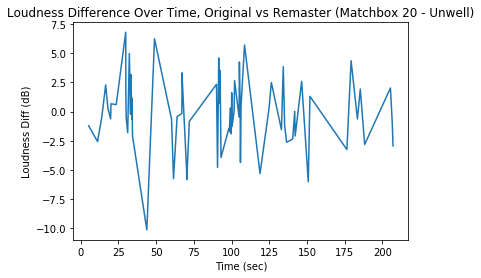

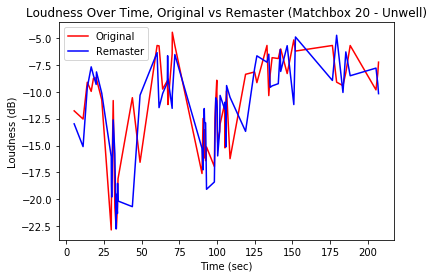

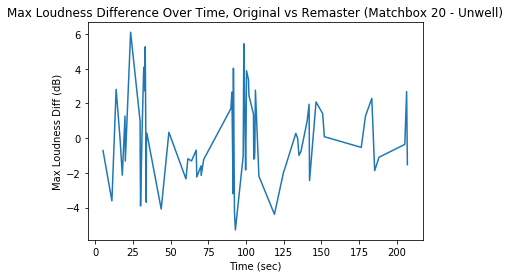

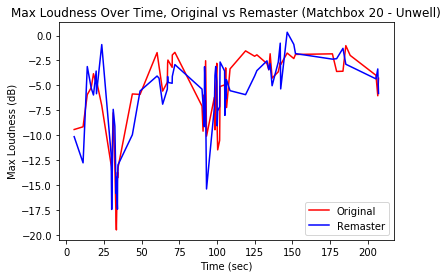

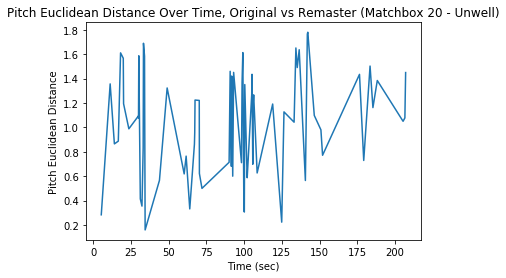

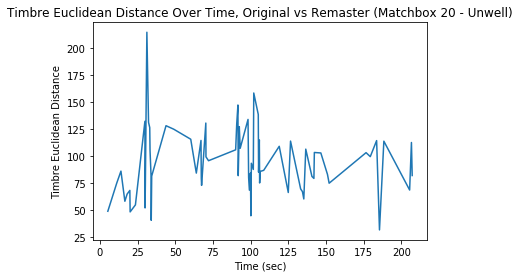

In [25]:
df_graphs(mb20_df, "Matchbox 20 - Unwell")

In [26]:
nin_df = pd.read_csv(clean_data_songs + 'nin_analysis_clean.csv')
nin_df = nin_df.drop(columns=['Unnamed: 0'])
nin_df['song_title'] = 'Head Like A Hole'
nin_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.8           0.1         -51.525             -38.071   
1        0.9           0.1         -49.972             -44.228   
2        1.3           0.1         -49.790             -43.543   
3        1.5           0.1         -50.044             -43.245   
4        1.7           0.1         -47.073             -45.966   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           13.454       -36.787           -28.024          8.763   
1            5.744       -33.722           -23.740          9.982   
2            6.247       -33.736           -27.452          6.284   
3            6.799       -35.082           -24.057         11.025   
4            1.107       -35.444           -23.203         12.241   

                                             pitches  \
0  [0.284, 0.514, 0.12, 0.144, 0.215, 0.15, 0.181...   
1  [0.56, 0.182, 0.197, 0.117, 0.169, 0.146, 0.16...   
2  [0.376, 0.366, 0.745, 0.289, 0.225, 0.367, 0.5...   
3  [0.374, 0.528, 0.433, 0.751, 0.436, 0.343, 0.3...   
4  [0.786, 0.584, 0.708, 0.339, 0.342, 0.415, 0.5...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.495, 0.752, 1.0, 0.613, 0.479, 0.909, 0.93,...         1.582487   
1  [0.319, 0.43, 0.635, 0.606, 0.48, 0.457, 0.408...         1.579764   
2  [0.106, 0.409, 0.126, 0.141, 0.217, 0.146, 0.1...         1.211864   
3  [0.503, 0.174, 0.184, 0.109, 0.159, 0.125, 0.1...         1.591556   
4  [0.307, 0.313, 0.348, 0.359, 0.279, 0.236, 0.2...         1.075242   

                                              timbre  \
0  [16.955, 134.723, 6.042, 66.641, 95.517, -73.0...   
1  [20.006, 116.025, -1.34, 61.184, 76.457, -42.2...   
2  [17.991, 119.4, -2.018, 82.187, 72.488, -88.05...   
3  [18.909, 198.859, 29.485, 51.701, 72.429, 25.5...   
4  [18.125, 147.636, 8.86, 29.56, 91.983, 19.922,...   

                                          rem_timbre  timbre_eucl_dist  \
0  [26.324, 139.765, -45.937, 57.368, 105.222, -2...        107.332907   
1  [27.631, 163.847, 0.189, 87.129, 74.423, 19.74...         94.625265   
2  [25.081, 127.569, -17.506, 73.995, 97.356, -67...         70.279223   
3  [28.459, 100.297, -26.577, 66.88, 70.927, -42....        153.326153   
4  [28.528, 161.306, 5.39, 106.385, 58.419, -26.8...        106.685838   

         song_title  
0  Head Like A Hole  
1  Head Like A Hole  
2  Head Like A Hole  
3  Head Like A Hole  
4  Head Like A Hole

In [27]:
df_means(nin_df)

loudness mean: 8.113251121076232
 loudness max mean: 7.935739910313906
 pitch eucl dist mean: 0.9777387759732573
 timbre eucl dist mean: 92.3313300472958


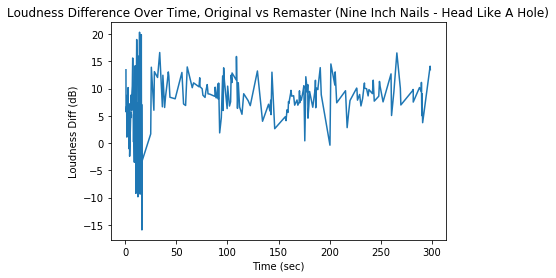

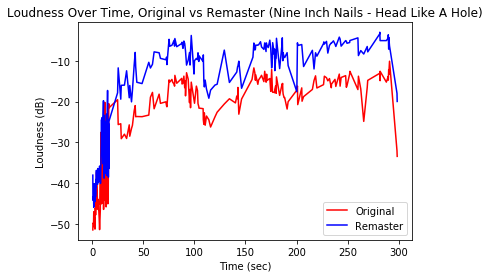

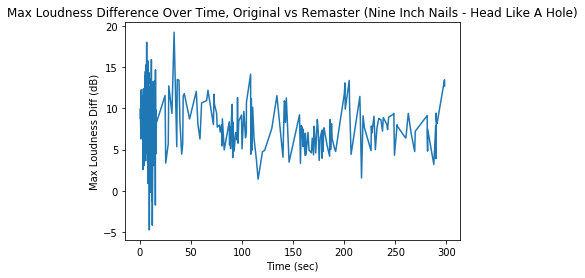

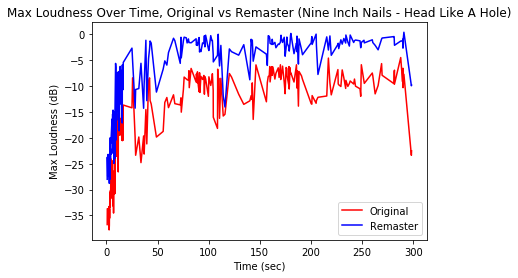

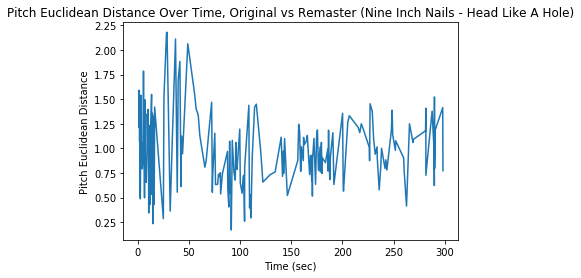

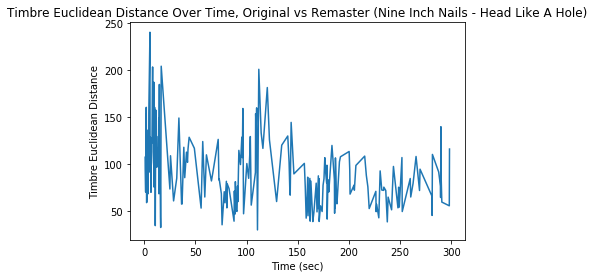

In [28]:
df_graphs(nin_df, "Nine Inch Nails - Head Like A Hole")

In [29]:
notor_big_df = pd.read_csv(clean_data_songs + 'notor_big_analysis_clean.csv')
notor_big_df = notor_big_df.drop(columns=['Unnamed: 0'])
notor_big_df['song_title'] = 'Big Poppa'
notor_big_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.4           0.2         -19.317             -19.482   
1        0.8           0.4         -22.847             -25.808   
2        1.2           0.3         -20.183             -21.900   
3        1.5           0.3         -29.045             -28.775   
4        4.4           0.3         -16.994             -16.751   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -0.165       -13.939           -14.923         -0.984   
1           -2.961        -1.772            -2.795         -1.023   
2           -1.717       -10.810           -11.465         -0.655   
3            0.270       -13.568           -14.478         -0.910   
4            0.243        -8.587            -9.255         -0.668   

                                             pitches  \
0  [0.033, 0.065, 0.037, 0.036, 0.593, 0.577, 0.9...   
1  [0.803, 0.226, 0.174, 0.23, 1.0, 0.649, 0.393,...   
2  [0.391, 0.541, 0.879, 1.0, 0.746, 0.241, 0.174...   
3  [0.775, 0.347, 0.144, 0.036, 0.142, 0.112, 0.0...   
4  [0.512, 0.369, 0.622, 0.396, 0.256, 0.329, 0.2...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.612, 0.364, 0.307, 0.417, 1.0, 0.493, 0.279...         1.429187   
1  [0.756, 0.196, 0.159, 0.219, 1.0, 0.735, 0.403...         0.116069   
2  [0.372, 0.538, 0.936, 1.0, 0.713, 0.204, 0.167...         0.164027   
3  [0.82, 0.383, 0.171, 0.071, 0.151, 0.129, 0.04...         0.084184   
4  [0.494, 0.387, 0.605, 0.442, 0.267, 0.327, 0.2...         0.073621   

                                              timbre  \
0  [43.127, 65.9, -55.457, -40.077, -16.985, -26....   
1  [49.317, 76.487, -56.554, 118.011, -21.925, -3...   
2  [43.703, 32.69, -7.638, 24.045, 11.985, 5.384,...   
3  [41.386, 5.119, -38.661, -4.499, -44.662, 2.48...   
4  [47.994, -8.977, 5.056, -9.864, -17.438, -5.82...   

                                          rem_timbre  timbre_eucl_dist  \
0  [41.757, 49.343, -57.733, -37.261, -9.004, -29...         22.750096   
1  [47.792, 56.967, -67.356, 115.782, -3.183, -8....         45.281587   
2  [43.483, 9.523, -12.919, 31.445, 15.884, 0.028...         30.567601   
3  [39.037, 27.288, -16.349, -23.955, -38.166, 38...         72.399724   
4  [47.487, -26.038, 3.427, 6.962, -7.316, -13.51...         28.987462   

  song_title  
0  Big Poppa  
1  Big Poppa  
2  Big Poppa  
3  Big Poppa  
4  Big Poppa

In [30]:
df_means(notor_big_df)

loudness mean: -0.39127380952381
 loudness max mean: -0.7322916666666668
 pitch eucl dist mean: 1.2016976551190532
 timbre eucl dist mean: 134.06049165375083


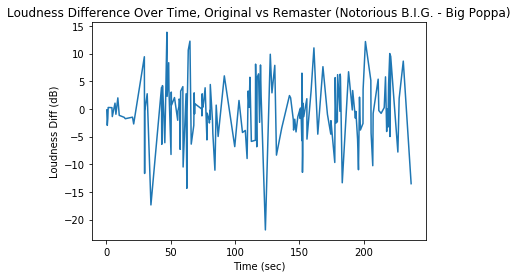

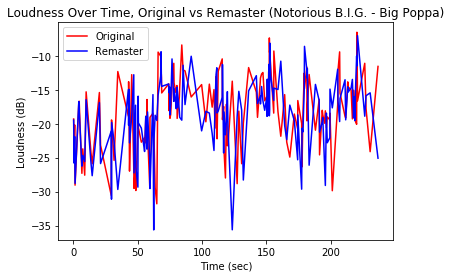

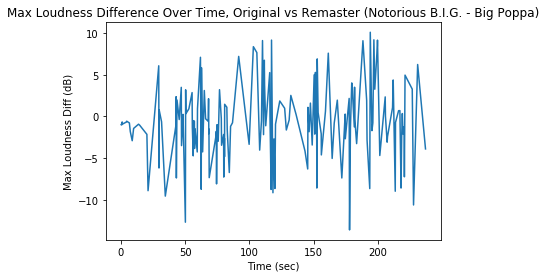

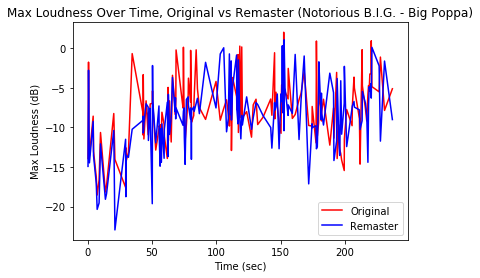

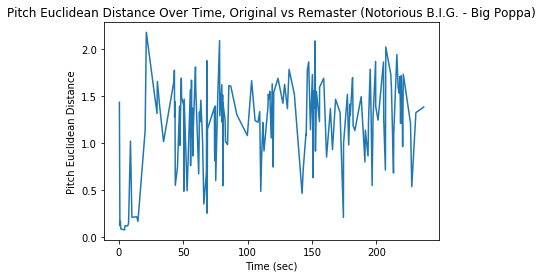

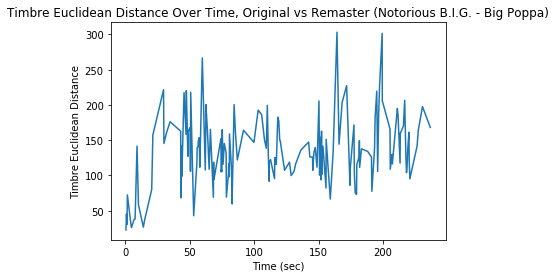

In [31]:
df_graphs(notor_big_df, "Notorious B.I.G. - Big Poppa")

In [32]:
queen_df = pd.read_csv(clean_data_songs + 'queen_analysis_clean.csv')
queen_df = queen_df.drop(columns=['Unnamed: 0'])
queen_df['song_title'] = 'Another One Bites The Dust'
queen_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.4           0.1         -43.267             -37.984   
1        0.8           0.2         -45.709             -40.844   
2        1.9           0.3         -47.879             -42.622   
3        2.6           0.1         -48.701             -43.375   
4        2.7           0.3         -40.337             -34.415   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0            5.283       -36.398           -30.624          5.774   
1            4.865       -33.626           -27.589          6.037   
2            5.257       -36.937           -30.343          6.594   
3            5.326       -34.545           -28.048          6.497   
4            5.922        -9.759            -3.217          6.542   

                                             pitches  \
0  [0.353, 0.162, 0.45, 0.791, 0.432, 0.386, 0.60...   
1  [0.808, 1.0, 0.501, 0.749, 0.754, 0.727, 0.547...   
2  [0.894, 0.9, 0.41, 0.239, 0.56, 0.407, 0.282, ...   
3  [1.0, 0.683, 0.413, 0.383, 0.406, 0.65, 0.166,...   
4  [0.818, 0.263, 0.084, 0.117, 0.478, 1.0, 0.171...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.351, 0.155, 0.394, 0.687, 0.461, 0.386, 0.6...         0.169856   
1  [0.988, 1.0, 0.456, 0.651, 0.669, 0.695, 0.521...         0.233135   
2  [0.881, 1.0, 0.348, 0.232, 0.46, 0.355, 0.258,...         0.276510   
3  [1.0, 0.678, 0.427, 0.405, 0.407, 0.63, 0.158,...         0.043035   
4  [0.928, 0.312, 0.092, 0.111, 0.446, 1.0, 0.189...         0.135573   

                                              timbre  \
0  [22.636, -232.844, -146.453, -89.755, 54.528, ...   
1  [17.314, 156.056, -115.166, 113.947, 1.752, -5...   
2  [14.936, 144.242, -92.339, 98.969, 19.792, -70...   
3  [22.941, -224.744, -148.888, -61.664, 46.216, ...   
4  [35.929, 1.146, -191.381, 165.681, 5.324, 34.4...   

                                          rem_timbre  timbre_eucl_dist  \
0  [27.491, -293.557, -142.252, -60.457, 31.325, ...         78.246385   
1  [23.127, 155.413, -111.603, 118.228, -12.956, ...         25.502402   
2  [20.532, 136.076, -84.084, 105.887, 1.377, -82...         34.727871   
3  [29.113, -248.295, -138.677, -54.641, 22.969, ...         41.591740   
4  [42.607, -5.675, -181.953, 174.252, -7.088, 2....         46.981910   

                   song_title  
0  Another One Bites The Dust  
1  Another One Bites The Dust  
2  Another One Bites The Dust  
3  Another One Bites The Dust  
4  Another One Bites The Dust

In [33]:
df_means(queen_df)

loudness mean: 7.022844444444442
 loudness max mean: 7.960177777777778
 pitch eucl dist mean: 0.5144517368965182
 timbre eucl dist mean: 72.49027626095425


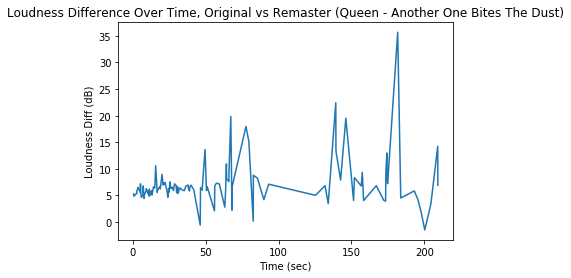

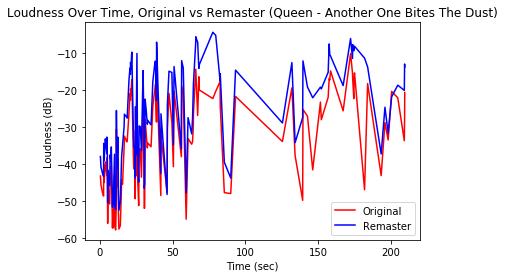

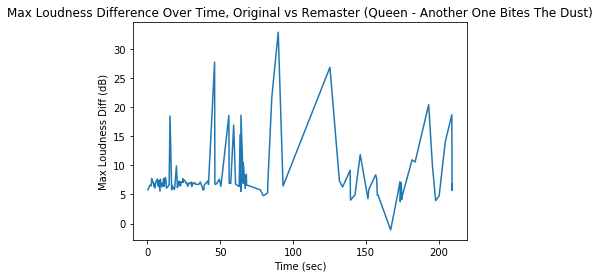

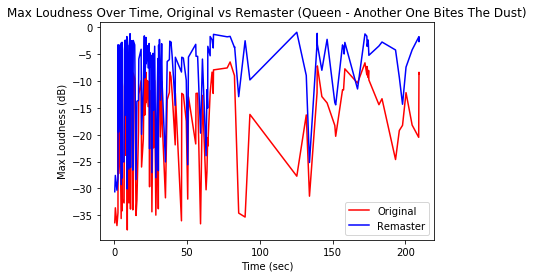

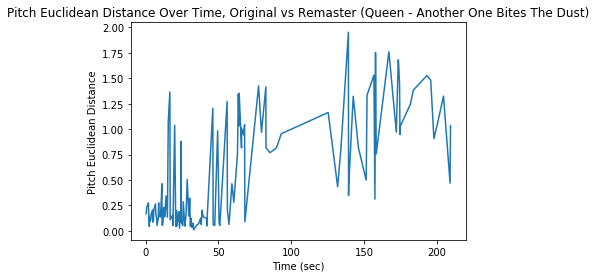

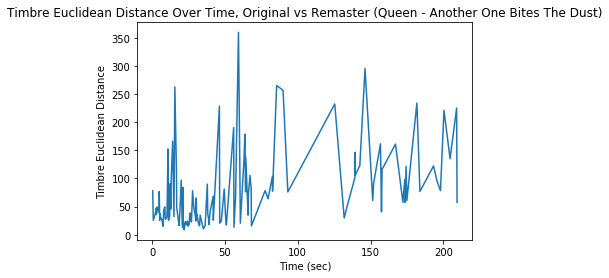

In [34]:
df_graphs(queen_df, "Queen - Another One Bites The Dust")

In [35]:
alanis_df = pd.read_csv(clean_data_songs + 'alanis_analysis_clean.csv')
alanis_df = alanis_df.drop(columns=['Unnamed: 0'])
alanis_df['song_title'] = 'Hand in My Pocket - Acoustic'
alanis_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.0           0.6         -60.000             -60.000   
1        0.6           0.4         -60.000             -60.000   
2        1.0           0.2         -27.267             -27.267   
3        1.2           0.2         -26.190             -26.190   
4        1.4           0.4         -28.241             -28.241   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0              0.0       -60.000           -60.000            0.0   
1              0.0       -13.367           -13.367            0.0   
2              0.0       -20.165           -20.165            0.0   
3              0.0       -19.873           -19.873            0.0   
4              0.0       -18.448           -18.448            0.0   

                                             pitches  \
0  [0.973, 0.971, 1.0, 0.89, 0.703, 0.516, 0.451,...   
1  [0.292, 0.08, 0.035, 0.033, 0.038, 0.146, 0.27...   
2  [0.031, 0.011, 0.024, 0.02, 0.038, 0.086, 0.11...   
3  [0.009, 0.005, 0.011, 0.005, 0.004, 0.047, 0.2...   
4  [0.056, 0.015, 0.09, 0.014, 0.02, 0.083, 0.404...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.973, 0.971, 1.0, 0.89, 0.703, 0.516, 0.451,...              0.0   
1  [0.292, 0.08, 0.035, 0.033, 0.038, 0.146, 0.27...              0.0   
2  [0.031, 0.011, 0.024, 0.02, 0.038, 0.086, 0.11...              0.0   
3  [0.009, 0.005, 0.011, 0.005, 0.004, 0.047, 0.2...              0.0   
4  [0.056, 0.015, 0.09, 0.014, 0.02, 0.083, 0.404...              0.0   

                                              timbre  \
0  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...   
1  [34.461, 6.843, 2.147, -38.414, 6.244, 182.582...   
2  [36.141, -32.797, -26.911, -39.12, -30.485, -3...   
3  [36.049, -40.699, -64.596, 1.765, -3.534, -62....   
4  [37.281, -14.918, -17.852, -0.032, -8.78, 15.2...   

                                          rem_timbre  timbre_eucl_dist  \
0  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...               0.0   
1  [34.461, 6.843, 2.147, -38.414, 6.244, 182.582...               0.0   
2  [36.141, -32.797, -26.911, -39.12, -30.485, -3...               0.0   
3  [36.049, -40.699, -64.596, 1.765, -3.534, -62....               0.0   
4  [37.281, -14.918, -17.852, -0.032, -8.78, 15.2...               0.0   

                     song_title  
0  Hand in My Pocket - Acoustic  
1  Hand in My Pocket - Acoustic  
2  Hand in My Pocket - Acoustic  
3  Hand in My Pocket - Acoustic  
4  Hand in My Pocket - Acoustic

In [36]:
df_means(alanis_df)

loudness mean: 0.0
 loudness max mean: 0.0
 pitch eucl dist mean: 0.0
 timbre eucl dist mean: 0.0


In [37]:
hootie_df = pd.read_csv(clean_data_songs + 'hootie_analysis_clean.csv')
hootie_df = hootie_df.drop(columns=['Unnamed: 0'])
hootie_df['song_title'] = 'Only Wanna Be With You'
hootie_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        5.0           0.3         -18.308             -18.933   
1        6.0           0.3         -18.330             -16.924   
2        8.6           0.3         -14.553             -13.853   
3       15.8           0.3         -14.637             -16.558   
4       21.2           0.3          -9.496             -14.687   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -0.625        -8.844           -14.660         -5.816   
1            1.406        -8.076           -12.115         -4.039   
2            0.700        -4.670            -8.446         -3.776   
3           -1.921        -8.441            -3.013          5.428   
4           -5.191        -4.514            -5.161         -0.647   

                                             pitches  \
0  [0.124, 0.573, 0.114, 0.097, 0.097, 0.151, 1.0...   
1  [0.176, 0.299, 0.071, 0.11, 0.07, 0.13, 0.879,...   
2  [0.482, 1.0, 0.18, 0.025, 0.054, 0.059, 0.035,...   
3  [0.405, 1.0, 0.12, 0.069, 0.058, 0.035, 0.078,...   
4  [0.535, 1.0, 0.727, 0.774, 0.161, 0.221, 0.67,...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.097, 0.645, 0.177, 0.097, 0.086, 0.247, 1.0...         0.187822   
1  [0.186, 0.26, 0.108, 0.102, 0.053, 0.13, 0.413...         0.477659   
2  [0.294, 0.293, 0.044, 0.118, 0.033, 0.04, 0.05...         1.263164   
3  [0.384, 1.0, 0.41, 0.183, 0.163, 0.179, 0.184,...         0.554977   
4  [0.298, 0.476, 0.066, 0.069, 0.059, 0.348, 1.0...         1.767219   

                                              timbre  \
0  [47.194, 77.762, 5.533, 18.418, 10.825, -5.478...   
1  [47.722, 80.119, -7.615, -5.113, 29.681, 19.60...   
2  [51.408, 98.253, -66.179, -14.419, -4.257, -64...   
3  [47.611, 51.703, -34.028, 4.025, -30.826, -40....   
4  [52.145, 46.715, 9.667, -9.368, -14.224, -3.86...   

                                          rem_timbre  timbre_eucl_dist  \
0  [43.403, 61.595, 42.056, -17.465, 0.594, -17.7...         64.812221   
1  [46.018, 63.955, 13.737, -16.112, 16.806, -21....         63.366412   
2  [47.35, 106.68, -81.111, -7.94, -0.702, -46.81...         55.479654   
3  [51.898, 72.798, -55.468, 10.8, -10.156, -48.1...         42.988720   
4  [50.071, 27.818, 10.979, -17.066, 22.808, 11.8...         58.598070   

               song_title  
0  Only Wanna Be With You  
1  Only Wanna Be With You  
2  Only Wanna Be With You  
3  Only Wanna Be With You  
4  Only Wanna Be With You

In [38]:
df_means(hootie_df)

loudness mean: -0.0213253012048194
 loudness max mean: 0.009554216867469866
 pitch eucl dist mean: 0.9924393205710106
 timbre eucl dist mean: 65.97527739911627


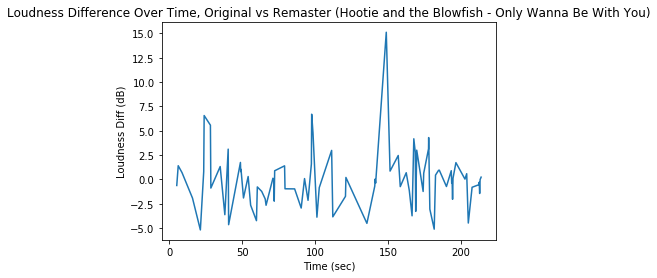

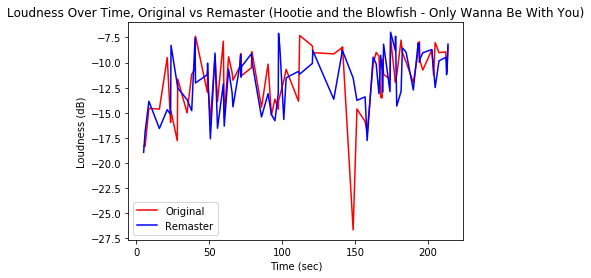

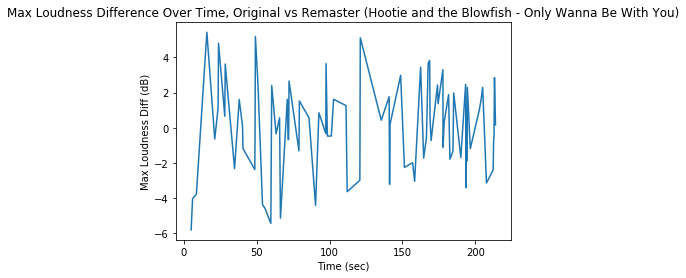

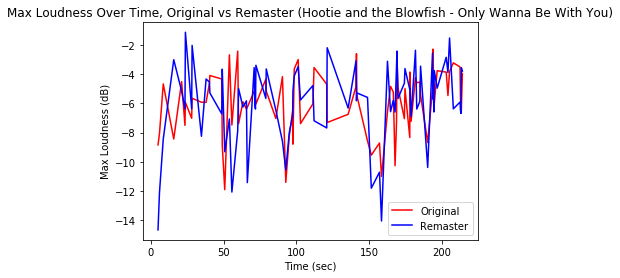

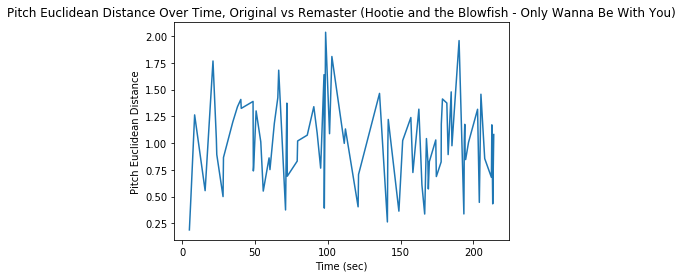

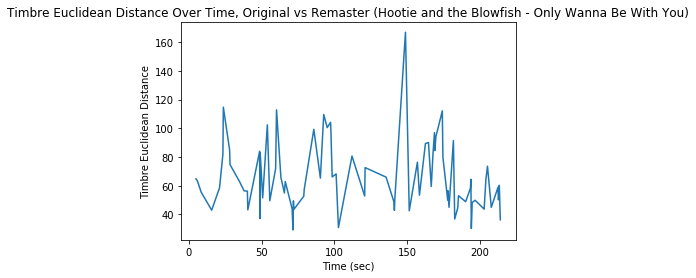

In [39]:
df_graphs(hootie_df, "Hootie and the Blowfish - Only Wanna Be With You")

In [40]:
maze_df = pd.read_csv(clean_data_songs + 'maze_analysis_clean.csv')
maze_df = maze_df.drop(columns=['Unnamed: 0'])
maze_df['song_title'] = 'Before I Let Go'
maze_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        9.7           0.3          -9.425             -14.249   
1       16.4           0.3         -33.428             -32.012   
2       20.7           0.1         -20.688             -27.318   
3       21.7           0.2         -16.184             -17.717   
4       25.0           0.2         -14.130             -17.872   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -4.824        -4.522            -8.356         -3.834   
1            1.416        -1.657           -17.483        -15.826   
2           -6.630        -6.397           -17.511        -11.114   
3           -1.533        -6.725            -7.338         -0.613   
4           -3.742        -5.815           -13.617         -7.802   

                                             pitches  \
0  [0.57, 0.406, 0.218, 0.129, 0.14, 0.053, 0.044...   
1  [0.105, 1.0, 0.067, 0.027, 0.082, 0.084, 0.14,...   
2  [0.931, 0.078, 0.067, 0.083, 0.067, 0.021, 0.1...   
3  [0.153, 0.112, 0.091, 0.34, 0.592, 0.41, 0.167...   
4  [0.248, 0.809, 1.0, 0.113, 0.059, 0.235, 0.433...   

                                         rem_pitches  pitch_eucl_dist  \
0  [1.0, 0.058, 0.074, 0.035, 0.487, 0.306, 0.056...         1.121669   
1  [0.022, 0.07, 0.081, 0.392, 0.631, 0.123, 0.09...         1.518640   
2  [0.058, 0.134, 0.121, 0.039, 0.146, 0.066, 0.2...         1.508479   
3  [0.203, 0.941, 0.291, 0.078, 0.132, 0.163, 1.0...         1.665429   
4  [0.523, 1.0, 0.364, 0.098, 0.485, 0.215, 0.225...         0.940193   

                                              timbre  \
0  [50.267, -63.796, 1.356, 45.092, 59.081, -26.8...   
1  [47.574, -17.662, -53.462, 5.509, 48.424, 122....   
2  [51.65, 63.029, 163.507, 38.075, 93.144, -8.62...   
3  [47.51, -33.471, -14.605, 32.395, 73.953, -4.4...   
4  [50.268, -27.011, -21.88, 29.489, 9.374, -24.7...   

                                          rem_timbre  timbre_eucl_dist  \
0  [47.083, 4.79, 28.344, 33.622, 40.267, -69.749...        105.160782   
1  [35.605, 41.825, -61.374, 71.918, 69.805, -28....        196.429867   
2  [37.598, 12.266, 54.006, 60.578, 1.485, -17.70...        178.412921   
3  [47.21, -11.863, -4.726, 66.053, 46.327, -62.1...         93.048494   
4  [44.33, -6.923, 94.743, -0.817, 9.302, -14.553...        134.633096   

        song_title  
0  Before I Let Go  
1  Before I Let Go  
2  Before I Let Go  
3  Before I Let Go  
4  Before I Let Go

In [41]:
df_means(maze_df)

loudness mean: -5.272641025641026
 loudness max mean: -5.132
 pitch eucl dist mean: 1.2283048553647866
 timbre eucl dist mean: 144.45576443994986


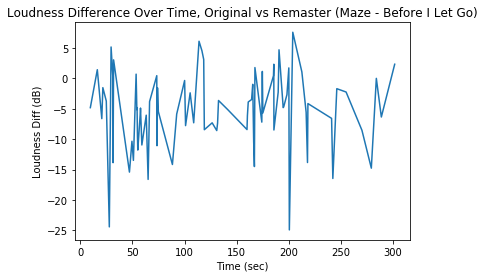

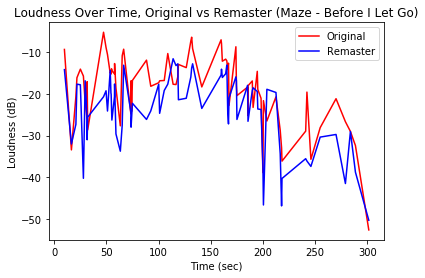

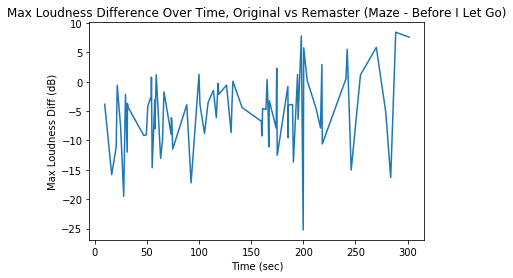

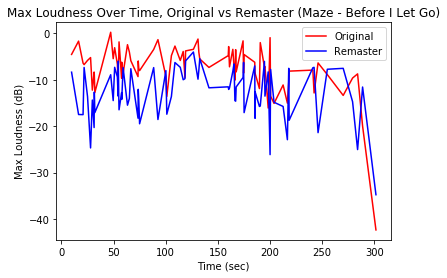

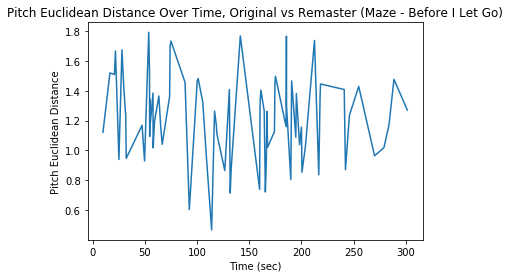

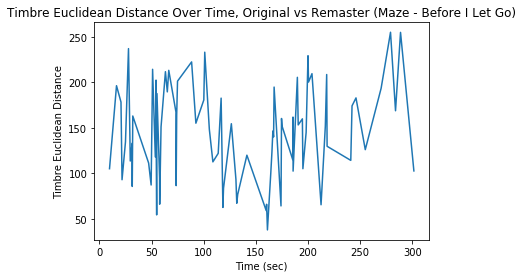

In [42]:
df_graphs(maze_df, "Maze - Before I Let Go")

In [43]:
mj_df = pd.read_csv(clean_data_songs + 'mj_analysis_clean.csv')
mj_df = mj_df.drop(columns=['Unnamed: 0'])
mj_df['song_title'] = 'P.Y.T. (Pretty Young Thing)'
mj_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.0           0.2         -60.000             -60.000   
1        0.2           0.2         -59.027             -60.000   
2        0.7           0.3         -32.496             -28.661   
3        1.5           0.1         -30.798             -27.089   
4        1.9           0.1         -28.759             -25.269   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0            0.000       -60.000           -60.000          0.000   
1           -0.973       -25.639           -21.903          3.736   
2            3.835       -16.378           -12.218          4.160   
3            3.709       -24.666           -20.614          4.052   
4            3.490       -23.761           -20.171          3.590   

                                             pitches  \
0  [1.0, 0.964, 0.257, 0.223, 0.189, 0.184, 0.168...   
1  [0.011, 0.429, 0.292, 0.022, 0.038, 0.008, 0.1...   
2  [0.066, 1.0, 0.32, 0.046, 0.587, 0.042, 0.118,...   
3  [0.008, 0.076, 0.073, 0.012, 0.037, 0.005, 0.0...   
4  [0.115, 0.64, 0.42, 0.085, 0.059, 0.06, 0.411,...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.961, 0.287, 0.218, 0.203, 0.116, 0.389, 0.3...         1.016972   
1  [0.021, 0.581, 0.378, 0.042, 0.055, 0.017, 0.2...         0.191314   
2  [0.064, 1.0, 0.324, 0.049, 0.599, 0.044, 0.123...         0.024597   
3  [0.006, 0.077, 0.074, 0.013, 0.041, 0.006, 0.0...         0.034117   
4  [0.102, 0.605, 0.399, 0.08, 0.055, 0.053, 0.38...         0.120237   

                                              timbre  \
0  [0.047, 170.19, 7.851, -29.783, 56.092, -50.34...   
1  [30.754, 8.254, -36.712, 10.312, 99.393, -11.5...   
2  [39.414, -11.437, 0.119, 2.235, 84.918, -15.60...   
3  [34.067, -59.112, -71.153, -48.538, 23.406, -4...   
4  [34.911, -25.435, -33.833, -47.286, 22.223, -2...   

                                          rem_timbre  timbre_eucl_dist  \
0  [0.046, 170.207, 7.887, -29.759, 56.126, -50.3...          0.071729   
1  [31.617, 52.624, -31.363, -12.895, 114.117, 11...        163.757241   
2  [43.596, -4.779, 4.684, 7.062, 87.648, -23.076...         13.967819   
3  [38.015, -53.16, -64.766, -44.798, 25.0, -45.4...         11.666882   
4  [38.933, -21.655, -25.482, -46.742, 22.474, -3...         15.093473   

                    song_title  
0  P.Y.T. (Pretty Young Thing)  
1  P.Y.T. (Pretty Young Thing)  
2  P.Y.T. (Pretty Young Thing)  
3  P.Y.T. (Pretty Young Thing)  
4  P.Y.T. (Pretty Young Thing)

In [44]:
df_means(mj_df)

loudness mean: 3.659477477477475
 loudness max mean: 2.896130630630627
 pitch eucl dist mean: 0.9272924080396003
 timbre eucl dist mean: 101.69342960483462


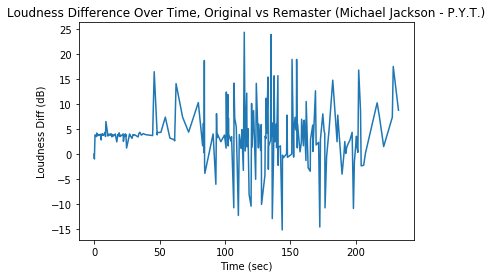

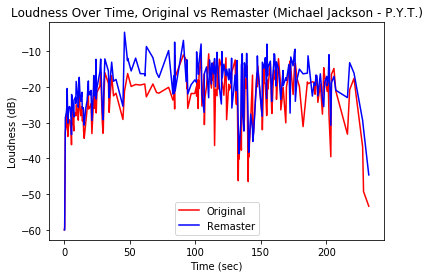

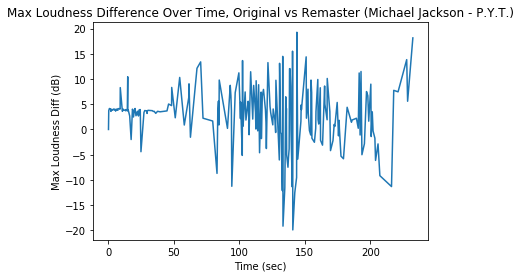

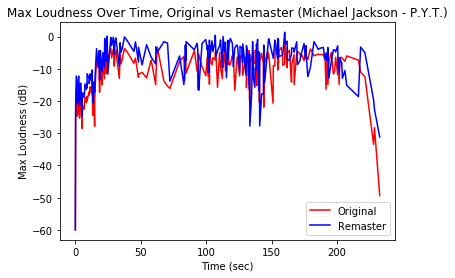

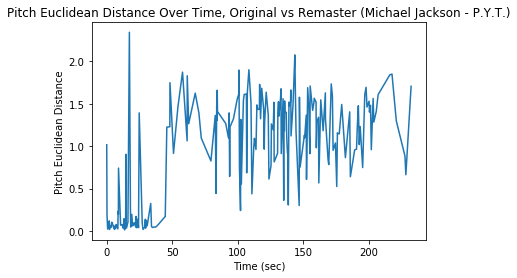

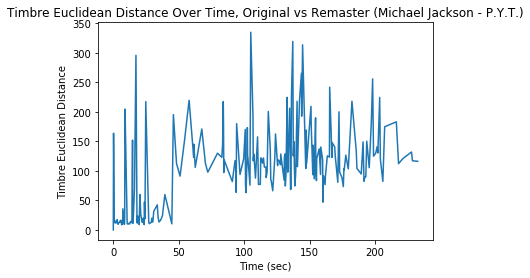

In [45]:
df_graphs(mj_df, "Michael Jackson - P.Y.T.")

In [46]:
oasis_df = pd.read_csv(clean_data_songs + 'oasis_analysis_clean.csv')
oasis_df = oasis_df.drop(columns=['Unnamed: 0'])
oasis_df['song_title'] = 'Wonderwall'
oasis_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        4.3           0.3         -20.896             -22.005   
1        4.6           0.2         -21.776             -25.137   
2        7.1           0.2         -22.880             -20.593   
3        7.3           0.3         -24.951             -18.215   
4        8.4           0.1         -23.591             -21.036   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -1.109       -16.943           -16.382          0.561   
1           -3.361       -15.471           -18.447         -2.976   
2            2.287       -16.862           -15.382          1.480   
3            6.736       -15.136           -16.424         -1.288   
4            2.555       -21.002           -15.040          5.962   

                                             pitches  \
0  [0.078, 0.337, 0.077, 0.08, 1.0, 0.078, 0.083,...   
1  [0.068, 0.035, 0.012, 0.146, 1.0, 0.284, 0.191...   
2  [0.163, 0.048, 0.026, 0.042, 0.144, 0.158, 1.0...   
3  [0.012, 0.304, 0.031, 0.01, 0.069, 0.052, 1.0,...   
4  [0.174, 1.0, 0.28, 0.04, 0.527, 0.42, 0.717, 0...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.094, 0.058, 0.028, 0.051, 0.161, 0.083, 0.9...         1.372864   
1  [0.223, 0.081, 0.06, 0.061, 0.164, 0.152, 1.0,...         1.324107   
2  [0.039, 0.243, 0.058, 0.049, 0.256, 0.116, 0.2...         1.336394   
3  [0.008, 0.375, 0.026, 0.005, 0.081, 0.012, 0.0...         1.305086   
4  [0.446, 0.156, 0.084, 0.223, 1.0, 0.608, 0.664...         1.464228   

                                              timbre  \
0  [40.781, 22.683, -20.256, -20.821, 26.613, -33...   
1  [42.982, 32.847, -23.294, -25.039, 31.018, -31...   
2  [39.383, 6.682, -24.371, -26.971, 21.058, -9.8...   
3  [40.472, 7.27, -39.63, 35.951, 6.786, -37.389,...   
4  [38.302, 15.266, 41.947, -9.437, 3.257, -38.58...   

                                          rem_timbre  timbre_eucl_dist  \
0  [40.09, 6.771, -41.815, 2.47, 32.496, -18.369,...         55.799162   
1  [38.042, 15.26, -11.913, -39.342, 15.808, -8.5...         62.065914   
2  [42.888, 55.801, 1.704, -10.575, 11.046, -21.3...         76.130312   
3  [40.788, 12.685, -19.583, 28.971, -16.337, -36...         68.231414   
4  [42.071, 43.72, -29.347, -13.664, 29.25, -17.6...         85.978530   

   song_title  
0  Wonderwall  
1  Wonderwall  
2  Wonderwall  
3  Wonderwall  
4  Wonderwall

In [47]:
df_means(oasis_df)

loudness mean: -0.1245283018867924
 loudness max mean: -0.32293396226415094
 pitch eucl dist mean: 1.3273324540335179
 timbre eucl dist mean: 86.29263072796505


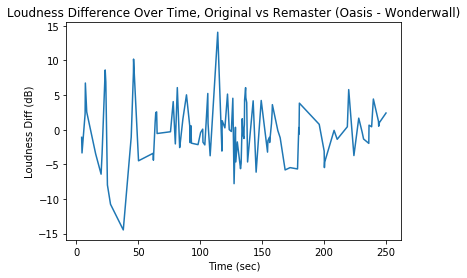

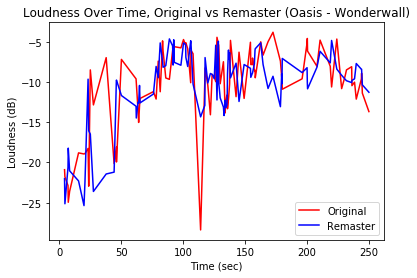

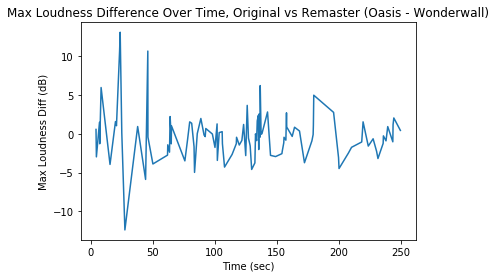

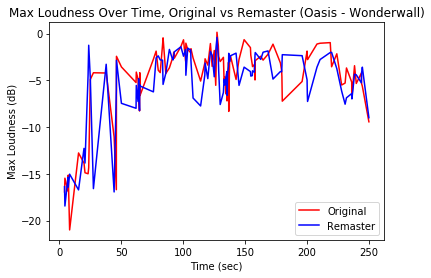

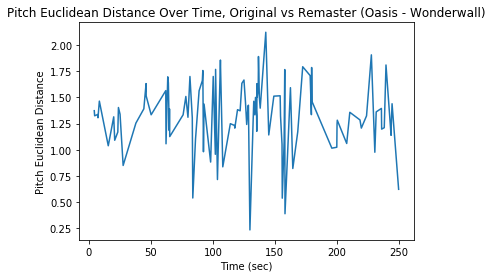

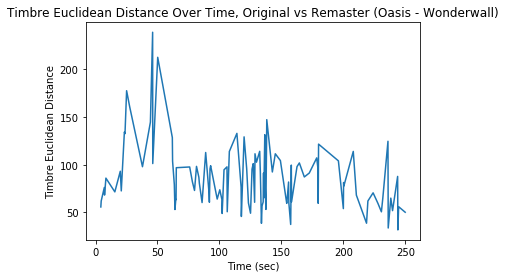

In [48]:
df_graphs(oasis_df, "Oasis - Wonderwall")

In [49]:
postal_df = pd.read_csv(clean_data_songs + 'postal_analysis_clean.csv')
postal_df = postal_df.drop(columns=['Unnamed: 0'])
postal_df['song_title'] = 'Such Great Heights'
postal_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.0           0.2         -60.000             -60.000   
1        0.2           0.2         -60.000             -60.000   
2        0.4           0.2         -34.463             -33.405   
3        0.6           0.2         -40.735             -40.847   
4        0.7           0.2         -35.507             -34.913   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0            0.000       -60.000           -60.000          0.000   
1            0.000       -21.996           -21.263          0.733   
2            1.058       -20.918           -21.035         -0.117   
3           -0.112       -22.197           -21.148          1.049   
4            0.594       -21.695           -20.903          0.792   

                                             pitches  \
0  [0.706, 1.0, 0.367, 0.213, 0.262, 0.355, 0.291...   
1  [0.219, 0.018, 0.009, 0.01, 0.032, 1.0, 0.048,...   
2  [1.0, 0.163, 0.089, 0.102, 0.102, 0.12, 0.074,...   
3  [0.422, 0.18, 0.126, 0.138, 0.187, 1.0, 0.171,...   
4  [0.105, 0.052, 0.039, 0.035, 0.072, 1.0, 0.073...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.503, 0.276, 0.23, 0.175, 0.42, 0.606, 0.578...         0.931194   
1  [0.19, 0.007, 0.002, 0.003, 0.026, 1.0, 0.052,...         0.033630   
2  [1.0, 0.184, 0.113, 0.122, 0.097, 0.116, 0.103...         0.057044   
3  [0.458, 0.16, 0.118, 0.13, 0.197, 1.0, 0.193, ...         0.053047   
4  [0.083, 0.054, 0.043, 0.041, 0.075, 1.0, 0.068...         0.025710   

                                              timbre  \
0  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...   
1  [31.337, -154.536, -44.55, 43.603, 50.239, -70...   
2  [31.033, -147.325, -26.896, 75.841, 87.956, -8...   
3  [31.167, -151.737, -42.605, 45.934, 49.457, -7...   
4  [30.347, -154.091, -69.592, 59.173, 57.476, -8...   

                                          rem_timbre  timbre_eucl_dist  \
0  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...          0.000000   
1  [32.007, -175.574, -38.839, 36.034, 58.541, -8...         30.209480   
2  [31.261, -161.056, -26.799, 77.478, 98.963, -8...         21.435484   
3  [31.742, -169.055, -36.344, 44.846, 58.772, -8...         27.104299   
4  [31.277, -167.51, -81.275, 66.537, 67.188, -76...         25.371096   

           song_title  
0  Such Great Heights  
1  Such Great Heights  
2  Such Great Heights  
3  Such Great Heights  
4  Such Great Heights

In [50]:
df_means(postal_df)

loudness mean: 0.7826259615384612
 loudness max mean: 0.7588019230769226
 pitch eucl dist mean: 0.21232955580099994
 timbre eucl dist mean: 25.821862903434408


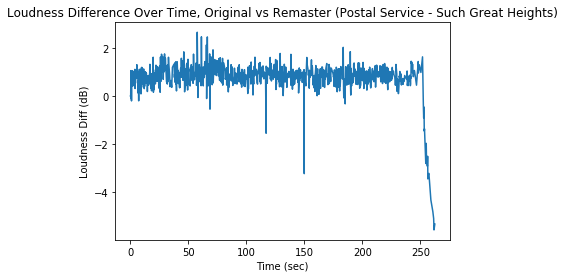

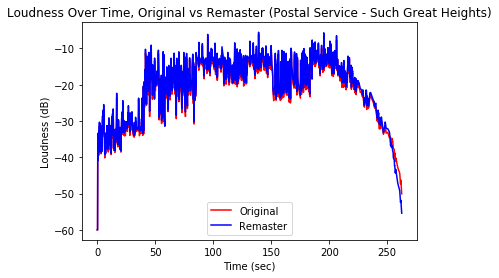

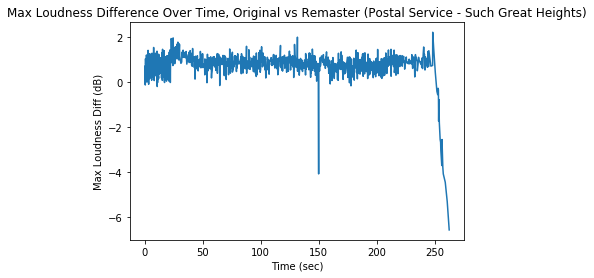

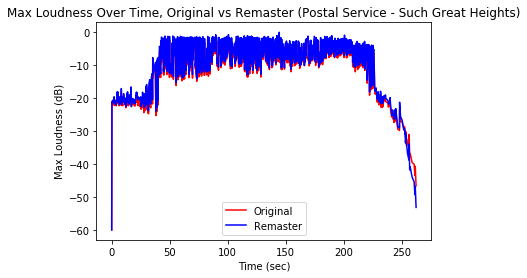

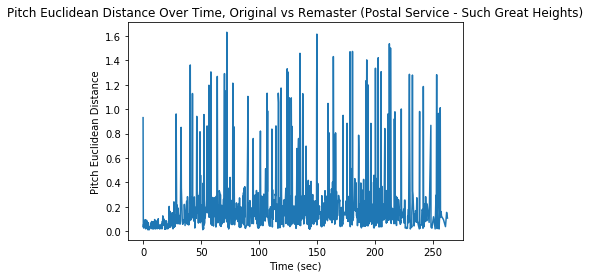

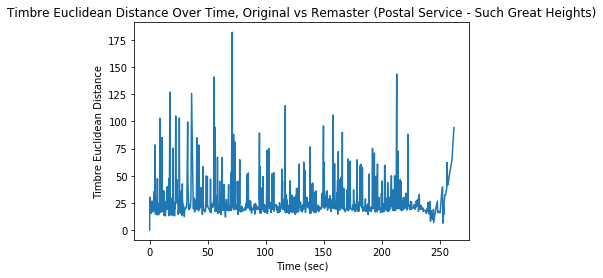

In [51]:
df_graphs(postal_df, "Postal Service - Such Great Heights")

In [52]:
santana_df = pd.read_csv(clean_data_songs + 'santana_analysis_clean.csv')
santana_df = santana_df.drop(columns=['Unnamed: 0'])
santana_df['song_title'] = 'Smooth'
santana_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.0           0.2         -60.000             -60.000   
1        0.2           0.2         -60.000             -60.000   
2        0.4           0.4         -14.516             -14.516   
3        0.7           0.5         -33.542             -33.542   
4        1.2           0.2         -37.998             -37.998   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0              0.0       -60.000           -60.000            0.0   
1              0.0        -2.149            -2.149            0.0   
2              0.0        -4.397            -4.397            0.0   
3              0.0        -2.295            -2.295            0.0   
4              0.0        -4.451            -4.451            0.0   

                                             pitches  \
0  [0.999, 1.0, 0.34, 0.287, 0.25, 0.253, 0.258, ...   
1  [0.28, 0.265, 0.221, 0.16, 0.104, 0.126, 0.27,...   
2  [0.065, 0.12, 0.14, 0.029, 0.155, 1.0, 0.364, ...   
3  [0.047, 0.077, 0.048, 0.026, 0.263, 1.0, 0.55,...   
4  [0.262, 0.658, 0.575, 0.232, 0.326, 0.292, 0.3...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.999, 1.0, 0.34, 0.287, 0.25, 0.253, 0.258, ...              0.0   
1  [0.28, 0.265, 0.221, 0.16, 0.104, 0.126, 0.27,...              0.0   
2  [0.065, 0.12, 0.14, 0.029, 0.155, 1.0, 0.364, ...              0.0   
3  [0.047, 0.077, 0.048, 0.026, 0.263, 1.0, 0.55,...              0.0   
4  [0.262, 0.658, 0.575, 0.232, 0.326, 0.292, 0.3...              0.0   

                                              timbre  \
0  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...   
1  [34.88, 44.334, 64.218, -311.472, 87.911, 272....   
2  [45.986, -31.48, -103.825, 121.485, 27.029, -1...   
3  [46.0, -14.77, -104.419, 191.109, 23.377, -6.7...   
4  [48.371, 10.881, -84.098, 14.829, 32.001, 49.0...   

                                          rem_timbre  timbre_eucl_dist  \
0  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...               0.0   
1  [34.88, 44.334, 64.218, -311.472, 87.911, 272....               0.0   
2  [45.986, -31.48, -103.825, 121.485, 27.029, -1...               0.0   
3  [46.0, -14.77, -104.419, 191.109, 23.377, -6.7...               0.0   
4  [48.371, 10.881, -84.098, 14.829, 32.001, 49.0...               0.0   

  song_title  
0     Smooth  
1     Smooth  
2     Smooth  
3     Smooth  
4     Smooth

In [53]:
df_means(santana_df)

loudness mean: 0.0
 loudness max mean: 0.0
 pitch eucl dist mean: 0.0
 timbre eucl dist mean: 0.0


In [54]:
sinatra_df = pd.read_csv(clean_data_songs + 'sinatra_analysis_clean.csv')
sinatra_df = sinatra_df.drop(columns=['Unnamed: 0'])
sinatra_df['song_title'] = 'Come Fly With Me'
sinatra_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        4.2           0.1         -21.456             -19.071   
1        9.5           0.2         -23.107             -14.369   
2        9.7           0.2         -27.022             -18.373   
3       14.3           0.2         -28.865             -24.788   
4       14.5           0.3         -18.497             -10.287   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0            2.385       -16.149           -10.525          5.624   
1            8.738       -12.171            -6.280          5.891   
2            8.649       -22.033           -14.536          7.497   
3            4.077       -17.350            -9.046          8.304   
4            8.210       -14.292            -5.943          8.349   

                                             pitches  \
0  [0.125, 0.111, 0.597, 1.0, 0.571, 0.152, 0.187...   
1  [0.783, 0.682, 0.157, 0.071, 0.111, 0.209, 0.4...   
2  [0.558, 0.111, 0.084, 0.119, 0.042, 0.102, 0.1...   
3  [0.369, 0.248, 0.465, 0.837, 0.998, 0.333, 0.2...   
4  [0.324, 0.604, 0.325, 0.401, 0.489, 0.513, 0.9...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.092, 0.161, 1.0, 0.7, 0.128, 0.072, 0.075, ...         0.857608   
1  [1.0, 0.647, 0.154, 0.075, 0.083, 0.159, 0.545...         0.353296   
2  [0.382, 0.15, 0.054, 0.132, 0.038, 0.063, 0.22...         0.511718   
3  [0.489, 0.366, 0.663, 0.751, 0.895, 0.79, 0.24...         1.000800   
4  [0.284, 0.589, 0.303, 0.225, 0.332, 0.232, 0.6...         0.685045   

                                              timbre  \
0  [41.682, 155.098, 112.351, -25.276, 30.497, -1...   
1  [43.764, -5.575, 48.771, 50.505, 8.497, 8.619,...   
2  [35.377, 39.277, -11.88, -1.497, 60.884, -22.6...   
3  [36.782, 54.954, 50.184, -113.666, -31.662, 4....   
4  [40.287, 38.189, -7.369, 70.367, -35.737, 0.46...   

                                          rem_timbre  timbre_eucl_dist  \
0  [47.116, 145.434, 69.567, -38.753, 36.082, -15...         67.693938   
1  [51.127, 19.414, 43.605, 38.723, 5.38, -12.5, ...         40.003903   
2  [43.487, 105.016, 4.301, -1.963, 47.645, -32.0...         76.872223   
3  [45.211, 32.468, 39.676, -100.398, -18.309, 22...         60.238668   
4  [48.328, 56.83, 1.212, 57.815, -30.33, -7.427,...         34.743090   

         song_title  
0  Come Fly With Me  
1  Come Fly With Me  
2  Come Fly With Me  
3  Come Fly With Me  
4  Come Fly With Me

In [55]:
df_means(sinatra_df)

loudness mean: 4.903986486486489
 loudness max mean: 4.370554054054054
 pitch eucl dist mean: 0.6391751906893992
 timbre eucl dist mean: 63.49444137847862


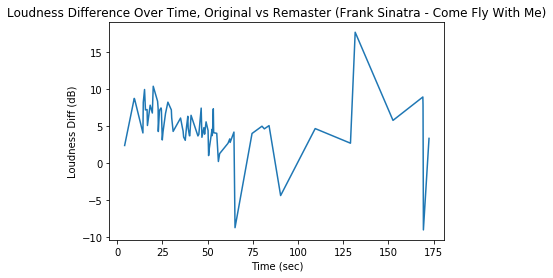

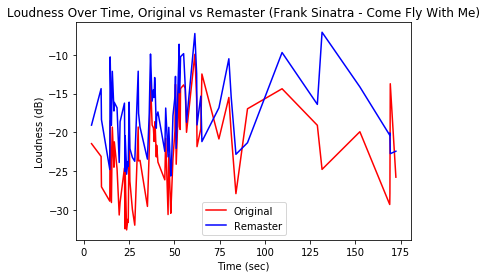

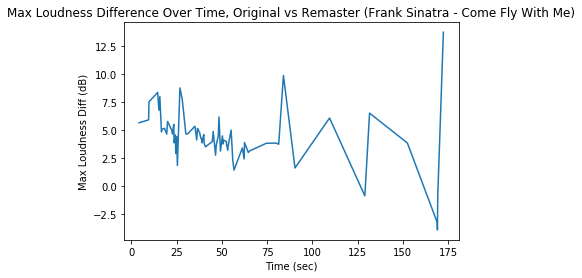

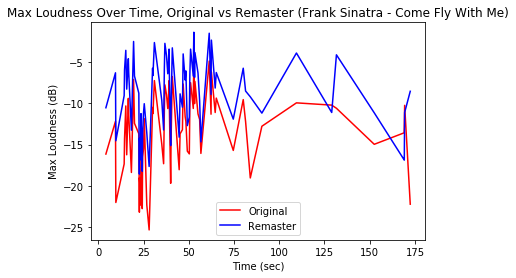

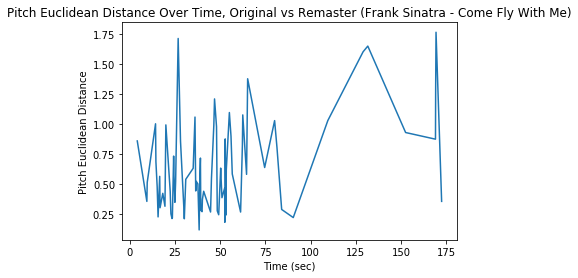

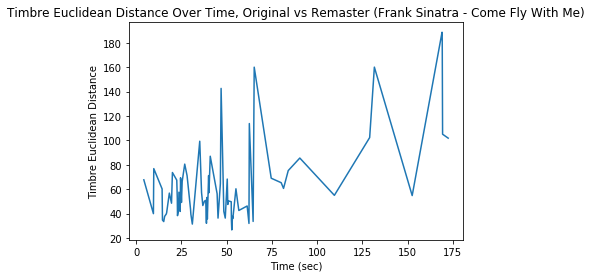

In [56]:
df_graphs(sinatra_df, "Frank Sinatra - Come Fly With Me")

In [57]:
talking_heads_df = pd.read_csv(clean_data_songs + 'talking_heads_analysis_clean.csv')
talking_heads_df = talking_heads_df.drop(columns=['Unnamed: 0'])
talking_heads_df['song_title'] = 'Psycho Killer'
talking_heads_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0       20.5           0.2         -25.729             -29.696   
1       22.2           0.3         -37.398             -20.478   
2       23.9           0.3         -21.416             -12.346   
3       26.6           0.1         -31.146             -20.018   
4       31.6           0.5         -27.352             -22.171   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -3.967       -16.830           -17.552         -0.722   
1           16.920       -18.216            -9.168          9.048   
2            9.070        -7.144            -9.807         -2.663   
3           11.128       -23.406           -16.597          6.809   
4            5.181        -9.076            -4.503          4.573   

                                             pitches  \
0  [0.102, 0.161, 0.135, 0.112, 0.688, 0.114, 0.0...   
1  [0.177, 0.203, 0.107, 0.116, 0.987, 0.136, 0.0...   
2  [0.155, 0.151, 0.641, 0.15, 0.086, 0.194, 0.36...   
3  [0.267, 0.19, 0.068, 0.078, 0.291, 0.129, 0.25...   
4  [0.07, 0.085, 0.368, 0.102, 0.084, 0.135, 0.13...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.134, 0.153, 0.301, 0.111, 0.394, 0.052, 0.0...         0.386621   
1  [0.252, 0.308, 0.279, 0.232, 0.765, 0.187, 0.1...         0.374844   
2  [0.02, 0.021, 0.321, 0.042, 0.029, 0.034, 0.12...         0.539087   
3  [0.226, 0.138, 0.067, 0.082, 0.236, 0.232, 0.2...         0.862074   
4  [0.023, 0.035, 0.329, 0.05, 0.033, 0.053, 0.08...         0.159455   

                                              timbre  \
0  [35.648, -35.678, -88.793, 66.222, -48.45, -40...   
1  [38.56, 80.123, 38.217, 33.207, 4.936, 4.584, ...   
2  [46.246, 81.202, -66.48, -4.292, -1.207, -16.6...   
3  [35.728, 67.827, 18.492, -26.544, 21.239, -28....   
4  [39.576, 51.573, -23.305, -94.988, 3.592, 37.5...   

                                          rem_timbre  timbre_eucl_dist  \
0  [37.717, 64.298, -9.016, 66.519, -0.94, -7.545...        146.196254   
1  [45.185, 53.055, -17.24, -19.895, -17.811, 20....         91.634234   
2  [48.169, 124.808, -51.791, -37.639, 2.41, -31....         85.175210   
3  [41.151, 51.502, 45.865, -5.907, 4.69, -15.646...         64.118640   
4  [50.128, 53.594, -20.215, 34.784, -24.863, -18...        154.575534   

      song_title  
0  Psycho Killer  
1  Psycho Killer  
2  Psycho Killer  
3  Psycho Killer  
4  Psycho Killer

In [58]:
df_means(talking_heads_df)

loudness mean: 3.932635897435899
 loudness max mean: 3.9844410256410216
 pitch eucl dist mean: 0.4007881433382724
 timbre eucl dist mean: 42.802202149907394


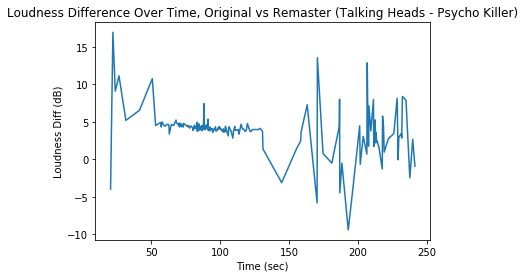

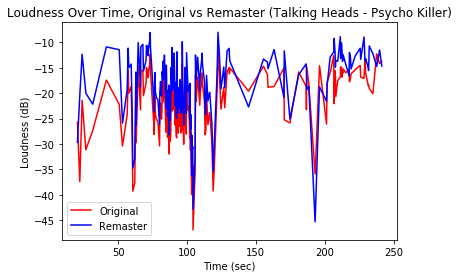

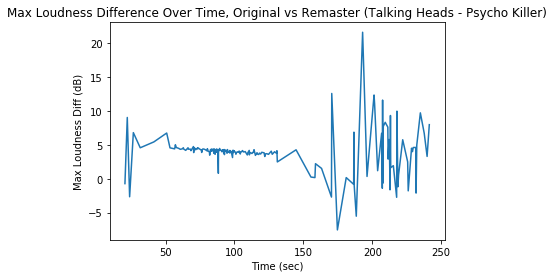

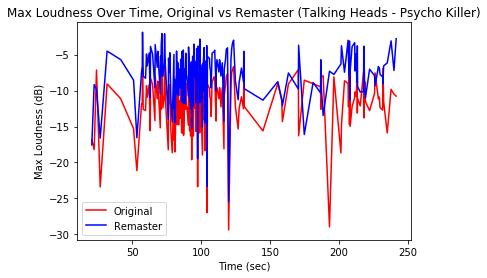

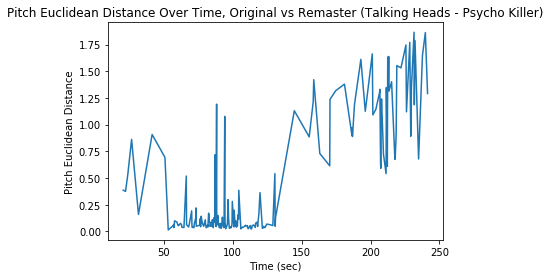

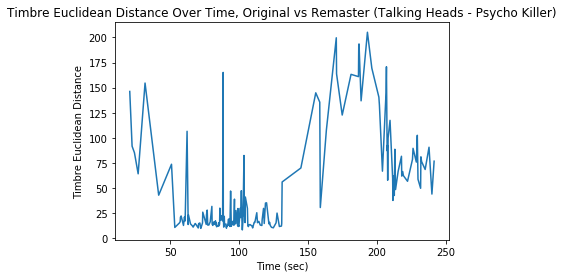

In [59]:
df_graphs(talking_heads_df, "Talking Heads - Psycho Killer")

In [60]:
zeppelin_df = pd.read_csv(clean_data_songs + 'zeppelin_analysis_clean.csv')
zeppelin_df = zeppelin_df.drop(columns=['Unnamed: 0'])
zeppelin_df['song_title'] = 'Immigrant Song'
zeppelin_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.0           0.4         -60.000             -60.000   
1        0.4           0.2         -38.850             -38.850   
2        0.7           0.2         -35.399             -35.399   
3        0.8           0.2         -35.348             -35.348   
4        1.0           0.2         -34.193             -34.193   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0              0.0       -31.898           -31.898            0.0   
1              0.0       -23.964           -23.964            0.0   
2              0.0       -32.412           -32.412            0.0   
3              0.0       -24.063           -24.063            0.0   
4              0.0       -30.465           -30.465            0.0   

                                             pitches  \
0  [0.173, 0.187, 0.199, 0.226, 0.113, 0.176, 0.3...   
1  [0.578, 0.937, 0.251, 0.313, 0.307, 0.423, 0.2...   
2  [0.137, 0.327, 0.229, 0.218, 0.553, 0.533, 0.9...   
3  [0.85, 1.0, 0.759, 0.811, 0.57, 0.487, 0.446, ...   
4  [0.699, 1.0, 0.605, 0.384, 0.224, 0.124, 0.102...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.173, 0.187, 0.199, 0.226, 0.113, 0.176, 0.3...              0.0   
1  [0.578, 0.937, 0.251, 0.313, 0.307, 0.423, 0.2...              0.0   
2  [0.137, 0.327, 0.229, 0.218, 0.553, 0.533, 0.9...              0.0   
3  [0.85, 1.0, 0.759, 0.811, 0.57, 0.487, 0.446, ...              0.0   
4  [0.699, 1.0, 0.605, 0.384, 0.224, 0.124, 0.102...              0.0   

                                              timbre  \
0  [17.743, 81.022, -42.639, -117.776, 2.829, 86....   
1  [25.497, 92.761, -72.205, -64.324, 1.406, 4.35...   
2  [26.021, 58.383, -79.838, -46.711, -1.683, -60...   
3  [27.642, 80.922, -71.703, -74.065, 12.241, -14...   
4  [27.225, 89.321, -106.694, -69.278, 14.931, -3...   

                                          rem_timbre  timbre_eucl_dist  \
0  [17.743, 81.022, -42.639, -117.776, 2.829, 86....               0.0   
1  [25.497, 92.761, -72.205, -64.324, 1.406, 4.35...               0.0   
2  [26.021, 58.383, -79.838, -46.711, -1.683, -60...               0.0   
3  [27.642, 80.922, -71.703, -74.065, 12.241, -14...               0.0   
4  [27.225, 89.321, -106.694, -69.278, 14.931, -3...               0.0   

       song_title  
0  Immigrant Song  
1  Immigrant Song  
2  Immigrant Song  
3  Immigrant Song  
4  Immigrant Song

In [61]:
df_means(zeppelin_df)

loudness mean: 0.0
 loudness max mean: 0.0
 pitch eucl dist mean: 0.0
 timbre eucl dist mean: 0.0


In [62]:
curtis_df = pd.read_csv(clean_data_songs + 'curtis_analysis_clean.csv')
curtis_df = curtis_df.drop(columns=['Unnamed: 0'])
curtis_df['song_title'] = "Christmas Rappin'"
curtis_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.0           0.3         -60.000             -60.000   
1        0.3           0.3         -41.992             -60.000   
2        0.6           0.1         -39.848             -42.349   
3        0.7           0.4         -31.699             -33.737   
4        1.1           0.1         -48.790             -49.723   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0            0.000       -41.977           -60.000        -18.023   
1          -18.008       -15.859           -18.378         -2.519   
2           -2.501       -23.958           -26.289         -2.331   
3           -2.038       -17.368           -19.675         -2.307   
4           -0.933       -31.651           -33.793         -2.142   

                                             pitches  \
0  [0.94, 0.829, 0.668, 0.43, 0.335, 0.274, 0.154...   
1  [0.093, 0.27, 0.383, 1.0, 0.432, 0.046, 0.069,...   
2  [0.036, 0.256, 1.0, 0.498, 0.102, 0.055, 0.053...   
3  [0.158, 0.138, 0.166, 0.312, 0.333, 0.237, 0.3...   
4  [0.317, 0.397, 0.512, 0.889, 0.979, 1.0, 0.559...   

                                         rem_pitches  pitch_eucl_dist  \
0  [1.0, 0.976, 0.233, 0.179, 0.165, 0.153, 0.123...         0.980910   
1  [0.191, 0.391, 0.514, 1.0, 0.319, 0.042, 0.064...         0.245194   
2  [0.034, 0.318, 1.0, 0.417, 0.08, 0.048, 0.047,...         0.117864   
3  [0.133, 0.116, 0.147, 0.271, 0.271, 0.212, 0.2...         0.143997   
4  [0.311, 0.399, 0.535, 0.934, 1.0, 0.926, 0.511...         0.107163   

                                              timbre  \
0  [1.017, 169.44, 15.74, -57.021, 48.038, -62.36...   
1  [29.596, -32.66, 25.378, -145.828, 53.822, 31....   
2  [31.097, -41.13, -15.431, -27.301, 11.304, 39....   
3  [33.898, 8.179, 0.698, 105.702, 34.994, -12.65...   
4  [21.797, -6.614, -46.551, -3.91, 16.115, 40.78...   

                                          rem_timbre  timbre_eucl_dist  \
0  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...         41.451196   
1  [22.293, 48.87, 44.79, -182.934, 29.739, 72.86...        161.595579   
2  [29.039, -49.61, -27.815, -32.654, 9.942, 35.5...         17.755872   
3  [32.015, 3.841, -8.079, 95.057, 29.347, -13.87...         16.079665   
4  [19.689, -9.049, -50.73, -16.173, 9.608, 40.96...         16.310940   

          song_title  
0  Christmas Rappin'  
1  Christmas Rappin'  
2  Christmas Rappin'  
3  Christmas Rappin'  
4  Christmas Rappin'

In [63]:
df_means(curtis_df)

loudness mean: -1.532085858585859
 loudness max mean: -2.938469696969699
 pitch eucl dist mean: 1.131355707014295
 timbre eucl dist mean: 123.18860006153402


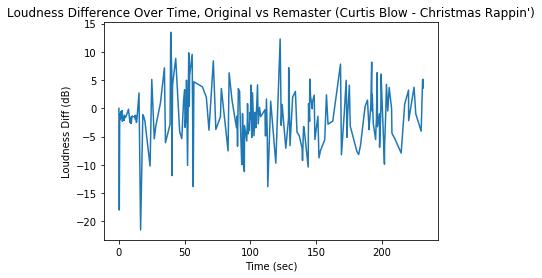

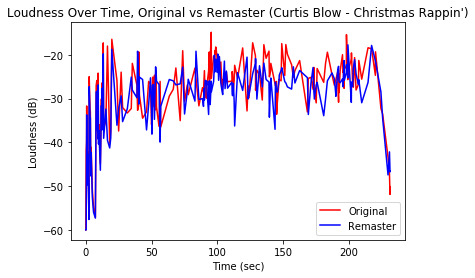

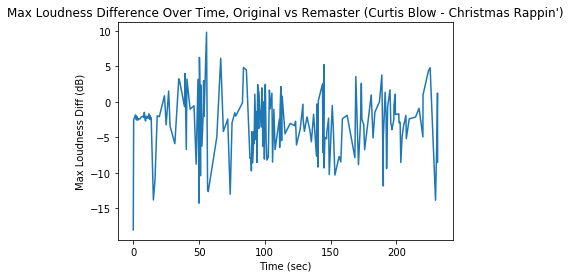

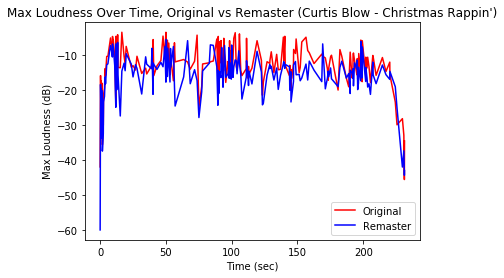

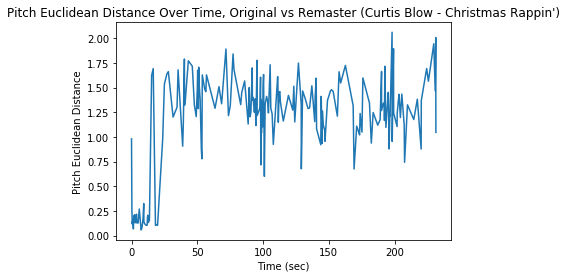

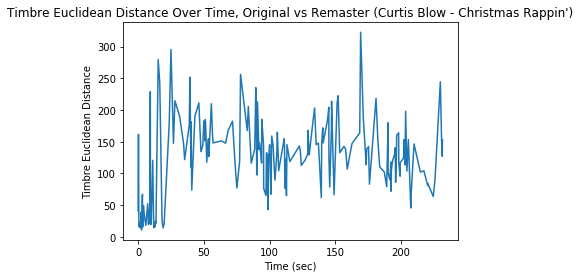

In [64]:
df_graphs(curtis_df, "Curtis Blow - Christmas Rappin'")

In [65]:
stones_df = pd.read_csv(clean_data_songs + 'stones_analysis_clean.csv')
stones_df = stones_df.drop(columns=['Unnamed: 0'])
stones_df['song_title'] = "Wild Horses"
stones_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        6.4           0.2         -23.706             -26.614   
1        7.6           0.2         -20.012             -15.147   
2       11.7           0.2         -21.082             -20.238   
3       14.2           0.2         -24.839             -23.212   
4       14.4           0.2         -21.150             -21.803   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -2.908       -17.007           -14.431          2.576   
1            4.865       -13.628           -11.468          2.160   
2            0.844       -17.588           -12.981          4.607   
3            1.627       -17.571           -16.800          0.771   
4           -0.653       -13.581           -14.527         -0.946   

                                             pitches  \
0  [0.346, 0.193, 1.0, 0.092, 0.213, 0.133, 0.277...   
1  [0.078, 0.047, 0.262, 0.174, 1.0, 0.058, 0.075...   
2  [0.132, 0.274, 0.804, 0.232, 0.108, 0.486, 0.8...   
3  [0.526, 0.295, 1.0, 0.056, 0.249, 0.061, 0.173...   
4  [0.351, 0.094, 0.347, 0.056, 0.176, 0.231, 0.3...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.106, 0.114, 1.0, 0.051, 0.333, 0.026, 0.101...         0.415604   
1  [0.051, 0.257, 1.0, 0.05, 0.143, 0.049, 0.089,...         1.223972   
2  [0.045, 0.108, 0.592, 0.211, 0.089, 0.54, 0.81...         0.355941   
3  [0.625, 0.165, 1.0, 0.06, 0.248, 0.061, 0.117,...         0.370181   
4  [0.495, 0.276, 1.0, 0.067, 0.238, 0.064, 0.197...         1.466139   

                                              timbre  \
0  [41.067, 1.667, 56.174, 7.197, 33.591, -24.331...   
1  [43.866, -7.594, 9.573, 12.844, -2.665, -37.57...   
2  [40.227, 65.733, 72.646, -8.396, -7.669, -17.9...   
3  [40.256, 73.453, 77.379, 4.893, 58.744, -23.46...   
4  [44.397, 41.237, 28.177, -0.221, -5.199, -18.4...   

                                          rem_timbre  timbre_eucl_dist  \
0  [42.35, 30.425, 87.914, 26.297, 60.251, -10.08...         60.140569   
1  [46.84, 13.898, 25.873, -3.845, -6.662, -34.10...         45.148713   
2  [45.147, 106.64, 48.933, 8.773, -9.525, -27.98...         65.322176   
3  [40.348, 58.859, 58.784, -13.412, 48.834, -5.4...         40.910988   
4  [43.346, 94.725, 80.786, 3.73, 61.05, -18.751,...        104.136155   

    song_title  
0  Wild Horses  
1  Wild Horses  
2  Wild Horses  
3  Wild Horses  
4  Wild Horses

In [66]:
df_means(stones_df)

loudness mean: 3.12710824742268
 loudness max mean: 2.8966391752577314
 pitch eucl dist mean: 0.22860376460311607
 timbre eucl dist mean: 33.76437689567138


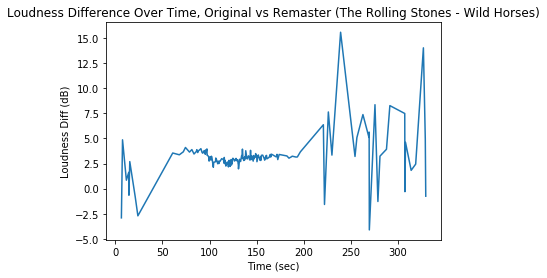

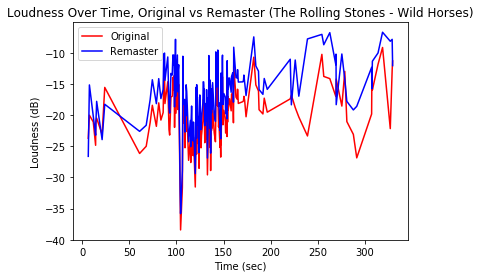

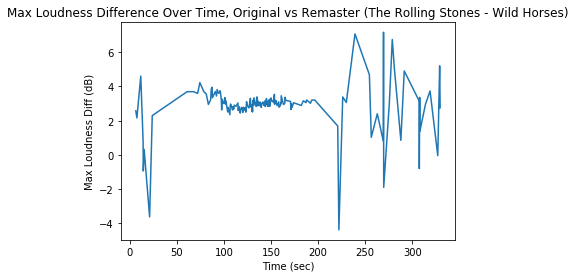

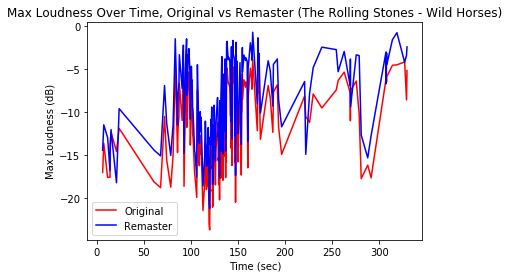

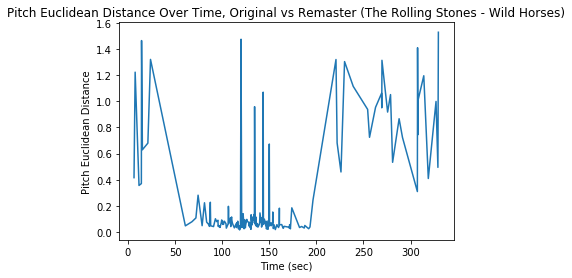

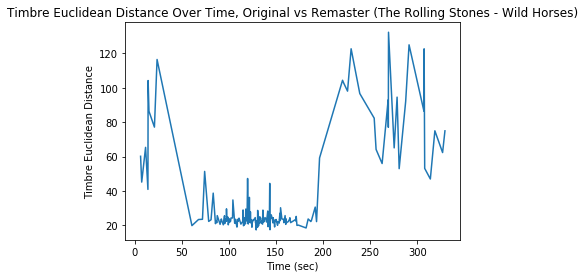

In [67]:
df_graphs(stones_df, "The Rolling Stones - Wild Horses")

In [68]:
yell_mag_df = pd.read_csv(clean_data_songs + 'yell_mag_analysis_clean.csv')
yell_mag_df = yell_mag_df.drop(columns=['Unnamed: 0'])
yell_mag_df['song_title'] = "Firecracker"
yell_mag_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        0.0           0.2         -21.085             -18.824   
1        0.2           0.3         -30.234             -30.060   
2        0.5           0.2         -32.272             -31.791   
3        0.8           0.1         -31.537             -30.970   
4        1.1           0.1         -28.755             -26.885   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0            2.261       -10.639            -7.891          2.748   
1            0.174        -3.857            -2.545          1.312   
2            0.481        -3.107            -0.618          2.489   
3            0.567       -12.466           -12.122          0.344   
4            1.870        -8.890            -7.444          1.446   

                                             pitches  \
0  [0.42, 1.0, 0.299, 0.534, 0.41, 0.202, 0.215, ...   
1  [0.091, 0.078, 0.026, 0.041, 0.151, 0.091, 0.1...   
2  [0.375, 0.081, 0.042, 0.058, 0.047, 0.059, 0.1...   
3  [0.267, 0.312, 0.21, 0.563, 1.0, 0.345, 0.159,...   
4  [0.594, 1.0, 0.313, 0.178, 0.099, 0.12, 0.067,...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.358, 1.0, 0.508, 0.538, 0.349, 0.181, 0.248...         0.256733   
1  [0.104, 0.083, 0.028, 0.036, 0.142, 0.085, 0.1...         0.049910   
2  [0.396, 0.081, 0.04, 0.053, 0.044, 0.052, 0.10...         0.025652   
3  [0.341, 0.39, 0.249, 0.578, 1.0, 0.383, 0.21, ...         0.163162   
4  [0.589, 1.0, 0.298, 0.169, 0.095, 0.115, 0.056...         0.024249   

                                              timbre  \
0  [43.819, 45.836, -75.004, 32.053, -20.997, 23....   
1  [40.773, 114.341, -44.156, -61.226, -3.275, 62...   
2  [46.703, 151.416, -93.053, 106.314, 13.98, 18....   
3  [42.751, 108.719, 51.156, 63.053, 44.307, -22....   
4  [44.861, 64.907, -1.86, -40.53, -35.053, 63.93...   

                                          rem_timbre  timbre_eucl_dist  \
0  [45.262, 51.854, -36.688, 6.446, -12.351, 22.0...         60.093488   
1  [40.446, 110.522, -52.877, -90.571, -9.542, 64...         41.919187   
2  [48.044, 153.44, -97.304, 108.971, 17.919, 47....         32.230861   
3  [43.297, 114.255, 45.015, 58.432, 39.334, -11....         23.661138   
4  [45.862, 63.331, -8.633, -54.545, -38.254, 69....         20.988644   

    song_title  
0  Firecracker  
1  Firecracker  
2  Firecracker  
3  Firecracker  
4  Firecracker

In [69]:
df_means(yell_mag_df)

loudness mean: 0.32143834080717504
 loudness max mean: 1.4718733183856498
 pitch eucl dist mean: 0.2000348423674874
 timbre eucl dist mean: 25.11816166879044


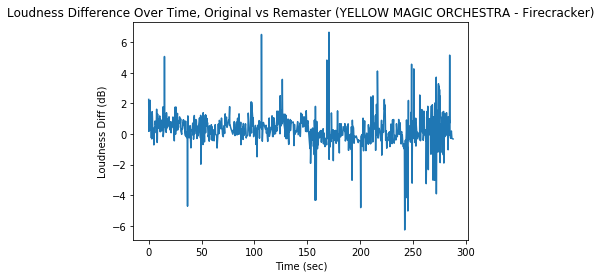

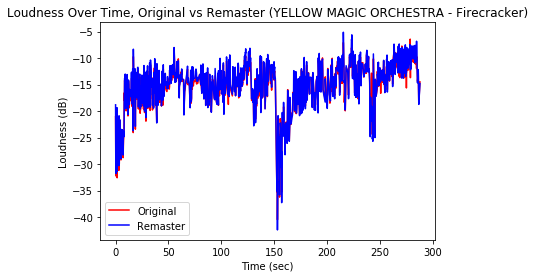

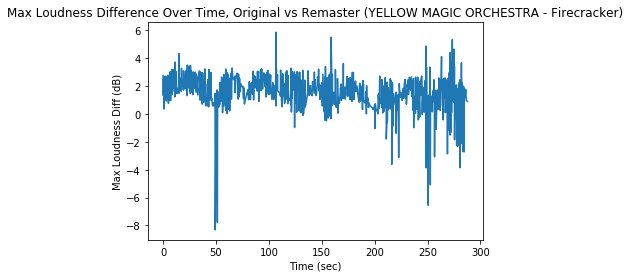

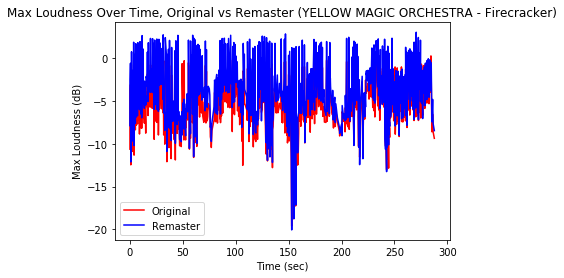

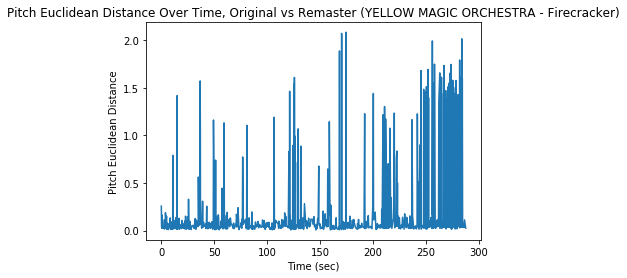

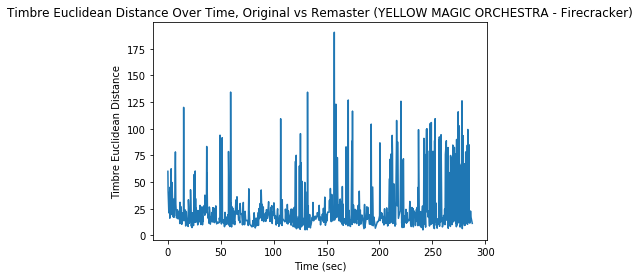

In [70]:
df_graphs(yell_mag_df, "YELLOW MAGIC ORCHESTRA - Firecracker")

In [71]:
all_songs_df = pd.concat([aretha_df, beastie_df, clash_df, euryth_df, ice_cube_df, interpol_df, mb20_df, nin_df, notor_big_df, queen_df, hootie_df, maze_df, mj_df, oasis_df, postal_df, sinatra_df, talking_heads_df, curtis_df, stones_df, yell_mag_df])

In [72]:
all_songs_df.head()

start_rnd  duration_rnd  loudness_start  rem_loudness_start  \
0        1.1           0.2         -10.277             -10.980   
1       11.8           0.3         -30.230             -19.958   
2       16.9           0.2          -8.496             -11.252   
3       26.5           0.4         -23.003             -16.909   
4       35.3           0.2         -22.807             -10.488   

   loud_start_diff  loudness_max  rem_loudness_max  loud_max_diff  \
0           -0.703        -3.296            -7.765         -4.469   
1           10.272        -3.787            -4.466         -0.679   
2           -2.756        -3.743            -5.642         -1.899   
3            6.094        -2.039            -3.838         -1.799   
4           12.319       -19.153            -5.100         14.053   

                                             pitches  \
0  [1.0, 0.372, 0.21, 0.083, 0.179, 0.099, 0.15, ...   
1  [0.18, 0.073, 0.055, 0.038, 0.182, 0.093, 0.10...   
2  [0.651, 0.602, 1.0, 0.326, 0.095, 0.166, 0.204...   
3  [1.0, 0.159, 0.058, 0.024, 0.063, 0.059, 0.055...   
4  [0.589, 0.572, 0.501, 0.667, 1.0, 0.483, 0.123...   

                                         rem_pitches  pitch_eucl_dist  \
0  [0.592, 0.168, 0.202, 0.329, 1.0, 0.24, 0.119,...         1.043580   
1  [1.0, 0.47, 0.22, 0.159, 0.122, 0.109, 0.075, ...         1.485826   
2  [0.357, 0.48, 0.377, 0.19, 0.355, 1.0, 0.446, ...         1.184731   
3  [0.228, 0.442, 0.69, 0.345, 0.315, 0.319, 0.44...         1.572021   
4  [0.115, 0.175, 0.227, 0.177, 0.048, 0.059, 0.2...         1.557303   

                                              timbre  \
0  [54.154, 81.213, 36.362, 4.029, -7.159, -13.59...   
1  [48.054, 43.87, -59.926, 107.773, -19.904, -12...   
2  [51.667, 56.651, 52.495, 78.093, 13.981, 13.52...   
3  [46.197, 57.776, 2.359, -14.944, 31.355, 61.60...   
4  [39.551, -5.897, -15.692, -36.998, -0.268, -25...   

                                          rem_timbre  timbre_eucl_dist  \
0  [51.401, 118.269, 31.017, -33.129, 14.272, -35...         72.449235   
1  [52.771, 80.377, 46.676, 2.36, -33.527, 13.814...        176.769274   
2  [50.298, 63.888, -8.144, 50.348, -28.977, 1.07...        105.260583   
3  [51.455, 70.437, 31.236, -12.336, 11.77, 17.15...         98.092696   
4  [52.733, 67.814, 38.196, 21.107, -10.057, -11....        121.127687   

  song_title  
0    Respect  
1    Respect  
2    Respect  
3    Respect  
4    Respect

In [73]:
ogmean = all_songs_df['loudness_start'].mean()
remmean = all_songs_df['rem_loudness_start'].mean()
stdev = statistics.stdev(all_songs_df['loudness_start'])
loudness_es = (remmean - ogmean) / stdev
loudness_es

0.14004604556779404

In [74]:
ogmean = all_songs_df['loudness_max'].mean()
remmean = all_songs_df['rem_loudness_max'].mean()
stdev = statistics.stdev(all_songs_df['loudness_max'])
maxloudness_es = (remmean - ogmean) / stdev
maxloudness_es

0.20503727711800596

In [75]:
all_songs_group = all_songs_df.groupby('song_title').mean()
all_songs_group = all_songs_group.reset_index()
all_songs_group = all_songs_group[['song_title', 'loud_start_diff', 'loud_max_diff', 'pitch_eucl_dist', 'timbre_eucl_dist']]
all_songs_group

song_title  loud_start_diff  loud_max_diff  \
0        Another One Bites The Dust         7.022844       7.960178   
1                   Before I Let Go        -5.272641      -5.132000   
2                         Big Poppa        -0.391274      -0.732292   
3                   Ch-Check It Out        -0.218265       1.248513   
4                 Christmas Rappin'        -1.532086      -2.938470   
5                  Come Fly With Me         4.903986       4.370554   
6                       Firecracker         0.321438       1.471873   
7                  Head Like A Hole         8.113251       7.935740   
8                 It Was A Good Day         2.435591       2.256182   
9                    London Calling        -0.031173      -0.316113   
10           Only Wanna Be With You        -0.021325       0.009554   
11      P.Y.T. (Pretty Young Thing)         3.659477       2.896131   
12                              PDA         0.121783       0.103514   
13                    Psycho Killer         3.932636       3.984441   
14                          Respect         2.590089       0.268022   
15               Such Great Heights         0.782626       0.758802   
16  Sweet Dreams (Are Made of This)        -6.366063      -5.688825   
17                           Unwell        -0.163814      -0.082614   
18                      Wild Horses         3.127108       2.896639   
19                       Wonderwall        -0.124528      -0.322934   

    pitch_eucl_dist  timbre_eucl_dist  
0          0.514452         72.490276  
1          1.228305        144.455764  
2          1.201698        134.060492  
3          1.218316        128.936421  
4          1.131356        123.188600  
5          0.639175         63.494441  
6          0.200035         25.118162  
7          0.977739         92.331330  
8          1.341625        142.210861  
9          1.244102         88.152800  
10         0.992439         65.975277  
11         0.927292        101.693430  
12         0.073034          7.033960  
13         0.400788         42.802202  
14         1.292507        116.003966  
15         0.212330         25.821863  
16         1.087196        103.114126  
17         1.036645         93.796679  
18         0.228604         33.764377  
19         1.327332         86.292631

In [76]:
loud_mean = abs(all_songs_group['loud_start_diff'])
loud_mean = loud_mean.mean()
max_loud_mean = abs(all_songs_group['loud_max_diff'])
max_loud_mean = max_loud_mean.mean()
pitch_mean = all_songs_group['pitch_eucl_dist'].mean()
timbre_mean = all_songs_group['timbre_eucl_dist'].mean()

In [77]:
mean_row = {"song_title" : "Averages - All Songs", "loud_start_diff" : loud_mean, "loud_max_diff" : max_loud_mean, "pitch_eucl_dist" : pitch_mean, "timbre_eucl_dist" : timbre_mean}
all_songs_avg = all_songs_group.append(mean_row, ignore_index = True)
all_songs_avg

song_title  loud_start_diff  loud_max_diff  \
0        Another One Bites The Dust         7.022844       7.960178   
1                   Before I Let Go        -5.272641      -5.132000   
2                         Big Poppa        -0.391274      -0.732292   
3                   Ch-Check It Out        -0.218265       1.248513   
4                 Christmas Rappin'        -1.532086      -2.938470   
5                  Come Fly With Me         4.903986       4.370554   
6                       Firecracker         0.321438       1.471873   
7                  Head Like A Hole         8.113251       7.935740   
8                 It Was A Good Day         2.435591       2.256182   
9                    London Calling        -0.031173      -0.316113   
10           Only Wanna Be With You        -0.021325       0.009554   
11      P.Y.T. (Pretty Young Thing)         3.659477       2.896131   
12                              PDA         0.121783       0.103514   
13                    Psycho Killer         3.932636       3.984441   
14                          Respect         2.590089       0.268022   
15               Such Great Heights         0.782626       0.758802   
16  Sweet Dreams (Are Made of This)        -6.366063      -5.688825   
17                           Unwell        -0.163814      -0.082614   
18                      Wild Horses         3.127108       2.896639   
19                       Wonderwall        -0.124528      -0.322934   
20             Averages - All Songs         2.556600       2.568670   

    pitch_eucl_dist  timbre_eucl_dist  
0          0.514452         72.490276  
1          1.228305        144.455764  
2          1.201698        134.060492  
3          1.218316        128.936421  
4          1.131356        123.188600  
5          0.639175         63.494441  
6          0.200035         25.118162  
7          0.977739         92.331330  
8          1.341625        142.210861  
9          1.244102         88.152800  
10         0.992439         65.975277  
11         0.927292        101.693430  
12         0.073034          7.033960  
13         0.400788         42.802202  
14         1.292507        116.003966  
15         0.212330         25.821863  
16         1.087196        103.114126  
17         1.036645         93.796679  
18         0.228604         33.764377  
19         1.327332         86.292631  
20         0.863748         84.536883

all_songs_avg.to_csv("audio_analysis_averages.csv")

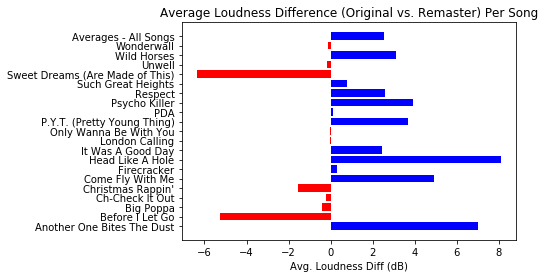

In [78]:
colors = []
for diff in all_songs_avg['loud_start_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(all_songs_avg['song_title'], all_songs_avg['loud_start_diff'], color=colors)
plt.xlabel('Avg. Loudness Diff (dB)')
plt.title('Average Loudness Difference (Original vs. Remaster) Per Song')
plt.show()

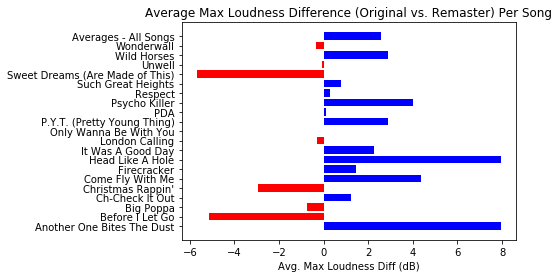

In [79]:
colors = []
for diff in all_songs_avg['loud_max_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(all_songs_avg['song_title'], all_songs_avg['loud_max_diff'], color=colors)
plt.xlabel('Avg. Max Loudness Diff (dB)')
plt.title('Average Max Loudness Difference (Original vs. Remaster) Per Song')
plt.show()

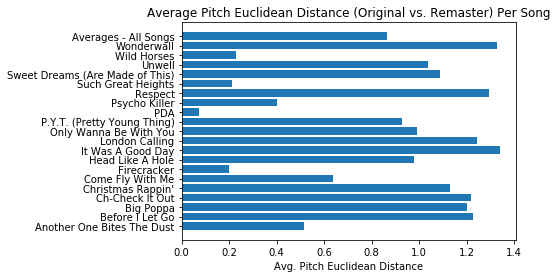

In [80]:
plt.barh(all_songs_avg['song_title'], all_songs_avg['pitch_eucl_dist'])
plt.xlabel('Avg. Pitch Euclidean Distance')
plt.title('Average Pitch Euclidean Distance (Original vs. Remaster) Per Song')
plt.show()

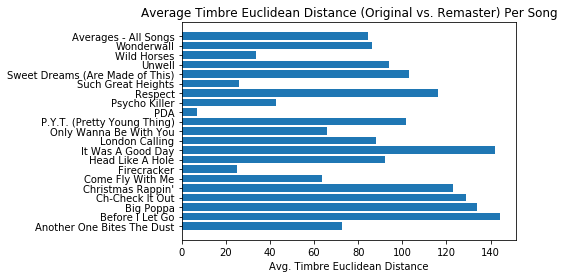

In [81]:
plt.barh(all_songs_avg['song_title'], all_songs_avg['timbre_eucl_dist'])
plt.xlabel('Avg. Timbre Euclidean Distance')
plt.title('Average Timbre Euclidean Distance (Original vs. Remaster) Per Song')
plt.show()

In [82]:
audio_features_df = pd.read_csv(clean_data_folder + 'audio_features_clean.csv')
audio_features_df = audio_features_df.drop(columns=['Unnamed: 0'])
audio_features_df.head()

spotify_id               artist_id                artist  \
0  291RmMazWAmDitFuD6NJCv  1dfeR4HaWDbWqFHLkxsg1d                 Queen   
1  57JVGBtBLCfHw2muk5416J  1dfeR4HaWDbWqFHLkxsg1d                 Queen   
2  5QKN4oxf5BB94Tsu1TO79X  5me0Irg2ANcsgc93uaYrpb  The Notorious B.I.G.   
3  3moMtpCsPJvXirsyRwsD6u  5me0Irg2ANcsgc93uaYrpb  The Notorious B.I.G.   
4  56H98l4uinRifnTH8e308N  03r4iKL2g2442PT9n2UKsx          Beastie Boys   

                                     song_title remaster    tempo  \
0                    Another One Bites The Dust        N  109.884   
1  Another One Bites The Dust - Remastered 2011        Y  109.975   
2                     Big Poppa - 2005 Remaster        N   84.662   
3                     Big Poppa - 2005 Remaster        Y   84.487   
4                               Ch-Check It Out        N  115.062   

   time_signature    key  mode  loudness  energy  danceability  acousticness  \
0               4      F     0   -13.159   0.366         0.926        0.0483   
1               4      F     0    -6.472   0.528         0.933        0.1120   
2               4      A     0    -6.104   0.620         0.748        0.3010   
3               4      A     0    -7.220   0.578         0.778        0.4320   
4               4  C♯/D♭     1    -7.020   0.899         0.795        0.0766   

   instrumentalness  liveness  speechiness  valence  \
0             0.136    0.1190        0.122    0.784   
1             0.329    0.1630        0.162    0.756   
2             0.000    0.0717        0.285    0.766   
3             0.000    0.1380        0.274    0.758   
4             0.000    0.0852        0.292    0.694   

                                              genres  
0                              ['glam rock', 'rock']  
1                              ['glam rock', 'rock']  
2  ['east coast hip hop', 'gangster rap', 'hardco...  
3  ['east coast hip hop', 'gangster rap', 'hardco...  
4  ['alternative rock', 'east coast hip hop', 'hi...

In [83]:
audio_feat_og = audio_features_df[audio_features_df['remaster'] == 'N']
audio_feat_og = audio_feat_og.drop(columns=['remaster', 'spotify_id', 'time_signature', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'speechiness'])
audio_feat_og.columns = ['og_' + str(col) for col in audio_feat_og.columns]
audio_feat_og = audio_feat_og.rename(columns={'og_artist_id' : 'artist_id', 'og_artist' : 'artist', 'og_song_title' : 'song_title', 'og_genres' : 'genres'})
audio_feat_og.head()

artist_id                artist                  song_title  \
0  1dfeR4HaWDbWqFHLkxsg1d                 Queen  Another One Bites The Dust   
2  5me0Irg2ANcsgc93uaYrpb  The Notorious B.I.G.   Big Poppa - 2005 Remaster   
4  03r4iKL2g2442PT9n2UKsx          Beastie Boys             Ch-Check It Out   
6  0X380XXQSNBYuleKzav5UO       Nine Inch Nails            Head Like A Hole   
8  3Mcii5XWf6E0lrY3Uky4cA              Ice Cube           It Was A Good Day   

   og_tempo  og_loudness  og_energy  og_danceability  og_valence  \
0   109.884      -13.159      0.366            0.926       0.784   
2    84.662       -6.104      0.620            0.748       0.766   
4   115.062       -7.020      0.899            0.795       0.694   
6   115.386      -11.255      0.792            0.663       0.443   
8    82.299       -7.428      0.648            0.809       0.755   

                                              genres  
0                              ['glam rock', 'rock']  
2  ['east coast hip hop', 'gangster rap', 'hardco...  
4  ['alternative rock', 'east coast hip hop', 'hi...  
6  ['alternative metal', 'alternative rock', 'cyb...  
8  ['conscious hip hop', 'g funk', 'gangster rap'...

In [84]:
audio_feat_rem = audio_features_df[audio_features_df['remaster'] == 'Y']
audio_feat_rem = audio_feat_rem.drop(columns=['artist', 'song_title', 'remaster', 'genres', 'spotify_id', 'time_signature', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'speechiness'])
audio_feat_rem.columns = ['rem_' + str(col) for col in audio_feat_rem.columns]
audio_feat_rem = audio_feat_rem.rename(columns={'rem_artist_id' : 'artist_id'})
audio_feat_rem.head()

artist_id  rem_tempo  rem_loudness  rem_energy  \
1  1dfeR4HaWDbWqFHLkxsg1d    109.975        -6.472       0.528   
3  5me0Irg2ANcsgc93uaYrpb     84.487        -7.220       0.578   
5  03r4iKL2g2442PT9n2UKsx    115.055        -6.353       0.912   
7  0X380XXQSNBYuleKzav5UO    115.408        -4.012       0.912   
9  3Mcii5XWf6E0lrY3Uky4cA     82.356        -5.328       0.744   

   rem_danceability  rem_valence  
1             0.933        0.756  
3             0.778        0.758  
5             0.795        0.723  
7             0.649        0.402  
9             0.798        0.794

In [85]:
fifties = ['Frank Sinatra']
sixties = ['Aretha Franklin']
seventies = ['The Clash', 'Led Zeppelin', 'Talking Heads', 'Kurtis Blow', 'The Rolling Stones', 'YELLOW MAGIC ORCHESTRA']
eighties = ['Queen', 'Nine Inch Nails', 'Eurythmics', 'Michael Jackson', 'Maze, Frankie Beverly']
ninties = ['The Notorious B.I.G.', 'Ice Cube', 'Oasis', 'Hootie & The Blowfish']
aughts = ['Beastie Boys', 'Interpol', 'The Postal Service', 'Matchbox Twenty']

alt_rock = ['The Clash', 'Talking Heads', 'Oasis', 'Interpol']
hard_rock = ['Led Zeppelin', 'The Rolling Stones', 'Queen', 'Hootie & The Blowfish', 'Matchbox Twenty']
soul = ['Frank Sinatra', 'Aretha Franklin', 'Michael Jackson', 'Maze, Frankie Beverly']
hip_hop = ['Kurtis Blow', 'The Notorious B.I.G.', 'Ice Cube', 'Beastie Boys']
electronic = ['YELLOW MAGIC ORCHESTRA', 'Eurythmics', 'Nine Inch Nails', 'The Postal Service']


In [86]:
audio_feat_mrge = pd.merge(audio_feat_og, audio_feat_rem, on='artist_id')
audio_feat_mrge['song_title'] = [x.split(" -")[0] if x.find('-') != -1 else x for x in audio_feat_mrge['song_title']]
audio_feat_mrge['song_title'] = ["Only Wanna Be With You" if x == 'Only Wanna Be with You' else x for x in audio_feat_mrge['song_title']]
audio_feat_mrge

artist_id                  artist  \
0   1dfeR4HaWDbWqFHLkxsg1d                   Queen   
1   5me0Irg2ANcsgc93uaYrpb    The Notorious B.I.G.   
2   03r4iKL2g2442PT9n2UKsx            Beastie Boys   
3   0X380XXQSNBYuleKzav5UO         Nine Inch Nails   
4   3Mcii5XWf6E0lrY3Uky4cA                Ice Cube   
5   3RGLhK1IP9jnYFH4BRFJBS               The Clash   
6   3WaJSfKnzc65VDgmj2zU8B                Interpol   
7   7nwUJBm0HE4ZxD3f5cy5ok         Aretha Franklin   
8   0NKDgy9j66h3DLnN8qu1bB              Eurythmics   
9   3Ngh2zDBRPEriyxQDAMKd1         Matchbox Twenty   
10  36QJpDe2go2KgaRleHCDTp            Led Zeppelin   
11  2DaxqgrOhkeH0fpeiQq2f4                   Oasis   
12  3fMbdgg4jU18AjLCKBhRSm         Michael Jackson   
13  2x9SpqnPi8rlE9pjHBwmSC           Talking Heads   
14  1Mxqyy3pSjf8kZZL4QVxS0           Frank Sinatra   
15  5yV1qdnmxyIYiSFB02wpDj      The Postal Service   
16  6ogn9necmbUdCppmNnGOdi       Alanis Morissette   
17  6GI52t8N5F02MxU0g5U69P     Santana, Rob Thomas   
18  3DvdryKH4O95ZnsUZJKXpt   Maze, Frankie Beverly   
19  08ct2eZF5lUPdJpHwNKWof   Hootie & The Blowfish   
20  25TKXk9zo9yk0HMJQ3TuE9             Kurtis Blow   
21  22bE4uQ6baNwSHPVcDxLCe      The Rolling Stones   
22  2JIf5JxI3ypOSfrfNIIMQE  YELLOW MAGIC ORCHESTRA   

                         song_title  og_tempo  og_loudness  og_energy  \
0        Another One Bites The Dust   109.884      -13.159      0.366   
1                         Big Poppa    84.662       -6.104      0.620   
2                   Ch-Check It Out   115.062       -7.020      0.899   
3                  Head Like A Hole   115.386      -11.255      0.792   
4                 It Was A Good Day    82.299       -7.428      0.648   
5                    London Calling   133.731       -6.920      0.799   
6                               PDA   138.221       -5.833      0.911   
7                           Respect   114.950       -5.226      0.558   
8   Sweet Dreams (Are Made of This)   125.135       -7.498      0.711   
9                            Unwell    80.718       -5.263      0.788   
10                   Immigrant Song   112.937      -10.068      0.932   
11                       Wonderwall   174.648       -4.347      0.893   
12      P.Y.T. (Pretty Young Thing)   127.208       -9.406      0.670   
13                    Psycho Killer   123.384      -12.139      0.401   
14                 Come Fly With Me    67.008      -11.376      0.338   
15               Such Great Heights   174.984       -8.125      0.818   
16                Hand In My Pocket    74.987       -8.241      0.530   
17        Smooth (feat. Rob Thomas)   115.996       -3.908      0.923   
18                  Before I Let Go   103.162       -6.283      0.558   
19           Only Wanna Be With You   103.272       -5.861      0.873   
20                Christmas Rappin'   111.614      -10.851      0.679   
21                      Wild Horses    73.467       -9.757      0.298   
22                      Firecracker   120.462       -5.156      0.888   

    og_danceability  og_valence  \
0             0.926       0.784   
1             0.748       0.766   
2             0.795       0.694   
3             0.663       0.443   
4             0.809       0.755   
5             0.654       0.755   
6             0.238       0.247   
7             0.805       0.965   
8             0.692       0.875   
9             0.256       0.429   
10            0.564       0.619   
11            0.410       0.688   
12            0.894       0.961   
13            0.721       0.944   
14            0.574       0.493   
15            0.653       0.198   
16            0.614       0.465   
17            0.609       0.961   
18            0.785       0.963   
19            0.490       0.513   
20            0.887       0.936   
21            0.376       0.144   
22            0.695       0.953   

                                               genres  rem_tempo  \
0                               ['glam rock', 'rock']    1

In [87]:
song_titles = []
for title in all_songs_avg['song_title']:
    song_titles.append(title)
audio_feat_mrge = audio_feat_mrge[audio_feat_mrge['song_title'].isin(song_titles)]
audio_feat_mrge = audio_feat_mrge.reset_index()
audio_feat_mrge = audio_feat_mrge.drop(columns=['index'])
audio_feat_mrge

artist_id                  artist  \
0   1dfeR4HaWDbWqFHLkxsg1d                   Queen   
1   5me0Irg2ANcsgc93uaYrpb    The Notorious B.I.G.   
2   03r4iKL2g2442PT9n2UKsx            Beastie Boys   
3   0X380XXQSNBYuleKzav5UO         Nine Inch Nails   
4   3Mcii5XWf6E0lrY3Uky4cA                Ice Cube   
5   3RGLhK1IP9jnYFH4BRFJBS               The Clash   
6   3WaJSfKnzc65VDgmj2zU8B                Interpol   
7   7nwUJBm0HE4ZxD3f5cy5ok         Aretha Franklin   
8   0NKDgy9j66h3DLnN8qu1bB              Eurythmics   
9   3Ngh2zDBRPEriyxQDAMKd1         Matchbox Twenty   
10  2DaxqgrOhkeH0fpeiQq2f4                   Oasis   
11  3fMbdgg4jU18AjLCKBhRSm         Michael Jackson   
12  2x9SpqnPi8rlE9pjHBwmSC           Talking Heads   
13  1Mxqyy3pSjf8kZZL4QVxS0           Frank Sinatra   
14  5yV1qdnmxyIYiSFB02wpDj      The Postal Service   
15  3DvdryKH4O95ZnsUZJKXpt   Maze, Frankie Beverly   
16  08ct2eZF5lUPdJpHwNKWof   Hootie & The Blowfish   
17  25TKXk9zo9yk0HMJQ3TuE9             Kurtis Blow   
18  22bE4uQ6baNwSHPVcDxLCe      The Rolling Stones   
19  2JIf5JxI3ypOSfrfNIIMQE  YELLOW MAGIC ORCHESTRA   

                         song_title  og_tempo  og_loudness  og_energy  \
0        Another One Bites The Dust   109.884      -13.159      0.366   
1                         Big Poppa    84.662       -6.104      0.620   
2                   Ch-Check It Out   115.062       -7.020      0.899   
3                  Head Like A Hole   115.386      -11.255      0.792   
4                 It Was A Good Day    82.299       -7.428      0.648   
5                    London Calling   133.731       -6.920      0.799   
6                               PDA   138.221       -5.833      0.911   
7                           Respect   114.950       -5.226      0.558   
8   Sweet Dreams (Are Made of This)   125.135       -7.498      0.711   
9                            Unwell    80.718       -5.263      0.788   
10                       Wonderwall   174.648       -4.347      0.893   
11      P.Y.T. (Pretty Young Thing)   127.208       -9.406      0.670   
12                    Psycho Killer   123.384      -12.139      0.401   
13                 Come Fly With Me    67.008      -11.376      0.338   
14               Such Great Heights   174.984       -8.125      0.818   
15                  Before I Let Go   103.162       -6.283      0.558   
16           Only Wanna Be With You   103.272       -5.861      0.873   
17                Christmas Rappin'   111.614      -10.851      0.679   
18                      Wild Horses    73.467       -9.757      0.298   
19                      Firecracker   120.462       -5.156      0.888   

    og_danceability  og_valence  \
0             0.926       0.784   
1             0.748       0.766   
2             0.795       0.694   
3             0.663       0.443   
4             0.809       0.755   
5             0.654       0.755   
6             0.238       0.247   
7             0.805       0.965   
8             0.692       0.875   
9             0.256       0.429   
10            0.410       0.688   
11            0.894       0.961   
12            0.721       0.944   
13            0.574       0.493   
14            0.653       0.198   
15            0.785       0.963   
16            0.490       0.513   
17            0.887       0.936   
18            0.376       0.144   
19            0.695       0.953   

                                               genres  rem_tempo  \
0                               ['glam rock', 'rock']    109.975   
1   ['east coast hip hop', 'gangster rap', 'hardco...     84.487   
2   ['alternative rock', 'east coast hip hop', 'hi...    115.055   
3   ['alternative metal', 'alternative rock', 'cyb...    115.408   
4   ['conscious hip hop', 'g funk', 'gangster rap'...     82.356   
5   ['classic rock', 'dance rock', 'permanent wave...    133.763   
6   ['alternative dance', 'alternative rock', 'dan...    137.989   
7   ['adult standards', 'classic soul', 'jazz blue...    114.991   


In [88]:
ogmean = audio_feat_mrge['og_loudness'].mean()
remmean = audio_feat_mrge['rem_loudness'].mean()
stdev = statistics.stdev(audio_feat_mrge['og_loudness'])
loudness_es = (remmean - ogmean) / stdev
loudness_es

0.31424592262686035

In [89]:
ogmean = audio_feat_mrge['og_energy'].mean()
remmean = audio_feat_mrge['rem_energy'].mean()
stdev = statistics.stdev(audio_feat_mrge['og_energy'])
energy_es = (remmean - ogmean) / stdev
energy_es

0.08555783863672145

In [90]:
ogmean = audio_feat_mrge['og_danceability'].mean()
remmean = audio_feat_mrge['rem_danceability'].mean()
stdev = statistics.stdev(audio_feat_mrge['og_danceability'])
dance_es = (remmean - ogmean) / stdev
dance_es

0.034621472865885294

In [91]:
ogmean = audio_feat_mrge['og_valence'].mean()
remmean = audio_feat_mrge['rem_valence'].mean()
stdev = statistics.stdev(audio_feat_mrge['og_valence'])
valence_es = (remmean - ogmean) / stdev
valence_es

-0.024993047272403642

In [92]:
audio_feat_mrge['primary_genre'] = [x.split(',')[1] if x.split(',')[0] == "['alternative rock'" else x.split(',')[3] if x.split(',')[0] == "['classic rock'" else x.split(',')[1] if x.split(',')[0] == "['classic j-rock'" else x.split(',')[3] if x.split(',')[0] == "['alternative metal'" else x.split(',')[1] if x.split(',')[0] == "['alternative dance'" else x.split(',')[1] if x.split(',')[0] == "['pop'" else x.split(',')[1] if x.split(',')[0] == "['beatlesque'" else x.split(',')[0] for x in audio_feat_mrge['genres']]
audio_feat_mrge['primary_genre'] = [x.split("'")[1] for x in audio_feat_mrge['primary_genre']]
audio_feat_mrge['genre_sorted'] = ['Alt. Rock/Punk' if (x in alt_rock) == True else "Rock/Hard Rock" if (x in hard_rock) == True else "R&B/Soul" if (x in soul) == True else "Hip Hop" if (x in hip_hop) == True else "Electronic/EDM" for x in audio_feat_mrge['artist']]
audio_feat_mrge['decade'] = [1950 if (x in fifties) == True else 1960 if (x in sixties) == True else 1970 if (x in seventies) == True else 1980 if (x in eighties) == True else 1990 if (x in ninties) == True else 2000 for x in audio_feat_mrge['artist']]
audio_feat_mrge.head()

artist_id                artist                  song_title  \
0  1dfeR4HaWDbWqFHLkxsg1d                 Queen  Another One Bites The Dust   
1  5me0Irg2ANcsgc93uaYrpb  The Notorious B.I.G.                   Big Poppa   
2  03r4iKL2g2442PT9n2UKsx          Beastie Boys             Ch-Check It Out   
3  0X380XXQSNBYuleKzav5UO       Nine Inch Nails            Head Like A Hole   
4  3Mcii5XWf6E0lrY3Uky4cA              Ice Cube           It Was A Good Day   

   og_tempo  og_loudness  og_energy  og_danceability  og_valence  \
0   109.884      -13.159      0.366            0.926       0.784   
1    84.662       -6.104      0.620            0.748       0.766   
2   115.062       -7.020      0.899            0.795       0.694   
3   115.386      -11.255      0.792            0.663       0.443   
4    82.299       -7.428      0.648            0.809       0.755   

                                              genres  rem_tempo  rem_loudness  \
0                              ['glam rock', 'rock']    109.975        -6.472   
1  ['east coast hip hop', 'gangster rap', 'hardco...     84.487        -7.220   
2  ['alternative rock', 'east coast hip hop', 'hi...    115.055        -6.353   
3  ['alternative metal', 'alternative rock', 'cyb...    115.408        -4.012   
4  ['conscious hip hop', 'g funk', 'gangster rap'...     82.356        -5.328   

   rem_energy  rem_danceability  rem_valence       primary_genre  \
0       0.528             0.933        0.756           glam rock   
1       0.578             0.778        0.758  east coast hip hop   
2       0.912             0.795        0.723  east coast hip hop   
3       0.912             0.649        0.402     electronic rock   
4       0.744             0.798        0.794   conscious hip hop   

     genre_sorted  decade  
0  Rock/Hard Rock    1980  
1         Hip Hop    1990  
2         Hip Hop    2000  
3  Electronic/EDM    1980  
4         Hip Hop    1990

In [93]:
feat_soul = audio_feat_mrge[audio_feat_mrge['genre_sorted'] == "R&B/Soul"]
soul_og = feat_soul['og_loudness'].mean()
soul_rem = feat_soul['rem_loudness'].mean()
stdev = statistics.stdev(feat_soul['og_loudness'])
loud_es = (soul_rem - soul_og) / stdev
loud_es

0.051180898071987946

In [94]:
soul_og = feat_soul['og_energy'].mean()
soul_rem = feat_soul['rem_energy'].mean()
stdev = statistics.stdev(feat_soul['og_energy'])
loud_es = (soul_rem - soul_og) / stdev
loud_es

0.22469419258623735

In [95]:
feat_edm = audio_feat_mrge[audio_feat_mrge['genre_sorted'] == "Electronic/EDM"]
edm_og = feat_edm['og_loudness'].mean()
edm_rem = feat_edm['rem_loudness'].mean()
stdev = statistics.stdev(feat_edm['og_loudness'])
loud_es = (edm_rem - edm_og) / stdev
loud_es

0.3857409991337673

In [96]:
feat_80s = audio_feat_mrge[audio_feat_mrge['decade'] == 1980]
og_80s = feat_80s['og_loudness'].mean()
rem_80s = feat_80s['rem_loudness'].mean()
stdev = statistics.stdev(feat_80s['og_loudness'])
loud_es = (rem_80s - og_80s) / stdev
loud_es

0.33173202916507444

In [97]:
og_80s = feat_80s['og_energy'].mean()
rem_80s = feat_80s['rem_energy'].mean()
stdev = statistics.stdev(feat_80s['og_energy'])
energy_es = (rem_80s - og_80s) / stdev
energy_es

-0.0036393190678483804

In [98]:
audio_feat_mrge = pd.merge(audio_feat_og, audio_feat_rem, on='artist_id')
audio_feat_mrge['song_title'] = [x.split(" -")[0] if x.find('-') != -1 else x for x in audio_feat_mrge['song_title']]
audio_feat_mrge['tempo_diff'] = audio_feat_mrge['rem_tempo'] - audio_feat_mrge['og_tempo']
audio_feat_mrge['loud_diff'] = audio_feat_mrge['rem_loudness'] - audio_feat_mrge['og_loudness']
audio_feat_mrge['energy_diff'] = audio_feat_mrge['rem_energy'] - audio_feat_mrge['og_energy']
audio_feat_mrge['dance_diff'] = audio_feat_mrge['rem_danceability'] - audio_feat_mrge['og_danceability']
audio_feat_mrge['valence_diff'] = audio_feat_mrge['rem_valence'] - audio_feat_mrge['og_valence']
audio_feat_mrge = audio_feat_mrge[['artist_id', 'artist', 'song_title', 'genres', 'tempo_diff', 'loud_diff', 'energy_diff','dance_diff','valence_diff']]
audio_feat_mrge['song_title'] = ["Only Wanna Be With You" if x == 'Only Wanna Be with You' else x for x in audio_feat_mrge['song_title']]
audio_feat_mrge

artist_id                  artist  \
0   1dfeR4HaWDbWqFHLkxsg1d                   Queen   
1   5me0Irg2ANcsgc93uaYrpb    The Notorious B.I.G.   
2   03r4iKL2g2442PT9n2UKsx            Beastie Boys   
3   0X380XXQSNBYuleKzav5UO         Nine Inch Nails   
4   3Mcii5XWf6E0lrY3Uky4cA                Ice Cube   
5   3RGLhK1IP9jnYFH4BRFJBS               The Clash   
6   3WaJSfKnzc65VDgmj2zU8B                Interpol   
7   7nwUJBm0HE4ZxD3f5cy5ok         Aretha Franklin   
8   0NKDgy9j66h3DLnN8qu1bB              Eurythmics   
9   3Ngh2zDBRPEriyxQDAMKd1         Matchbox Twenty   
10  36QJpDe2go2KgaRleHCDTp            Led Zeppelin   
11  2DaxqgrOhkeH0fpeiQq2f4                   Oasis   
12  3fMbdgg4jU18AjLCKBhRSm         Michael Jackson   
13  2x9SpqnPi8rlE9pjHBwmSC           Talking Heads   
14  1Mxqyy3pSjf8kZZL4QVxS0           Frank Sinatra   
15  5yV1qdnmxyIYiSFB02wpDj      The Postal Service   
16  6ogn9necmbUdCppmNnGOdi       Alanis Morissette   
17  6GI52t8N5F02MxU0g5U69P     Santana, Rob Thomas   
18  3DvdryKH4O95ZnsUZJKXpt   Maze, Frankie Beverly   
19  08ct2eZF5lUPdJpHwNKWof   Hootie & The Blowfish   
20  25TKXk9zo9yk0HMJQ3TuE9             Kurtis Blow   
21  22bE4uQ6baNwSHPVcDxLCe      The Rolling Stones   
22  2JIf5JxI3ypOSfrfNIIMQE  YELLOW MAGIC ORCHESTRA   

                         song_title  \
0        Another One Bites The Dust   
1                         Big Poppa   
2                   Ch-Check It Out   
3                  Head Like A Hole   
4                 It Was A Good Day   
5                    London Calling   
6                               PDA   
7                           Respect   
8   Sweet Dreams (Are Made of This)   
9                            Unwell   
10                   Immigrant Song   
11                       Wonderwall   
12      P.Y.T. (Pretty Young Thing)   
13                    Psycho Killer   
14                 Come Fly With Me   
15               Such Great Heights   
16                Hand In My Pocket   
17        Smooth (feat. Rob Thomas)   
18                  Before I Let Go   
19           Only Wanna Be With You   
20                Christmas Rappin'   
21                      Wild Horses   
22                      Firecracker   

                                               genres  tempo_diff  loud_diff  \
0                               ['glam rock', 'rock']       0.091      6.687   
1   ['east coast hip hop', 'gangster rap', 'hardco...      -0.175     -1.116   
2   ['alternative rock', 'east coast hip hop', 'hi...      -0.007      0.667   
3   ['alternative metal', 'alternative rock', 'cyb...       0.022      7.243   
4   ['conscious hip hop', 'g funk', 'gangster rap'...       0.057      2.100   
5   ['classic rock', 'dance rock', 'permanent wave...       0.032     -0.420   
6   ['alternative dance', 'alternative rock', 'dan...      -0.232      0.137   
7   ['adult standards', 'classic soul', 'jazz blue...       0.041     -1.160   
8   ['dance pop', 'dance rock', 'europop', 'mellow...       0.054     -6.790   
9           ['neo mellow', 'pop rock', 'post-grunge']       0.267      0.111   
10  ['album rock', 'classic rock', 'hard rock', 'r...       0.000      0.000   
11  ['beatlesque', 'britpop', 'madchester', 'moder...      -0.118     -0.571   
12                             ['pop', 'r&b', 'soul']       0.124      3.876   
13  ['art punk', 'art rock', 'dance rock', 'funk r...      -0.266      4.016   
14    ['adult standards', 'easy listening', 'lounge']      67.112      4.274   
15  ['indie pop', 'indie rock', 'indietronica', 'm...      -0.006      0.976   
16  ['alternative rock', 'canadian pop', 'canadian...       0.000      0.000   
17  ['blues rock', 'classic rock', 'mexican classi...       0.000      0.000   
18  ['funk', 'motown', 'neo soul', 'new jack swing...      -0.021     -6.411   
19  ['mellow gold', 'neo mellow', 'pop rock', 'pos...      -0.153     -0.377   
20  ['east coast hip hop', 'electro', 'harlem hip ...      -0.667     -2.238   
21  ['album rock', 'bri

In [99]:
song_titles = []
for title in all_songs_avg['song_title']:
    song_titles.append(title)
audio_feat_mrge = audio_feat_mrge[audio_feat_mrge['song_title'].isin(song_titles)]
audio_feat_mrge = audio_feat_mrge.reset_index()
audio_feat_mrge = audio_feat_mrge.drop(columns=['index'])
audio_feat_mrge

artist_id                  artist  \
0   1dfeR4HaWDbWqFHLkxsg1d                   Queen   
1   5me0Irg2ANcsgc93uaYrpb    The Notorious B.I.G.   
2   03r4iKL2g2442PT9n2UKsx            Beastie Boys   
3   0X380XXQSNBYuleKzav5UO         Nine Inch Nails   
4   3Mcii5XWf6E0lrY3Uky4cA                Ice Cube   
5   3RGLhK1IP9jnYFH4BRFJBS               The Clash   
6   3WaJSfKnzc65VDgmj2zU8B                Interpol   
7   7nwUJBm0HE4ZxD3f5cy5ok         Aretha Franklin   
8   0NKDgy9j66h3DLnN8qu1bB              Eurythmics   
9   3Ngh2zDBRPEriyxQDAMKd1         Matchbox Twenty   
10  2DaxqgrOhkeH0fpeiQq2f4                   Oasis   
11  3fMbdgg4jU18AjLCKBhRSm         Michael Jackson   
12  2x9SpqnPi8rlE9pjHBwmSC           Talking Heads   
13  1Mxqyy3pSjf8kZZL4QVxS0           Frank Sinatra   
14  5yV1qdnmxyIYiSFB02wpDj      The Postal Service   
15  3DvdryKH4O95ZnsUZJKXpt   Maze, Frankie Beverly   
16  08ct2eZF5lUPdJpHwNKWof   Hootie & The Blowfish   
17  25TKXk9zo9yk0HMJQ3TuE9             Kurtis Blow   
18  22bE4uQ6baNwSHPVcDxLCe      The Rolling Stones   
19  2JIf5JxI3ypOSfrfNIIMQE  YELLOW MAGIC ORCHESTRA   

                         song_title  \
0        Another One Bites The Dust   
1                         Big Poppa   
2                   Ch-Check It Out   
3                  Head Like A Hole   
4                 It Was A Good Day   
5                    London Calling   
6                               PDA   
7                           Respect   
8   Sweet Dreams (Are Made of This)   
9                            Unwell   
10                       Wonderwall   
11      P.Y.T. (Pretty Young Thing)   
12                    Psycho Killer   
13                 Come Fly With Me   
14               Such Great Heights   
15                  Before I Let Go   
16           Only Wanna Be With You   
17                Christmas Rappin'   
18                      Wild Horses   
19                      Firecracker   

                                               genres  tempo_diff  loud_diff  \
0                               ['glam rock', 'rock']       0.091      6.687   
1   ['east coast hip hop', 'gangster rap', 'hardco...      -0.175     -1.116   
2   ['alternative rock', 'east coast hip hop', 'hi...      -0.007      0.667   
3   ['alternative metal', 'alternative rock', 'cyb...       0.022      7.243   
4   ['conscious hip hop', 'g funk', 'gangster rap'...       0.057      2.100   
5   ['classic rock', 'dance rock', 'permanent wave...       0.032     -0.420   
6   ['alternative dance', 'alternative rock', 'dan...      -0.232      0.137   
7   ['adult standards', 'classic soul', 'jazz blue...       0.041     -1.160   
8   ['dance pop', 'dance rock', 'europop', 'mellow...       0.054     -6.790   
9           ['neo mellow', 'pop rock', 'post-grunge']       0.267      0.111   
10  ['beatlesque', 'britpop', 'madchester', 'moder...      -0.118     -0.571   
11                             ['pop', 'r&b', 'soul']       0.124      3.876   
12  ['art punk', 'art rock', 'dance rock', 'funk r...      -0.266      4.016   
13    ['adult standards', 'easy listening', 'lounge']      67.112      4.274   
14  ['indie pop', 'indie rock', 'indietronica', 'm...      -0.006      0.976   
15  ['funk', 'motown', 'neo soul', 'new jack swing...      -0.021     -6.411   
16  ['mellow gold', 'neo mellow', 'pop rock', 'pos...      -0.153     -0.377   
17  ['east coast hip hop', 'electro', 'harlem hip ...      -0.667     -2.238   
18  ['album rock', 'british invasion', 'classic ro...      66.039      3.240   
19  ['classic j-rock', 'electro', 'japanese city p...      -0.031      2.449   

    energy_diff  dance_diff  valence_diff  
0         0.162       0.007        -0.028  
1        -0.042       0.030        -0.008  
2         0.013       0.000         0.029  
3         0.120      -0.014        -0.041  
4         0.096      -0.011         0.039  
5         0.002      -0.003         0.021  
6        -0.009       0.001        -0.027  
7         0.054      -0.061  

In [100]:
tempo_mean = abs(audio_feat_mrge['tempo_diff'])
tempo_mean = tempo_mean.mean()
loud_mean = abs(audio_feat_mrge['loud_diff'])
loud_mean = loud_mean.mean()
energy_mean = abs(audio_feat_mrge['energy_diff'])
energy_mean = energy_mean.mean()
dance_mean = abs(audio_feat_mrge['dance_diff'])
dance_mean = dance_mean.mean()
valence_mean = abs(audio_feat_mrge['valence_diff'])
valence_mean = valence_mean.mean()

In [101]:
mean_row = { "artist_id" : "N/A", "artist" : "N/A", "song_title" : "Averages - All Songs", "genres" : "N/A", "tempo_diff" : tempo_mean, "loud_diff" : loud_mean, "energy_diff" : energy_mean, "dance_diff" : dance_mean, "valence_diff" : valence_mean}
audio_feat_avg = audio_feat_mrge.append(mean_row, ignore_index = True)
audio_feat_avg

artist_id                  artist  \
0   1dfeR4HaWDbWqFHLkxsg1d                   Queen   
1   5me0Irg2ANcsgc93uaYrpb    The Notorious B.I.G.   
2   03r4iKL2g2442PT9n2UKsx            Beastie Boys   
3   0X380XXQSNBYuleKzav5UO         Nine Inch Nails   
4   3Mcii5XWf6E0lrY3Uky4cA                Ice Cube   
5   3RGLhK1IP9jnYFH4BRFJBS               The Clash   
6   3WaJSfKnzc65VDgmj2zU8B                Interpol   
7   7nwUJBm0HE4ZxD3f5cy5ok         Aretha Franklin   
8   0NKDgy9j66h3DLnN8qu1bB              Eurythmics   
9   3Ngh2zDBRPEriyxQDAMKd1         Matchbox Twenty   
10  2DaxqgrOhkeH0fpeiQq2f4                   Oasis   
11  3fMbdgg4jU18AjLCKBhRSm         Michael Jackson   
12  2x9SpqnPi8rlE9pjHBwmSC           Talking Heads   
13  1Mxqyy3pSjf8kZZL4QVxS0           Frank Sinatra   
14  5yV1qdnmxyIYiSFB02wpDj      The Postal Service   
15  3DvdryKH4O95ZnsUZJKXpt   Maze, Frankie Beverly   
16  08ct2eZF5lUPdJpHwNKWof   Hootie & The Blowfish   
17  25TKXk9zo9yk0HMJQ3TuE9             Kurtis Blow   
18  22bE4uQ6baNwSHPVcDxLCe      The Rolling Stones   
19  2JIf5JxI3ypOSfrfNIIMQE  YELLOW MAGIC ORCHESTRA   
20                     N/A                     N/A   

                         song_title  \
0        Another One Bites The Dust   
1                         Big Poppa   
2                   Ch-Check It Out   
3                  Head Like A Hole   
4                 It Was A Good Day   
5                    London Calling   
6                               PDA   
7                           Respect   
8   Sweet Dreams (Are Made of This)   
9                            Unwell   
10                       Wonderwall   
11      P.Y.T. (Pretty Young Thing)   
12                    Psycho Killer   
13                 Come Fly With Me   
14               Such Great Heights   
15                  Before I Let Go   
16           Only Wanna Be With You   
17                Christmas Rappin'   
18                      Wild Horses   
19                      Firecracker   
20             Averages - All Songs   

                                               genres  tempo_diff  loud_diff  \
0                               ['glam rock', 'rock']     0.09100    6.68700   
1   ['east coast hip hop', 'gangster rap', 'hardco...    -0.17500   -1.11600   
2   ['alternative rock', 'east coast hip hop', 'hi...    -0.00700    0.66700   
3   ['alternative metal', 'alternative rock', 'cyb...     0.02200    7.24300   
4   ['conscious hip hop', 'g funk', 'gangster rap'...     0.05700    2.10000   
5   ['classic rock', 'dance rock', 'permanent wave...     0.03200   -0.42000   
6   ['alternative dance', 'alternative rock', 'dan...    -0.23200    0.13700   
7   ['adult standards', 'classic soul', 'jazz blue...     0.04100   -1.16000   
8   ['dance pop', 'dance rock', 'europop', 'mellow...     0.05400   -6.79000   
9           ['neo mellow', 'pop rock', 'post-grunge']     0.26700    0.11100   
10  ['beatlesque', 'britpop', 'madchester', 'moder...    -0.11800   -0.57100   
11                             ['pop', 'r&b', 'soul']     0.12400    3.87600   
12  ['art punk', 'art rock', 'dance rock', 'funk r...    -0.26600    4.01600   
13    ['adult standards', 'easy listening', 'lounge']    67.11200    4.27400   
14  ['indie pop', 'indie rock', 'indietronica', 'm...    -0.00600    0.97600   
15  ['funk', 'motown', 'neo soul', 'new jack swing...    -0.02100   -6.41100   
16  ['mellow gold', 'neo mellow', 'pop rock', 'pos...    -0.15300   -0.37700   
17  ['east coast hip hop', 'electro', 'harlem hip ...    -0.66700   -2.23800   
18  ['album rock', 'british invasion', 'classic ro...    66.03900    3.24000   
19  ['classic j-rock', 'electro', 'japanese city p...    -0.03100    2.44900   
20                                                N/A     6.77575    2.74295   

    energy_diff  dance_diff  valence_diff  
0        0.1620     0.00700       -0.0280  
1       -0.0420     0.03000       -0.0080  
2        0.0130     0.00000        0.0290  
3        0.1200    -0.01400     

In [102]:
analysis_feat_mrge = pd.merge(all_songs_avg, audio_feat_avg, on='song_title')
analysis_feat_mrge['primary_genre'] = ["N/A" if x == "N/A" else x.split(',')[1] if x.split(',')[0] == "['alternative rock'" else x.split(',')[3] if x.split(',')[0] == "['classic rock'" else x.split(',')[1] if x.split(',')[0] == "['classic j-rock'" else x.split(',')[3] if x.split(',')[0] == "['alternative metal'" else x.split(',')[1] if x.split(',')[0] == "['alternative dance'" else x.split(',')[1] if x.split(',')[0] == "['pop'" else x.split(',')[1] if x.split(',')[0] == "['beatlesque'" else x.split(',')[0] for x in analysis_feat_mrge['genres']]
analysis_feat_mrge['primary_genre'] = ["N/A" if x == "N/A" else x.split("'")[1] for x in analysis_feat_mrge['primary_genre']]
analysis_feat_mrge['genre_sorted'] = ["N/A" if x == "N/A" else 'Alt. Rock/Punk' if (x in alt_rock) == True else "Rock/Hard Rock" if (x in hard_rock) == True else "R&B/Soul" if (x in soul) == True else "Hip Hop" if (x in hip_hop) == True else "Electronic/EDM" for x in analysis_feat_mrge['artist']]
analysis_feat_mrge['decade'] = [0 if x == "N/A" else 1950 if (x in fifties) == True else 1960 if (x in sixties) == True else 1970 if (x in seventies) == True else 1980 if (x in eighties) == True else 1990 if (x in ninties) == True else 2000 for x in analysis_feat_mrge['artist']]
analysis_feat_mrge = analysis_feat_mrge[['artist_id', 'artist', 'song_title', 'genres', 'primary_genre', 'genre_sorted', 'decade', 'loud_start_diff', 'loud_max_diff', 'pitch_eucl_dist', 'timbre_eucl_dist', 'tempo_diff', 'loud_diff', 'energy_diff', 'dance_diff', 'valence_diff']]
analysis_feat_mrge

artist_id                  artist  \
0   1dfeR4HaWDbWqFHLkxsg1d                   Queen   
1   3DvdryKH4O95ZnsUZJKXpt   Maze, Frankie Beverly   
2   5me0Irg2ANcsgc93uaYrpb    The Notorious B.I.G.   
3   03r4iKL2g2442PT9n2UKsx            Beastie Boys   
4   25TKXk9zo9yk0HMJQ3TuE9             Kurtis Blow   
5   1Mxqyy3pSjf8kZZL4QVxS0           Frank Sinatra   
6   2JIf5JxI3ypOSfrfNIIMQE  YELLOW MAGIC ORCHESTRA   
7   0X380XXQSNBYuleKzav5UO         Nine Inch Nails   
8   3Mcii5XWf6E0lrY3Uky4cA                Ice Cube   
9   3RGLhK1IP9jnYFH4BRFJBS               The Clash   
10  08ct2eZF5lUPdJpHwNKWof   Hootie & The Blowfish   
11  3fMbdgg4jU18AjLCKBhRSm         Michael Jackson   
12  3WaJSfKnzc65VDgmj2zU8B                Interpol   
13  2x9SpqnPi8rlE9pjHBwmSC           Talking Heads   
14  7nwUJBm0HE4ZxD3f5cy5ok         Aretha Franklin   
15  5yV1qdnmxyIYiSFB02wpDj      The Postal Service   
16  0NKDgy9j66h3DLnN8qu1bB              Eurythmics   
17  3Ngh2zDBRPEriyxQDAMKd1         Matchbox Twenty   
18  22bE4uQ6baNwSHPVcDxLCe      The Rolling Stones   
19  2DaxqgrOhkeH0fpeiQq2f4                   Oasis   
20                     N/A                     N/A   

                         song_title  \
0        Another One Bites The Dust   
1                   Before I Let Go   
2                         Big Poppa   
3                   Ch-Check It Out   
4                 Christmas Rappin'   
5                  Come Fly With Me   
6                       Firecracker   
7                  Head Like A Hole   
8                 It Was A Good Day   
9                    London Calling   
10           Only Wanna Be With You   
11      P.Y.T. (Pretty Young Thing)   
12                              PDA   
13                    Psycho Killer   
14                          Respect   
15               Such Great Heights   
16  Sweet Dreams (Are Made of This)   
17                           Unwell   
18                      Wild Horses   
19                       Wonderwall   
20             Averages - All Songs   

                                               genres       primary_genre  \
0                               ['glam rock', 'rock']           glam rock   
1   ['funk', 'motown', 'neo soul', 'new jack swing...                funk   
2   ['east coast hip hop', 'gangster rap', 'hardco...  east coast hip hop   
3   ['alternative rock', 'east coast hip hop', 'hi...  east coast hip hop   
4   ['east coast hip hop', 'electro', 'harlem hip ...  east coast hip hop   
5     ['adult standards', 'easy listening', 'lounge']     adult standards   
6   ['classic j-rock', 'electro', 'japanese city p...             electro   
7   ['alternative metal', 'alternative rock', 'cyb...     electronic rock   
8   ['conscious hip hop', 'g funk', 'gangster rap'...   conscious hip hop   
9   ['classic rock', 'dance rock', 'permanent wave...                punk   
10  ['mellow gold', 'neo mellow', 'pop rock', 'pos...         mellow gold   
11                             ['pop', 'r&b', 'soul']                 r&b   
12  ['alternative dance', 'alternative rock', 'dan...    alternative rock   
13  ['art punk', 'art rock', 'dance rock', 'funk r...            art punk   
14  ['adult standards', 'classic soul', 'jazz blue...     adult standards   
15  ['indie pop', 'indie rock', 'indietronica', 'm...           indie pop   
16  ['dance pop', 'dance rock', 'europop', 'mellow...           dance pop   
17          ['neo mellow', 'pop rock', 'post-grunge']          neo mellow   
18  ['album rock', 'british invasion', 'classic ro...          album rock   
19  ['beatlesque', 'britpop', 'madchester', 'moder...             britpop   
20                                                N/A                 N/A   

      genre_sorted  decade  loud_start_diff  loud_max_diff  pitch_eucl_dist  \
0   Rock/Hard Rock    1980         7.022844       7.960178         0.514452   
1         R&B/Soul    1980        -5.272641      -5.132000         1.228305   
2          Hip Hop    1990        -0.

analysis_feat_mrge.to_csv("analysis_features_averages.csv")

[]

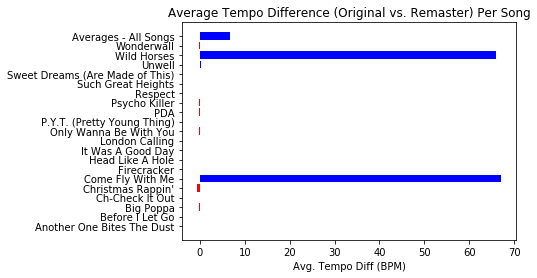

In [103]:
colors = []
for diff in analysis_feat_mrge['tempo_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(analysis_feat_mrge['song_title'], analysis_feat_mrge['tempo_diff'], color=colors)
plt.xlabel('Avg. Tempo Diff (BPM)')
plt.title('Average Tempo Difference (Original vs. Remaster) Per Song')
plt.plot()

[]

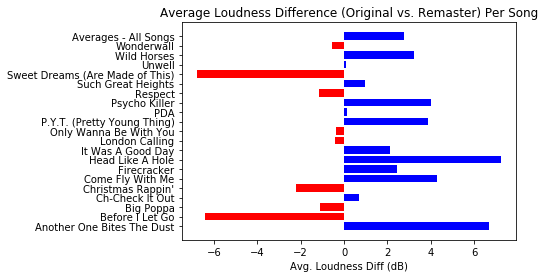

In [104]:
colors = []
for diff in analysis_feat_mrge['loud_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(analysis_feat_mrge['song_title'], analysis_feat_mrge['loud_diff'], color=colors)
plt.xlabel('Avg. Loudness Diff (dB)')
plt.title('Average Loudness Difference (Original vs. Remaster) Per Song')
plt.plot()

[]

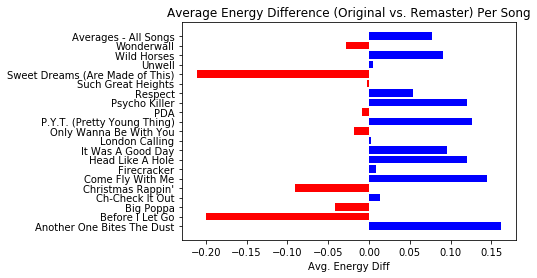

In [105]:
colors = []
for diff in analysis_feat_mrge['energy_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(analysis_feat_mrge['song_title'], analysis_feat_mrge['energy_diff'], color=colors)
plt.xlabel('Avg. Energy Diff')
plt.title('Average Energy Difference (Original vs. Remaster) Per Song')
plt.plot()

[]

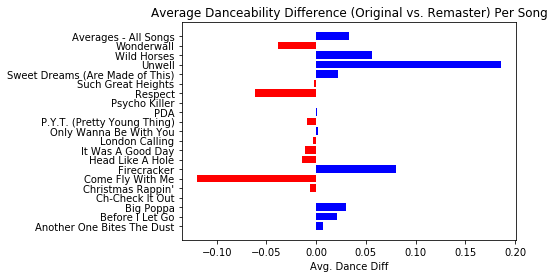

In [106]:
colors = []
for diff in analysis_feat_mrge['dance_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(analysis_feat_mrge['song_title'], analysis_feat_mrge['dance_diff'], color=colors)
plt.xlabel('Avg. Dance Diff')
plt.title('Average Danceability Difference (Original vs. Remaster) Per Song')
plt.plot()

[]

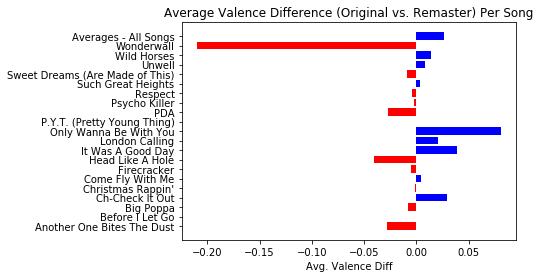

In [107]:
colors = []
for diff in analysis_feat_mrge['valence_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(analysis_feat_mrge['song_title'], analysis_feat_mrge['valence_diff'], color=colors)
plt.xlabel('Avg. Valence Diff')
plt.title('Average Valence Difference (Original vs. Remaster) Per Song')
plt.plot()

In [108]:
song_titles = []
for title in all_songs_group['song_title']:
    song_titles.append(title)
genre_group = analysis_feat_mrge
genre_group = genre_group[genre_group["song_title"].isin(song_titles)]
genre_group = genre_group.reset_index()
genre_group = genre_group.drop(columns=['index'])
genre_group['loud_start_diff'] = abs(genre_group['loud_start_diff'])
genre_group['loud_max_diff'] = abs(genre_group['loud_max_diff'])
genre_group['tempo_diff'] = abs(genre_group['tempo_diff'])
genre_group['loud_diff'] = abs(genre_group['loud_diff'])
genre_group['energy_diff'] = abs(genre_group['energy_diff'])
genre_group['dance_diff'] = abs(genre_group['dance_diff'])
genre_group['valence_diff'] = abs(genre_group['valence_diff'])
genre_group = genre_group.groupby('genre_sorted').mean()
genre_group = genre_group.reset_index()
genre_group = genre_group.drop(columns=['decade'])
genre_group

genre_sorted  loud_start_diff  loud_max_diff  pitch_eucl_dist  \
0  Alt. Rock/Punk         1.052530       1.181751         0.761314   
1  Electronic/EDM         3.895845       3.963810         0.619325   
2         Hip Hop         1.144304       1.793864         1.223249   
3        R&B/Soul         4.106548       3.166677         1.021820   
4  Rock/Hard Rock         2.583773       2.737246         0.693035   

   timbre_eucl_dist  tempo_diff  loud_diff  energy_diff  dance_diff  \
0         56.070398     0.16200    1.28600      0.03975     0.01050   
1         61.596370     0.02825    4.36450      0.08550     0.02950   
2        132.099093     0.22650    1.53025      0.06050     0.01175   
3        106.411900    16.82450    3.93025      0.13125     0.05275   
4         66.506652    16.63750    2.60375      0.06900     0.06275   

   valence_diff  
0       0.06500  
1       0.01450  
2       0.01925  
3       0.00200  
4       0.03275

In [109]:
loud_mean = genre_group['loud_start_diff'].mean()
loud_max_mean = genre_group['loud_max_diff'].mean()
pitch_mean = genre_group['pitch_eucl_dist'].mean()
timbre_mean = genre_group['timbre_eucl_dist'].mean()
tempo_mean = genre_group['tempo_diff'].mean()
feat_loud_mean = genre_group['loud_diff'].mean()
energy_mean = genre_group['energy_diff'].mean()
dance_mean = genre_group['dance_diff'].mean()
valence_mean = genre_group['valence_diff'].mean()

In [110]:
mean_row = {"genre_sorted" : "Averages - All Genres", "loud_start_diff" : loud_mean, "loud_max_diff" : loud_max_mean, "pitch_eucl_dist" : pitch_mean, "timbre_eucl_dist" : timbre_mean, "tempo_diff" : tempo_mean, "loud_diff" : feat_loud_mean, "energy_diff" : energy_mean, "dance_diff" : dance_mean, "valence_diff" : valence_mean}
genre_avg = genre_group.append(mean_row, ignore_index = True)
genre_avg

genre_sorted  loud_start_diff  loud_max_diff  pitch_eucl_dist  \
0         Alt. Rock/Punk         1.052530       1.181751         0.761314   
1         Electronic/EDM         3.895845       3.963810         0.619325   
2                Hip Hop         1.144304       1.793864         1.223249   
3               R&B/Soul         4.106548       3.166677         1.021820   
4         Rock/Hard Rock         2.583773       2.737246         0.693035   
5  Averages - All Genres         2.556600       2.568670         0.863748   

   timbre_eucl_dist  tempo_diff  loud_diff  energy_diff  dance_diff  \
0         56.070398     0.16200    1.28600      0.03975     0.01050   
1         61.596370     0.02825    4.36450      0.08550     0.02950   
2        132.099093     0.22650    1.53025      0.06050     0.01175   
3        106.411900    16.82450    3.93025      0.13125     0.05275   
4         66.506652    16.63750    2.60375      0.06900     0.06275   
5         84.536883     6.77575    2.74295      0.07720     0.03345   

   valence_diff  
0       0.06500  
1       0.01450  
2       0.01925  
3       0.00200  
4       0.03275  
5       0.02670

[]

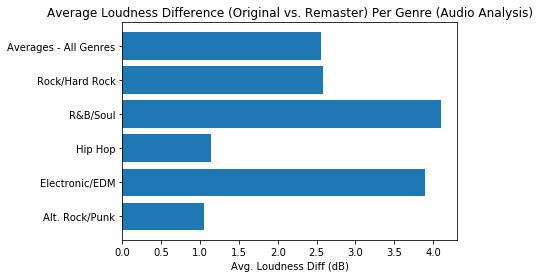

In [111]:
plt.barh(genre_avg['genre_sorted'], genre_avg['loud_start_diff'])
plt.xlabel('Avg. Loudness Diff (dB)')
plt.title('Average Loudness Difference (Original vs. Remaster) Per Genre (Audio Analysis)')
plt.plot()

[]

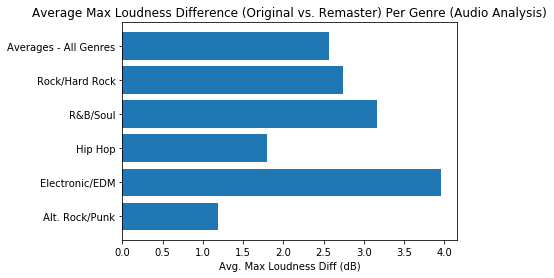

In [112]:
plt.barh(genre_avg['genre_sorted'], genre_avg['loud_max_diff'])
plt.xlabel('Avg. Max Loudness Diff (dB)')
plt.title('Average Max Loudness Difference (Original vs. Remaster) Per Genre (Audio Analysis)')
plt.plot()

[]

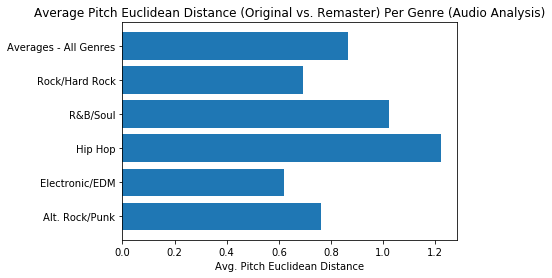

In [113]:
plt.barh(genre_avg['genre_sorted'], genre_avg['pitch_eucl_dist'])
plt.xlabel('Avg. Pitch Euclidean Distance')
plt.title('Average Pitch Euclidean Distance (Original vs. Remaster) Per Genre (Audio Analysis)')
plt.plot()

[]

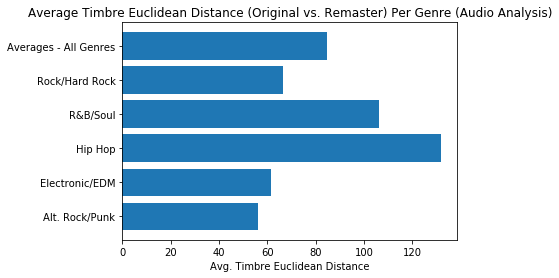

In [114]:
plt.barh(genre_avg['genre_sorted'], genre_avg['timbre_eucl_dist'])
plt.xlabel('Avg. Timbre Euclidean Distance')
plt.title('Average Timbre Euclidean Distance (Original vs. Remaster) Per Genre (Audio Analysis)')
plt.plot()

[]

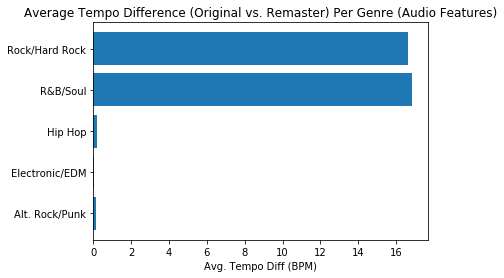

In [115]:
plt.barh(genre_group['genre_sorted'], genre_group['tempo_diff'])
plt.xlabel('Avg. Tempo Diff (BPM)')
plt.title('Average Tempo Difference (Original vs. Remaster) Per Genre (Audio Features)')
plt.plot()

[]

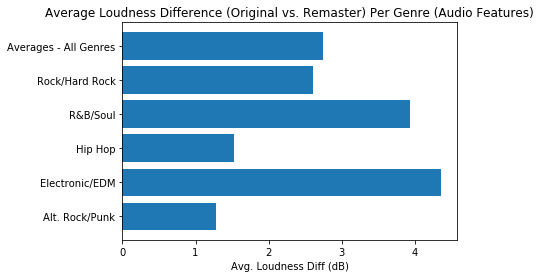

In [116]:
plt.barh(genre_avg['genre_sorted'], genre_avg['loud_diff'])
plt.xlabel('Avg. Loudness Diff (dB)')
plt.title('Average Loudness Difference (Original vs. Remaster) Per Genre (Audio Features)')
plt.plot()

[]

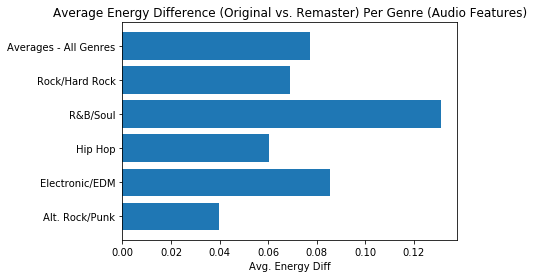

In [117]:
plt.barh(genre_avg['genre_sorted'], genre_avg['energy_diff'])
plt.xlabel('Avg. Energy Diff')
plt.title('Average Energy Difference (Original vs. Remaster) Per Genre (Audio Features)')
plt.plot()

[]

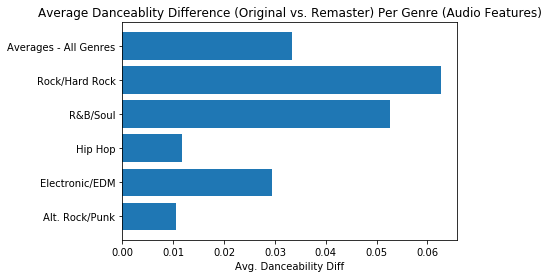

In [118]:
plt.barh(genre_avg['genre_sorted'], genre_avg['dance_diff'])
plt.xlabel('Avg. Danceability Diff')
plt.title('Average Danceablity Difference (Original vs. Remaster) Per Genre (Audio Features)')
plt.plot()

[]

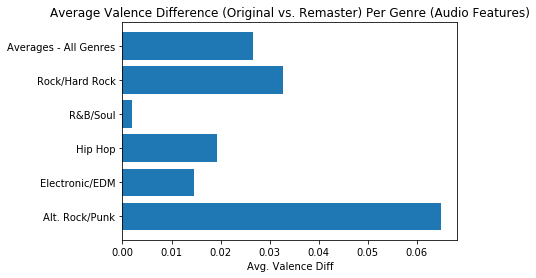

In [119]:
plt.barh(genre_avg['genre_sorted'], genre_avg['valence_diff'])
plt.xlabel('Avg. Valence Diff')
plt.title('Average Valence Difference (Original vs. Remaster) Per Genre (Audio Features)')
plt.plot()

In [120]:
song_titles = []
for title in all_songs_group['song_title']:
    song_titles.append(title)
decade_group = analysis_feat_mrge
decade_group = decade_group[decade_group["song_title"].isin(song_titles)]
decade_group = decade_group.reset_index()
decade_group = decade_group.drop(columns=['index'])
decade_group['loud_start_diff'] = abs(decade_group['loud_start_diff'])
decade_group['loud_max_diff'] = abs(decade_group['loud_max_diff'])
decade_group['tempo_diff'] = abs(decade_group['tempo_diff'])
decade_group['loud_diff'] = abs(decade_group['loud_diff'])
decade_group['energy_diff'] = abs(decade_group['energy_diff'])
decade_group['dance_diff'] = abs(decade_group['dance_diff'])
decade_group['valence_diff'] = abs(decade_group['valence_diff'])
decade_group = decade_group.groupby('decade').mean()
decade_group = decade_group.reset_index()
decade_group

decade  loud_start_diff  loud_max_diff  pitch_eucl_dist  timbre_eucl_dist  \
0    1950         4.903986       4.370554         0.639175         63.494441   
1    1960         2.590089       0.268022         1.292507        116.003966   
2    1970         1.788888       2.321507         0.640977         62.605228   
3    1980         6.086856       5.922575         0.946997        102.816985   
4    1990         0.743180       0.830240         1.215774        107.134815   
5    2000         0.321622       0.548361         0.635081         63.897231   

   tempo_diff  loud_diff  energy_diff  dance_diff  valence_diff  
0    67.11200    4.27400      0.14500     0.12000       0.00400  
1     0.04100    1.16000      0.05400     0.06100       0.00400  
2    13.40700    2.47260      0.06260     0.02900       0.00860  
3     0.06240    6.20140      0.16380     0.01460       0.01560  
4     0.12575    1.04100      0.04600     0.02025       0.08450  
5     0.12800    0.47275      0.00725     0.04725       0.01675

[]

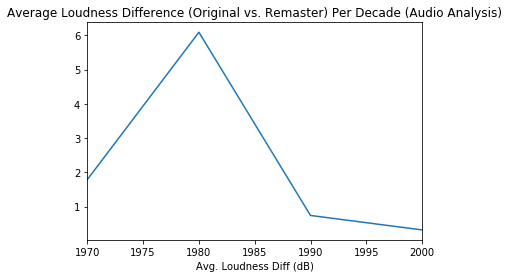

In [127]:
plt.plot(decade_group['decade'], decade_group['loud_start_diff'])
plt.xlabel('Avg. Loudness Diff (dB)')
plt.title('Average Loudness Difference (Original vs. Remaster) Per Decade (Audio Analysis)')
plt.xlim(1970, 2000)
plt.plot()

[]

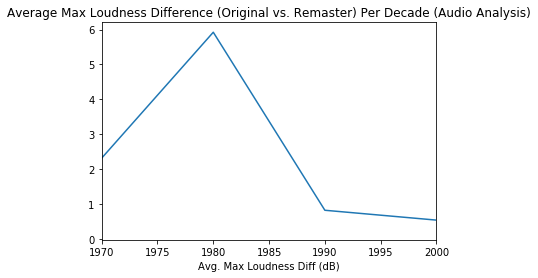

In [130]:
plt.plot(decade_group['decade'], decade_group['loud_max_diff'])
plt.xlabel('Avg. Max Loudness Diff (dB)')
plt.title('Average Max Loudness Difference (Original vs. Remaster) Per Decade (Audio Analysis)')
plt.xlim(1970, 2000)
plt.plot()

[]

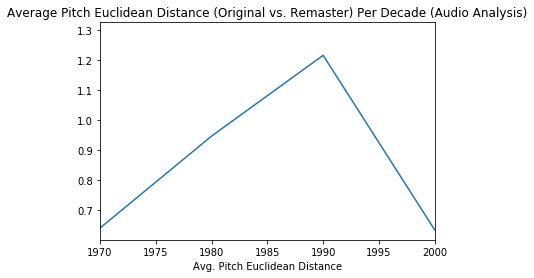

In [132]:
plt.plot(decade_group['decade'], decade_group['pitch_eucl_dist'])
plt.xlabel('Avg. Pitch Euclidean Distance')
plt.title('Average Pitch Euclidean Distance (Original vs. Remaster) Per Decade (Audio Analysis)')
plt.xlim(1970, 2000)
plt.plot()

[]

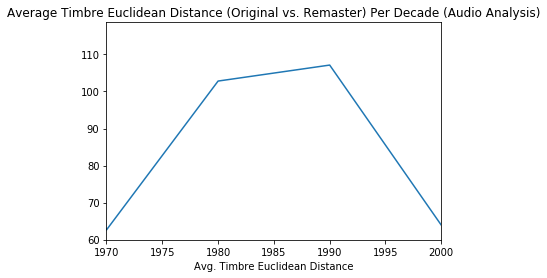

In [133]:
plt.plot(decade_group['decade'], decade_group['timbre_eucl_dist'])
plt.xlabel('Avg. Timbre Euclidean Distance')
plt.title('Average Timbre Euclidean Distance (Original vs. Remaster) Per Decade (Audio Analysis)')
plt.xlim(1970, 2000)
plt.plot()

[]

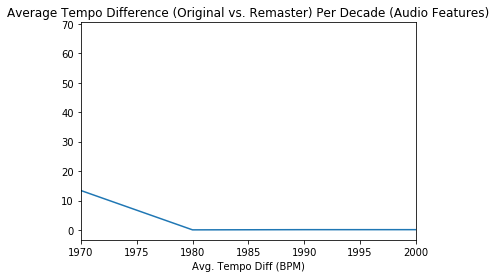

In [134]:
plt.plot(decade_group['decade'], decade_group['tempo_diff'])
plt.xlabel('Avg. Tempo Diff (BPM)')
plt.title('Average Tempo Difference (Original vs. Remaster) Per Decade (Audio Features)')
plt.xlim(1970, 2000)
plt.plot()

[]

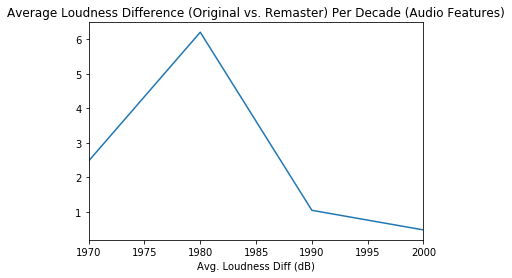

In [135]:
plt.plot(decade_group['decade'], decade_group['loud_diff'])
plt.xlabel('Avg. Loudness Diff (dB)')
plt.title('Average Loudness Difference (Original vs. Remaster) Per Decade (Audio Features)')
plt.xlim(1970, 2000)
plt.plot()

[]

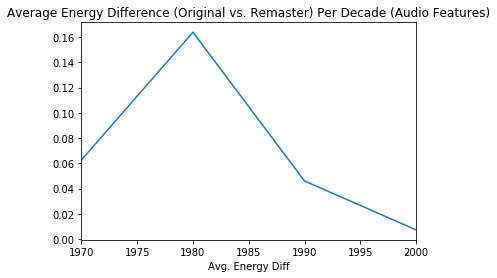

In [136]:
plt.plot(decade_group['decade'], decade_group['energy_diff'])
plt.xlabel('Avg. Energy Diff')
plt.title('Average Energy Difference (Original vs. Remaster) Per Decade (Audio Features)')
plt.xlim(1970, 2000)
plt.plot()

[]

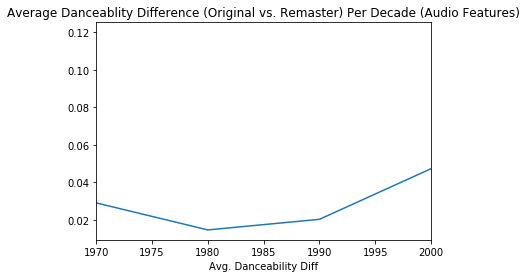

In [137]:
plt.plot(decade_group['decade'], decade_group['dance_diff'])
plt.xlabel('Avg. Danceability Diff')
plt.title('Average Danceablity Difference (Original vs. Remaster) Per Decade (Audio Features)')
plt.xlim(1970, 2000)
plt.plot()

[]

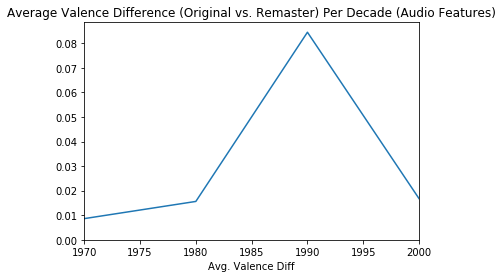

In [138]:
plt.plot(decade_group['decade'], decade_group['valence_diff'])
plt.xlabel('Avg. Valence Diff')
plt.title('Average Valence Difference (Original vs. Remaster) Per Decade (Audio Features)')
plt.xlim(1970, 2000)
plt.plot()

genre_avg.to_csv("genre_averages.csv")

decade_group.to_csv("decade_averages.csv")